In [1]:
import numpy as np
import pandas as pd
import matplotlib
print(matplotlib.__version__)
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
from glob import glob
from collections import Counter
import re, os
import history_cmc as hic
import math
import scipy
from scipy.interpolate import interp1d
from scipy import stats
import matplotlib.cm as cm
import matplotlib as mpl
import random
from random import shuffle
import gzip
import sys
import astropy as ap
from astropy import units
from scipy.optimize import bisect
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


import gw_ecc_calc as gwcalc
import unit_convert as uc
import merger_rate_calculator as mr
import ns_tidalcapture_hdf5 as tc
import conversions
import dynamics as dyn
import scripts3
import scripts2
import scripts1
import scripts
import LISA_calculations as lisa_calc
import extract_full_hist as ehist
import psr_catalog as pc
import ns, ns_hdf5
import extract_coll_merger as ecm


sys.path.insert(1, '/projects/b1095/syr904/MyCodes/cmctoolkit')
import cmctoolkit as cmct

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

matplotlib.rcParams.update({'font.size': 22})
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('font',**{'family':'serif','serif':['Times']})
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = 'Times New Roman'
#plt.rc('font', family='serif')
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
      
twopi=2.*np.pi
yearsc=3.1557*10**7
Kconst=9.87*10**-48 ##yr/G^2
Gconst=6.674*10**-8 ##cm3*g-1*s-2
Gconst_sun = 4.30091*10**-3 ##pc*M_sun**-1*(km/s)2
clight=3*10**10 ##cm/s
Msun=2*10**33 ##gram
Rsun=6.957e+10 ##cm
AU=1.496*10**13  ##cm
AU_Rsun=214.93946938362 ##AU to R_sun
PC=3.086*10**18  ##cm
PC_Rsun = 44334448.0068964 ##pc to R_sun

savepath = '/projects/b1095/syr904/projects/mass_gap_bhs/'

2.1.2


In [2]:
m1 = [1.358, 2.35]; m2 = [1.354, 1.53]
porb = [0.335, 7.448]; e = [0.681, 0.708]
a = uc.period_to_au(np.array(porb), np.array(m1), np.array(m2))

for xx in range(len(m1)):
    t_insp = gwcalc.t_inspiral_2(a[xx],e[xx],m1[xx],m2[xx], steps=10000)/1.e6 # In Myr
    print('t_insp Myr', t_insp)

38657.6416128826
t_insp Myr 217.3594426621937
41071062.78413895
t_insp Myr 382363.92186395195


In [2]:
sourcedir = np.genfromtxt('/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/paths_delay_rapid.dat',
                         dtype=str)
model_type = np.array(list(sourcedir[:,2][::4])+list(sourcedir[:,2][1::4])+list(sourcedir[:,2][2::4]))#+list(sourcedir[:,2][3::4]))
#sourcedir[:,2]
print(model_type)
paths = np.array(list(sourcedir[:,0][::4])+list(sourcedir[:,0][1::4])+list(sourcedir[:,0][2::4]))#+list(sourcedir[:,0][3::4]))

snmodel = np.array(list(sourcedir[:,4][::4])+list(sourcedir[:,4][1::4])+list(sourcedir[:,4][2::4]))
wdmassmodel = np.array(list(sourcedir[:,5][::4])+list(sourcedir[:,5][1::4])+list(sourcedir[:,5][2::4]))
nstdeflag = np.array(list(sourcedir[:,6][::4])+list(sourcedir[:,6][1::4])+list(sourcedir[:,6][2::4]))
wdtcflag = np.array(list(sourcedir[:,7][::4])+list(sourcedir[:,7][1::4])+list(sourcedir[:,7][2::4]))
qcritflag = np.array(list(sourcedir[:,8][::4])+list(sourcedir[:,8][1::4])+list(sourcedir[:,8][2::4]))

###Appending the model with s=0
model_type = np.append(model_type, '5')
paths = np.append(paths, 
          '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_nstde0_wdtc_wdmass_qcrit4_delay/')
snmodel = np.append(snmodel, 'delayed')
wdmassmodel = np.append(wdmassmodel, 'updated')
nstdeflag = np.append(nstdeflag, '0.0')
wdtcflag = np.append(wdtcflag, '\checkmark')
qcritflag = np.append(qcritflag, 'updated')

##Appending the model with lower kicks
model_type = np.append(model_type, '6')
print(model_type)
paths = np.append(paths, 
        '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_nstde0.2_wdtc_wdmass_qcrit4_delay_lowkick_nobh/')
snmodel = np.append(snmodel, 'delayed')
wdmassmodel = np.append(wdmassmodel, 'updated')
nstdeflag = np.append(nstdeflag, '0.2')
wdtcflag = np.append(wdtcflag, '\checkmark')
qcritflag = np.append(qcritflag, 'updated')

####Appending the two simulations for NGC 1851
paths = np.append(paths, 
    ['/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc1851/N1.3e6rv0.5z0.0013rg20/',
     '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc1851/N1.3e6rv0.5z0.0013rg20_wdtc_wdmass_qcrit4_delay/',
     '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc1851/N1.3e6rv0.5z0.0013rg1_wdtc_wdmass_qcrit4_delay/'])
model_type = np.append(model_type, ['1', '4', '7'])
snmodel = np.append(snmodel, ['rapid', 'delayed', 'delayed'])
wdmassmodel = np.append(wdmassmodel, ['default', 'updated', 'updated'])
nstdeflag = np.append(nstdeflag, ['-', '0.2', '0.2'])
wdtcflag = np.append(wdtcflag, ['-', '\checkmark', '\checkmark'])
qcritflag = np.append(qcritflag, ['default', 'updated', 'updated'])

print(paths)
snap_h5 = 'initial.snapshots.h5'

delay_sep = 6


###return bh snapshot names
def bh_snaps(sourcedir):
    bhsnap_h5 = 'initial.blackhole.snapshots.h5'
    
    with pd.HDFStore(sourcedir+bhsnap_h5) as bhsnap_hdf:
        bhsnap_keys = np.sort(bhsnap_hdf.keys())  
        
    t_conv = dyn.conv('t', sourcedir+'initial.conv.sh')
    
    def read_keys(thekey):
        return re.findall(r'\d+\.\d+|\d+', thekey)
    
    bh_snaptime = []; bh_floattime = []
    for ii in range(len(bhsnap_keys)):
        thetime = read_keys(bhsnap_keys[ii])[0]
        bh_snaptime.append(thetime)
        bh_floattime.append(float(thetime))
    
    ind = np.argsort(bh_floattime)
    bh_floattime_sort = np.array(bh_floattime)[ind]
    bh_snaptime_sort = np.array(bh_snaptime)[ind]
    
    return bh_floattime_sort, bh_snaptime_sort

['1' '3' '2' '4' '1' '3' '2' '4' '1' '3' '2' '4']
['1' '3' '2' '4' '1' '3' '2' '4' '1' '3' '2' '4' '5' '6']
['/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun/'
 '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun_delay/'
 '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass/'
 '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass_delay/'
 '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_nstde0.2_wdtc_rerun/'
 '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/al

11984.7
11931.7
12153.3
11906.2
11966.6
11903.2
12085.6
12006.0
12078.8
11918.7
11981.8
12082.5
12137.7
12035.4


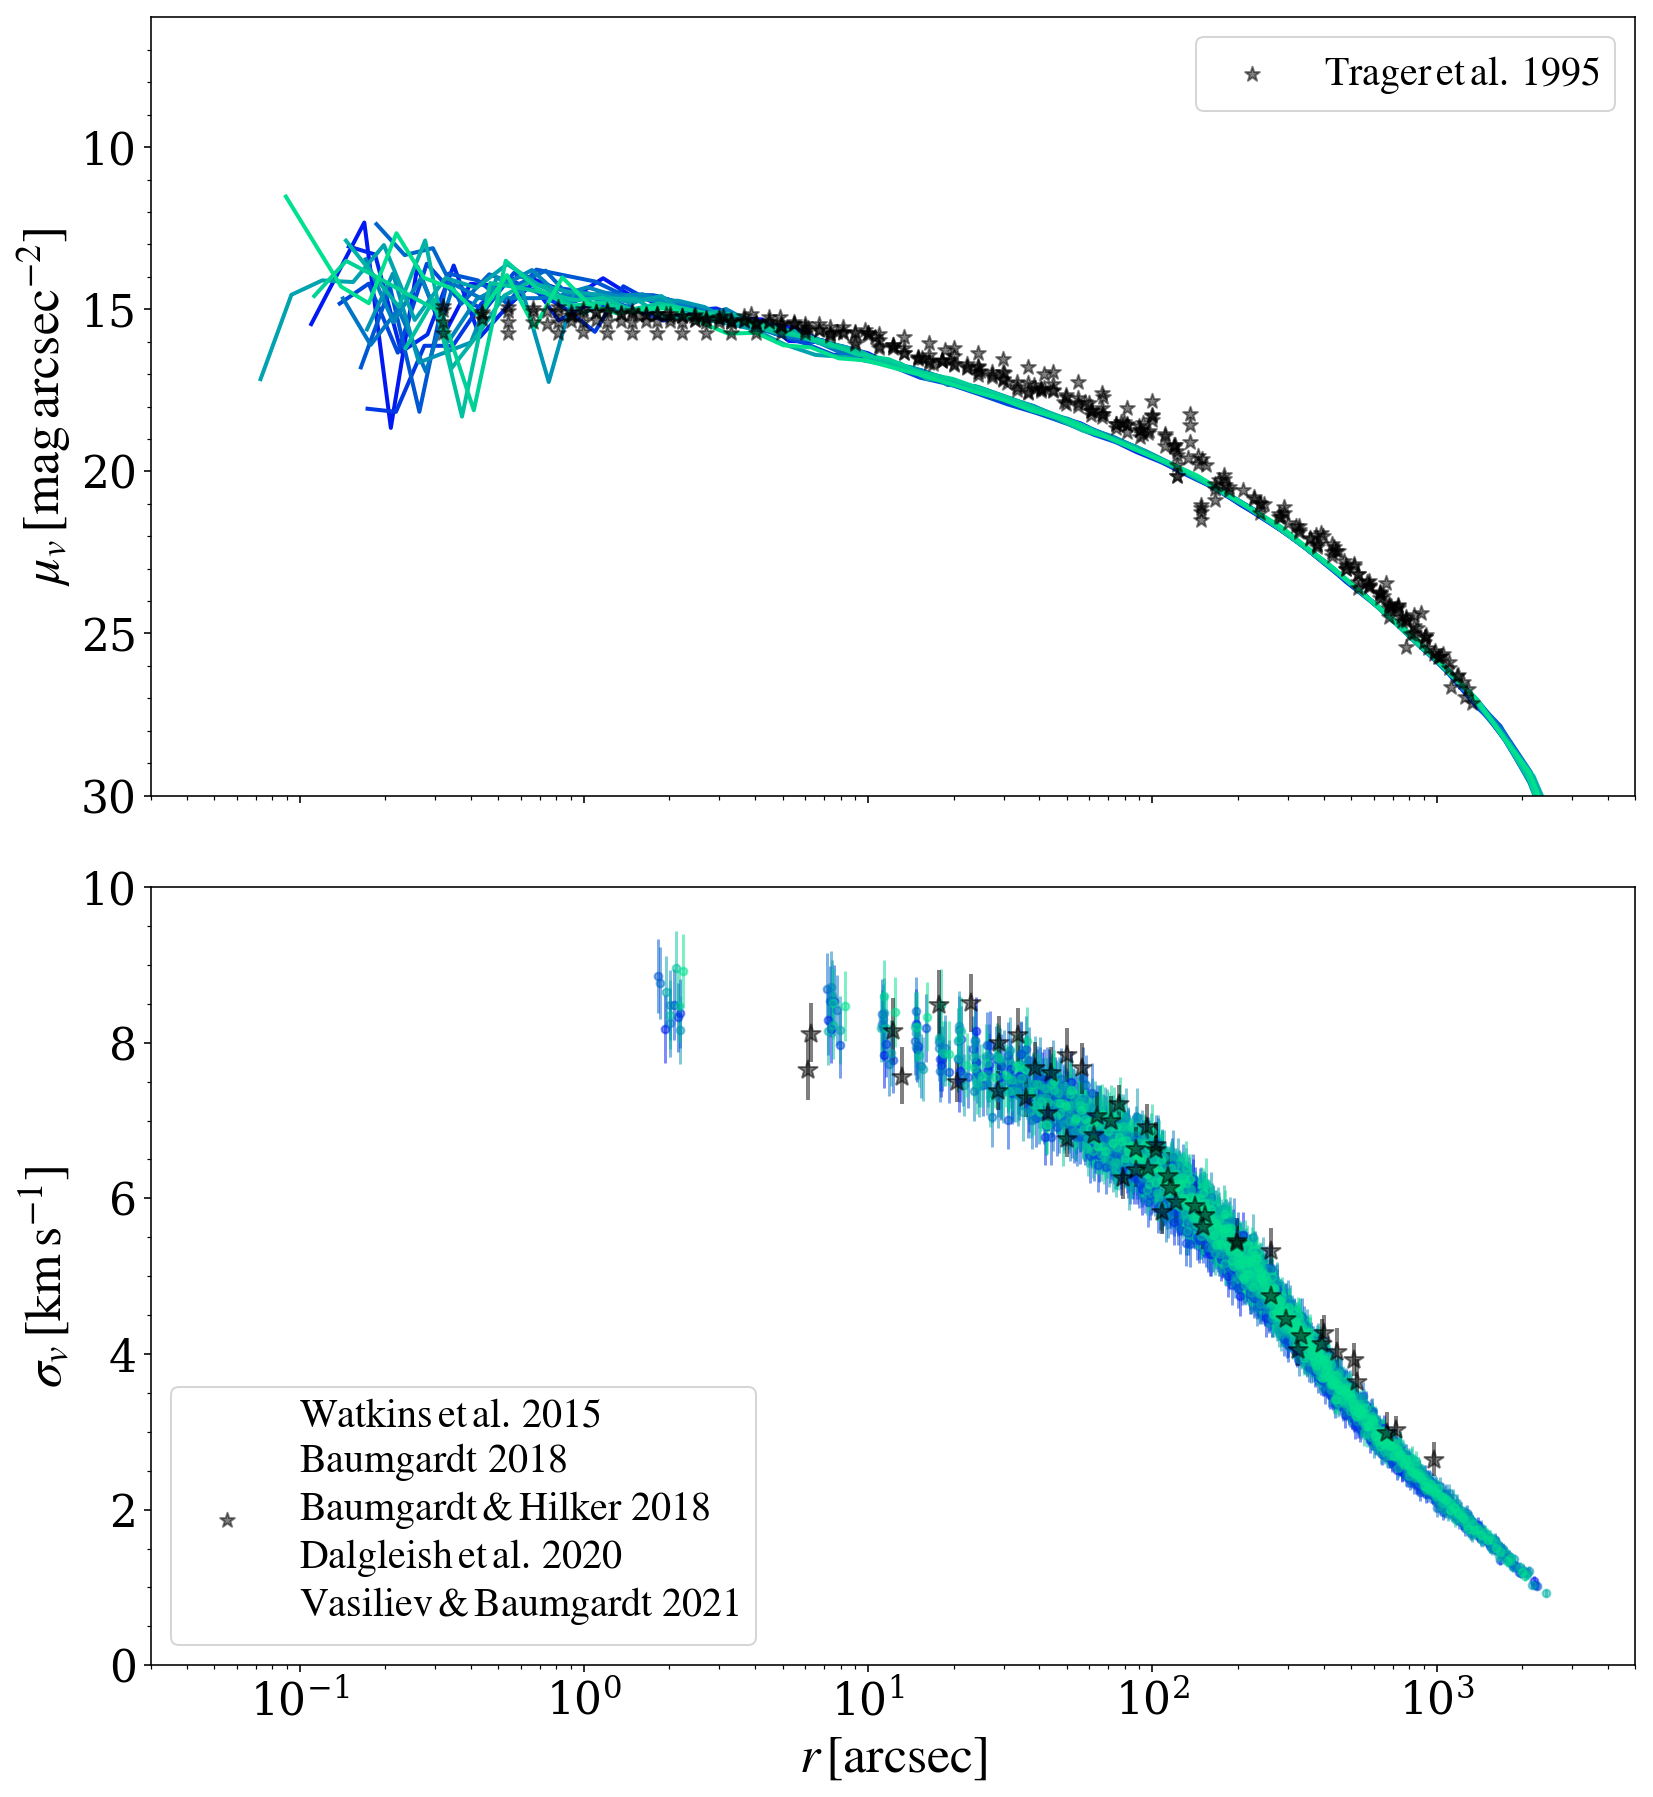

In [6]:
##Surface brightness and velocity dispersion profiles
###Observations###
R_sun_obs=4.125
ngcno='6752'

ft = open('makeSBP/trager.dat','r')
linest = ft.readlines()

fv = open('makeSBP/vel_dispersion_profiles_100423.dat','r')
linesv = fv.readlines()

flag = 0
#### find observed SBP from trager file
arcsec_t = []
SB_t = []
for k in range(len(linest)):
    linet = linest[k]
    linet = linet.split('\n')
    linet = linet[0]
    linet = linet.split('\t')
    cluster_tregar = linet[1]
    if cluster_tregar == 'ngc'+ngcno:
        arcsec_t.append(np.float(linet[2]))
        SB_t.append(np.float(linet[3]))
        flag = 1
arcsec_t = np.array(arcsec_t[:])
SB_t = np.array(SB_t[:])
if flag == 0:
        print('Trager doesnt have the SBP or sigma v profile')
        sys.exit()

flag = 0
#### find observed sigma_v profile
datav = np.genfromtxt('makeSBP/vel_dispersion_profiles_100423.dat')
R_obs = [] # in arcsec
sigma_obs = []
sigma_err_obs_up = []
sigma_err_obs_down = []
for k in range(len(linesv)):
    linev = linesv[k]
    linev = linev.split('\n')
    linev = linev[0]
    linev = linev.split(' ')
    cluster_sigma = linev[0]
    if cluster_sigma == 'NGC'+ngcno:
        R_obs.append(datav[k,1])
        sigma_obs.append(datav[k,2])
        sigma_err_obs_up.append(datav[k,3])
        sigma_err_obs_down.append(datav[k,4])
        flag = 1
R_obs = np.array(R_obs[:])
sigma_obs = np.array(sigma_obs[:])
sigma_err_obs_up = np.array(sigma_err_obs_up[:])
sigma_err_obs_down = np.array(sigma_err_obs_down[:])
############
if flag == 0:
        print('No observed sigmav profile')
        sys.exit()
        

fig, ax=plt.subplots(2, 1, sharex=True,  figsize=(12,13))
#ax[0].set_title(r'$\rm{NGC}\ $'+ngcno, fontsize=20)
ax[0].scatter(10**arcsec_t[:], SB_t[:], facecolor='k', marker = '*', 
              alpha=0.5, s=60, label=r'$\rm{Trager\,et\,al.\,1995}$', zorder=3)
ax[1].errorbar(R_obs,sigma_obs,yerr=[sigma_err_obs_down,sigma_err_obs_up], fmt='*', 
               markersize = 10, alpha=0.5, c='k', lw=2.0)
ax[1].scatter([10000,10000], [-5,-5], c='k', marker = '*', alpha=0.5, s=60,
              label=r'$\rm{Watkins\,et\,al.\,2015}$' '\n'
              r'$\rm{Baumgardt\,\,2018}$' '\n'
              r'$\rm{Baumgardt\,&\,Hilker\,\,2018}$' '\n'
              r'$\rm{Dalgleish\,et\,al.\,2020}$' '\n'
              r'$\rm{Vasiliev\,&\,Baumgardt\,\,2021}$')
             
cs = cm.winter(np.linspace(0.1, 1, 16))
###Models###
for xx in range(0, 14):
    snap2D = np.sort(glob(paths[xx]+'initial.snap*.2Dproj.dat.gz'))
    snap2D_L12 = np.sort(glob(paths[xx]+'initial.snap*.2D_SBPLcut12_NCUT-1.dat'))
    snap_vel700 = np.sort(glob(paths[xx]+'initial.snap*.vel_dispersion_vr_pm_700_0.dat'))

    for ii in range(0, len(snap2D_L12)):
        with open(snap2D_L12[ii], 'r') as f2D:
            first_line=f2D.readline()

        t_gyr = float(first_line.strip().split('=')[-1])
        if t_gyr>=11900.:
            print(t_gyr)
            data5 = np.genfromtxt(snap2D_L12[ii])
            arcsec = conversions.pc_to_arcsec(data5[:,1],R_sun_obs)
            SB = conversions.SB_converter(data5[:,3])
            SBerr = data5[:,6]/data5[:,5]*SB
            
            arcsec_cut = []
            SB_cut = []
            SBerr_cut = []
            for k in range(len(SB)):
                if arcsec[k] < 10 and SB[k] > 20:
                    Nothing = 0
                else:
                    arcsec_cut.append(arcsec[k])
                    SB_cut.append(SB[k])
                    #SBerr_cut.append(SBerr[k])
        
            datavel = np.genfromtxt(snap_vel700[ii])
            R_model = conversions.pc_to_arcsec(datavel[:,0],R_sun_obs)
            sigma_model = datavel[:,1]
            sigma_err_model = datavel[:,2]
        
            ax[0].plot(arcsec_cut, SB_cut, lw=2, color=cs[xx])
            ax[0].plot([10000,10000],[-5,-5], lw=2, color=cs[xx])
            ax[1].scatter(R_model[::3], sigma_model[::3],s=15,zorder=2,alpha=0.5, color=cs[xx])
            ax[1].errorbar(R_model[::3],sigma_model[::3],yerr=2*sigma_err_model[::3], fmt='o',
                           markersize=0.01,zorder=1,alpha=0.5, color=cs[xx])

            break

ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0].set_ylim(30,6)
ax[0].set_xscale('log')
ax[0].set_xlim(0.03,5000)
ax[0].set_ylabel(r'$\mu_v\,[\rm{mag\,arcsec^{-2}}]$',fontsize=26)
ax[0].legend(loc='best',scatterpoints=1, ncol=2, prop={'size': 20})

ax[1].yaxis.set_minor_locator(AutoMinorLocator())
ax[1].set_xscale('log')
ax[1].set_xlim(0.03,5000)
ax[1].set_ylim(0, 10)
ax[1].set_xlabel(r'$r\,[\rm{arcsec}]$',fontsize=26)
ax[1].set_ylabel(r'$\sigma_v\,[\rm{km\,s^{-1}}]$',fontsize=26)
ax[1].legend(loc=3,scatterpoints=1, ncol=2, prop={'size': 20})

plt.subplots_adjust(hspace=0.05)
fig.tight_layout()

#plt.savefig(savepath+'sbp_vdp_6752_13Gyr.pdf', dpi=300)

12035.4


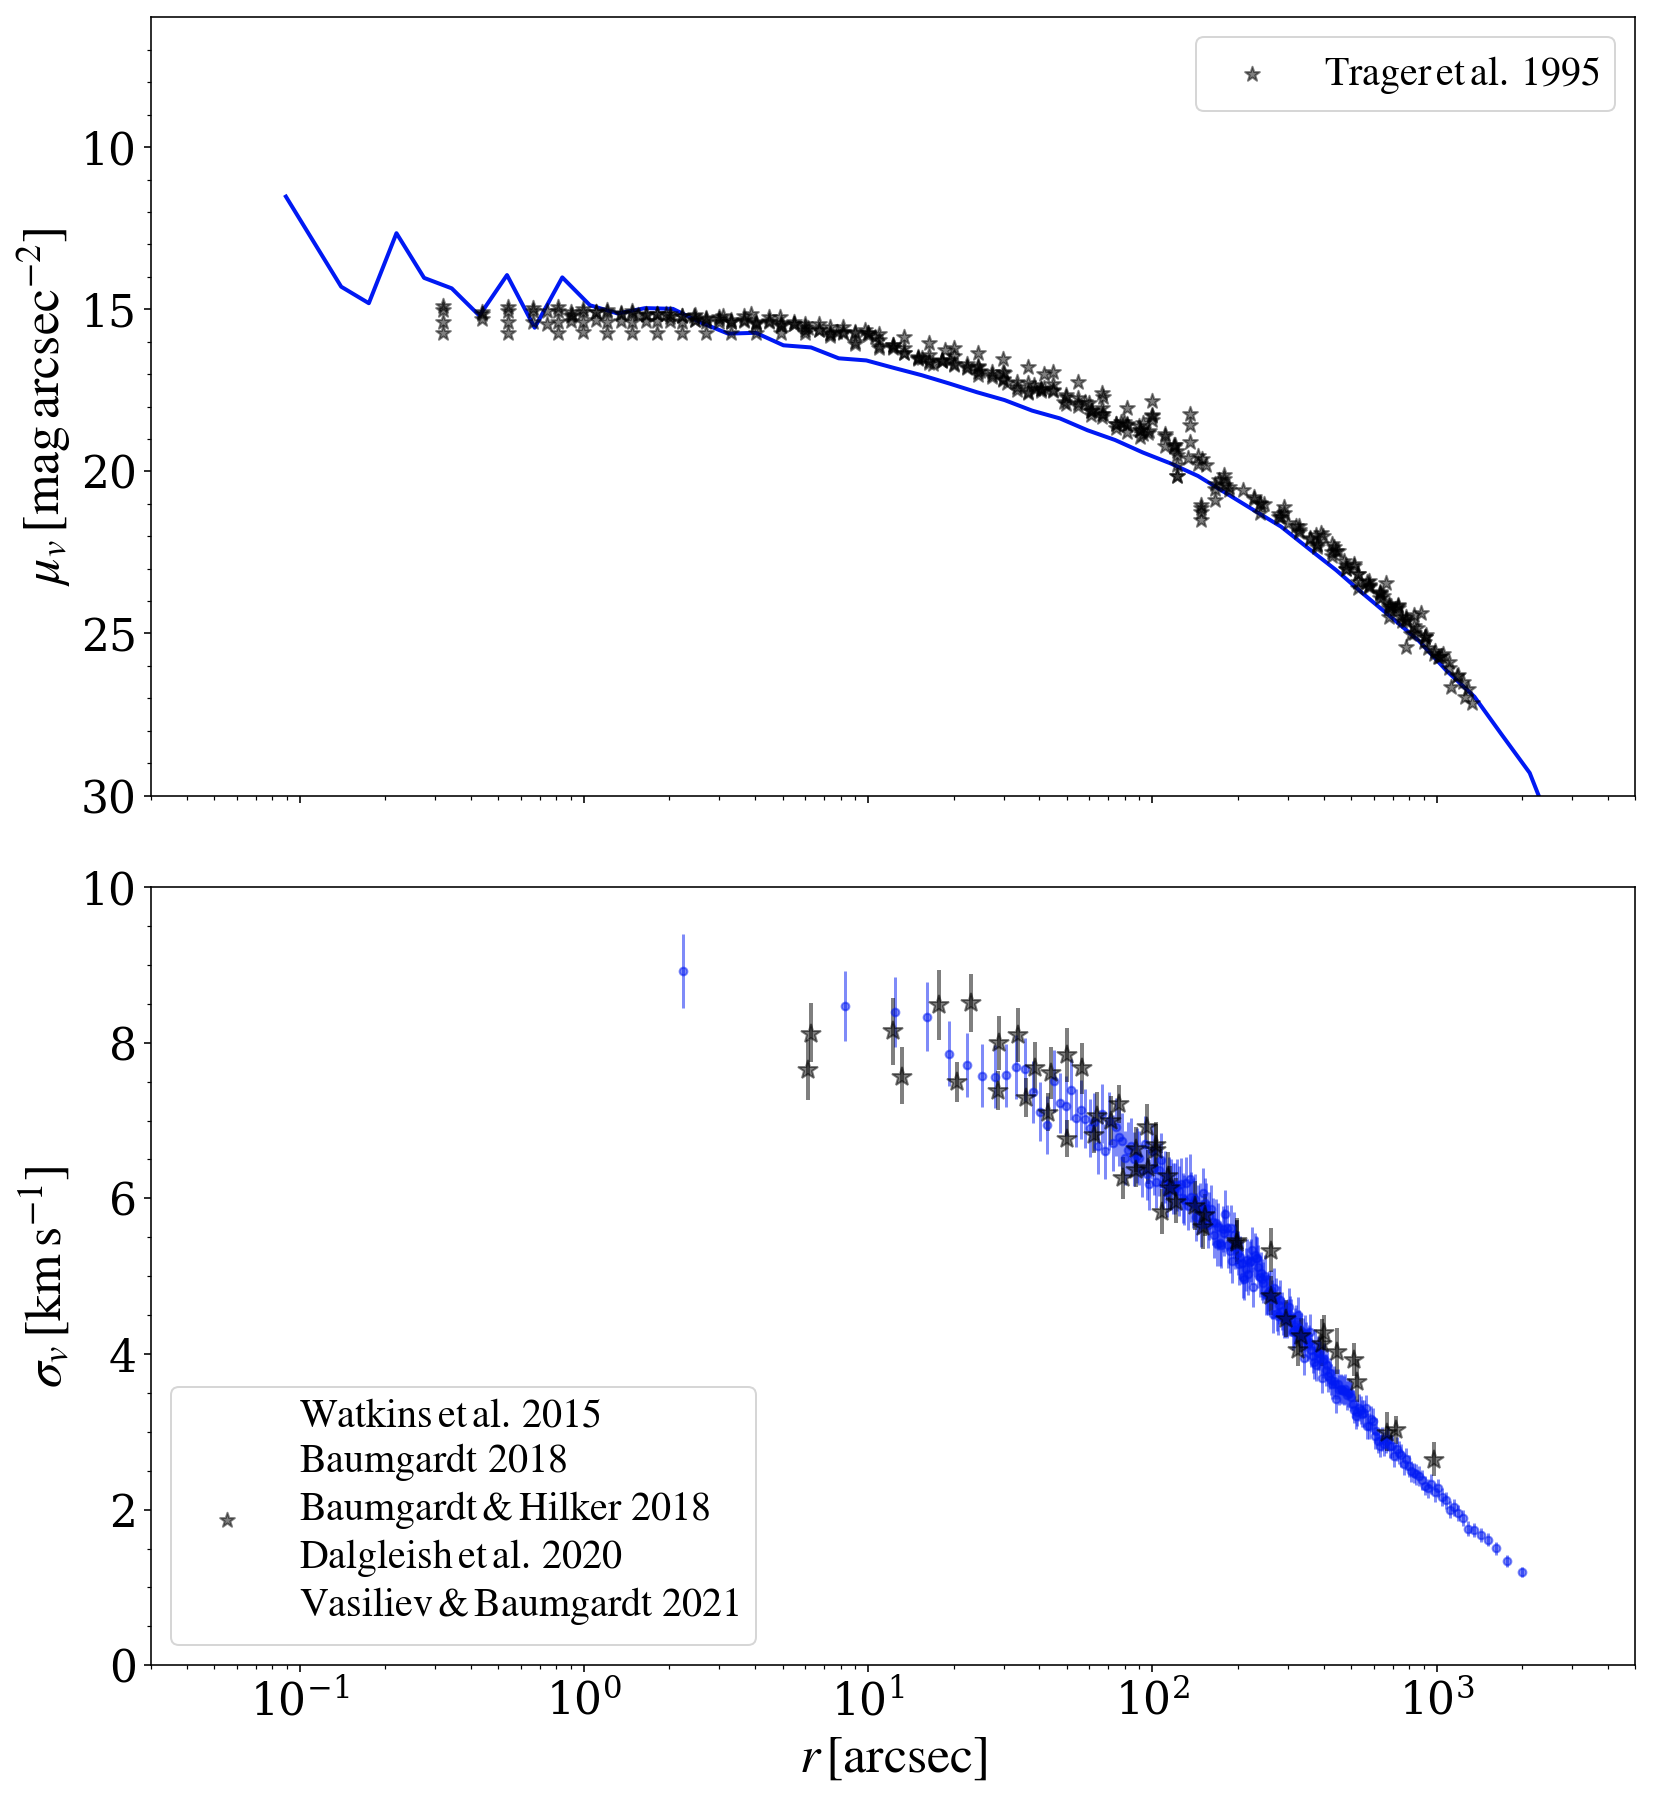

In [6]:
##Surface brightness and velocity dispersion profiles for one model
###Observations###
path1 = ['/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_nstde0.2_wdtc_wdmass_qcrit4_delay_lowkick_nobh/']

R_sun_obs=4.125
ngcno='6752'

ft = open('makeSBP/trager.dat','r')
linest = ft.readlines()

fv = open('makeSBP/vel_dispersion_profiles_100423.dat','r')
linesv = fv.readlines()

flag = 0
#### find observed SBP from trager file
arcsec_t = []
SB_t = []
for k in range(len(linest)):
    linet = linest[k]
    linet = linet.split('\n')
    linet = linet[0]
    linet = linet.split('\t')
    cluster_tregar = linet[1]
    if cluster_tregar == 'ngc'+ngcno:
        arcsec_t.append(np.float(linet[2]))
        SB_t.append(np.float(linet[3]))
        flag = 1
arcsec_t = np.array(arcsec_t[:])
SB_t = np.array(SB_t[:])
if flag == 0:
        print('Trager doesnt have the SBP or sigma v profile')
        sys.exit()

flag = 0
#### find observed sigma_v profile
datav = np.genfromtxt('makeSBP/vel_dispersion_profiles_100423.dat')
R_obs = [] # in arcsec
sigma_obs = []
sigma_err_obs_up = []
sigma_err_obs_down = []
for k in range(len(linesv)):
    linev = linesv[k]
    linev = linev.split('\n')
    linev = linev[0]
    linev = linev.split(' ')
    cluster_sigma = linev[0]
    if cluster_sigma == 'NGC'+ngcno:
        R_obs.append(datav[k,1])
        sigma_obs.append(datav[k,2])
        sigma_err_obs_up.append(datav[k,3])
        sigma_err_obs_down.append(datav[k,4])
        flag = 1
R_obs = np.array(R_obs[:])
sigma_obs = np.array(sigma_obs[:])
sigma_err_obs_up = np.array(sigma_err_obs_up[:])
sigma_err_obs_down = np.array(sigma_err_obs_down[:])
############
if flag == 0:
        print('No observed sigmav profile')
        sys.exit()
        

fig, ax=plt.subplots(2, 1, sharex=True,  figsize=(12,13))
#ax[0].set_title(r'$\rm{NGC}\ $'+ngcno, fontsize=20)
ax[0].scatter(10**arcsec_t[:], SB_t[:], facecolor='k', marker = '*', 
              alpha=0.5, s=60, label=r'$\rm{Trager\,et\,al.\,1995}$', zorder=3)
ax[1].errorbar(R_obs,sigma_obs,yerr=[sigma_err_obs_down,sigma_err_obs_up], fmt='*', 
               markersize = 10, alpha=0.5, c='k', lw=2.0)
ax[1].scatter([10000,10000], [-5,-5], c='k', marker = '*', alpha=0.5, s=60,
              label=r'$\rm{Watkins\,et\,al.\,2015}$' '\n'
              r'$\rm{Baumgardt\,\,2018}$' '\n'
              r'$\rm{Baumgardt\,&\,Hilker\,\,2018}$' '\n'
              r'$\rm{Dalgleish\,et\,al.\,2020}$' '\n'
              r'$\rm{Vasiliev\,&\,Baumgardt\,\,2021}$')
             
cs = cm.winter(np.linspace(0.1, 1, 16))
###Models###
for xx in range(0, 1):
    snap2D = np.sort(glob(path1[xx]+'initial.snap*.2Dproj.dat.gz'))
    snap2D_L12 = np.sort(glob(path1[xx]+'initial.snap*.2D_SBPLcut12_NCUT-1.dat'))
    snap_vel700 = np.sort(glob(path1[xx]+'initial.snap*.vel_dispersion_vr_pm_700_0.dat'))

    for ii in range(0, len(snap2D_L12)):
        with open(snap2D_L12[ii], 'r') as f2D:
            first_line=f2D.readline()

        t_gyr = float(first_line.strip().split('=')[-1])
        if t_gyr>=11900.:
            print(t_gyr)
            data5 = np.genfromtxt(snap2D_L12[ii])
            arcsec = conversions.pc_to_arcsec(data5[:,1],R_sun_obs)
            SB = conversions.SB_converter(data5[:,3])
            SBerr = data5[:,6]/data5[:,5]*SB
            
            arcsec_cut = []
            SB_cut = []
            SBerr_cut = []
            for k in range(len(SB)):
                if arcsec[k] < 10 and SB[k] > 20:
                    Nothing = 0
                else:
                    arcsec_cut.append(arcsec[k])
                    SB_cut.append(SB[k])
                    #SBerr_cut.append(SBerr[k])
        
            datavel = np.genfromtxt(snap_vel700[ii])
            R_model = conversions.pc_to_arcsec(datavel[:,0],R_sun_obs)
            sigma_model = datavel[:,1]
            sigma_err_model = datavel[:,2]
        
            ax[0].plot(arcsec_cut, SB_cut, lw=2, color=cs[xx])
            ax[0].plot([10000,10000],[-5,-5], lw=2, color=cs[xx])
            ax[1].scatter(R_model[::3], sigma_model[::3],s=15,zorder=2,alpha=0.5, color=cs[xx])
            ax[1].errorbar(R_model[::3],sigma_model[::3],yerr=2*sigma_err_model[::3], fmt='o',
                           markersize=0.01,zorder=1,alpha=0.5, color=cs[xx])

            break

ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0].set_ylim(30,6)
ax[0].set_xscale('log')
ax[0].set_xlim(0.03,5000)
ax[0].set_ylabel(r'$\mu_v\,[\rm{mag\,arcsec^{-2}}]$',fontsize=26)
ax[0].legend(loc='best',scatterpoints=1, ncol=2, prop={'size': 20})

ax[1].yaxis.set_minor_locator(AutoMinorLocator())
ax[1].set_xscale('log')
ax[1].set_xlim(0.03,5000)
ax[1].set_ylim(0, 10)
ax[1].set_xlabel(r'$r\,[\rm{arcsec}]$',fontsize=26)
ax[1].set_ylabel(r'$\sigma_v\,[\rm{km\,s^{-1}}]$',fontsize=26)
ax[1].legend(loc=3,scatterpoints=1, ncol=2, prop={'size': 20})

plt.subplots_adjust(hspace=0.05)
fig.tight_layout()

#plt.savefig(savepath+'sbp_vdp_6752_13Gyr.pdf', dpi=300)

11.95296650748


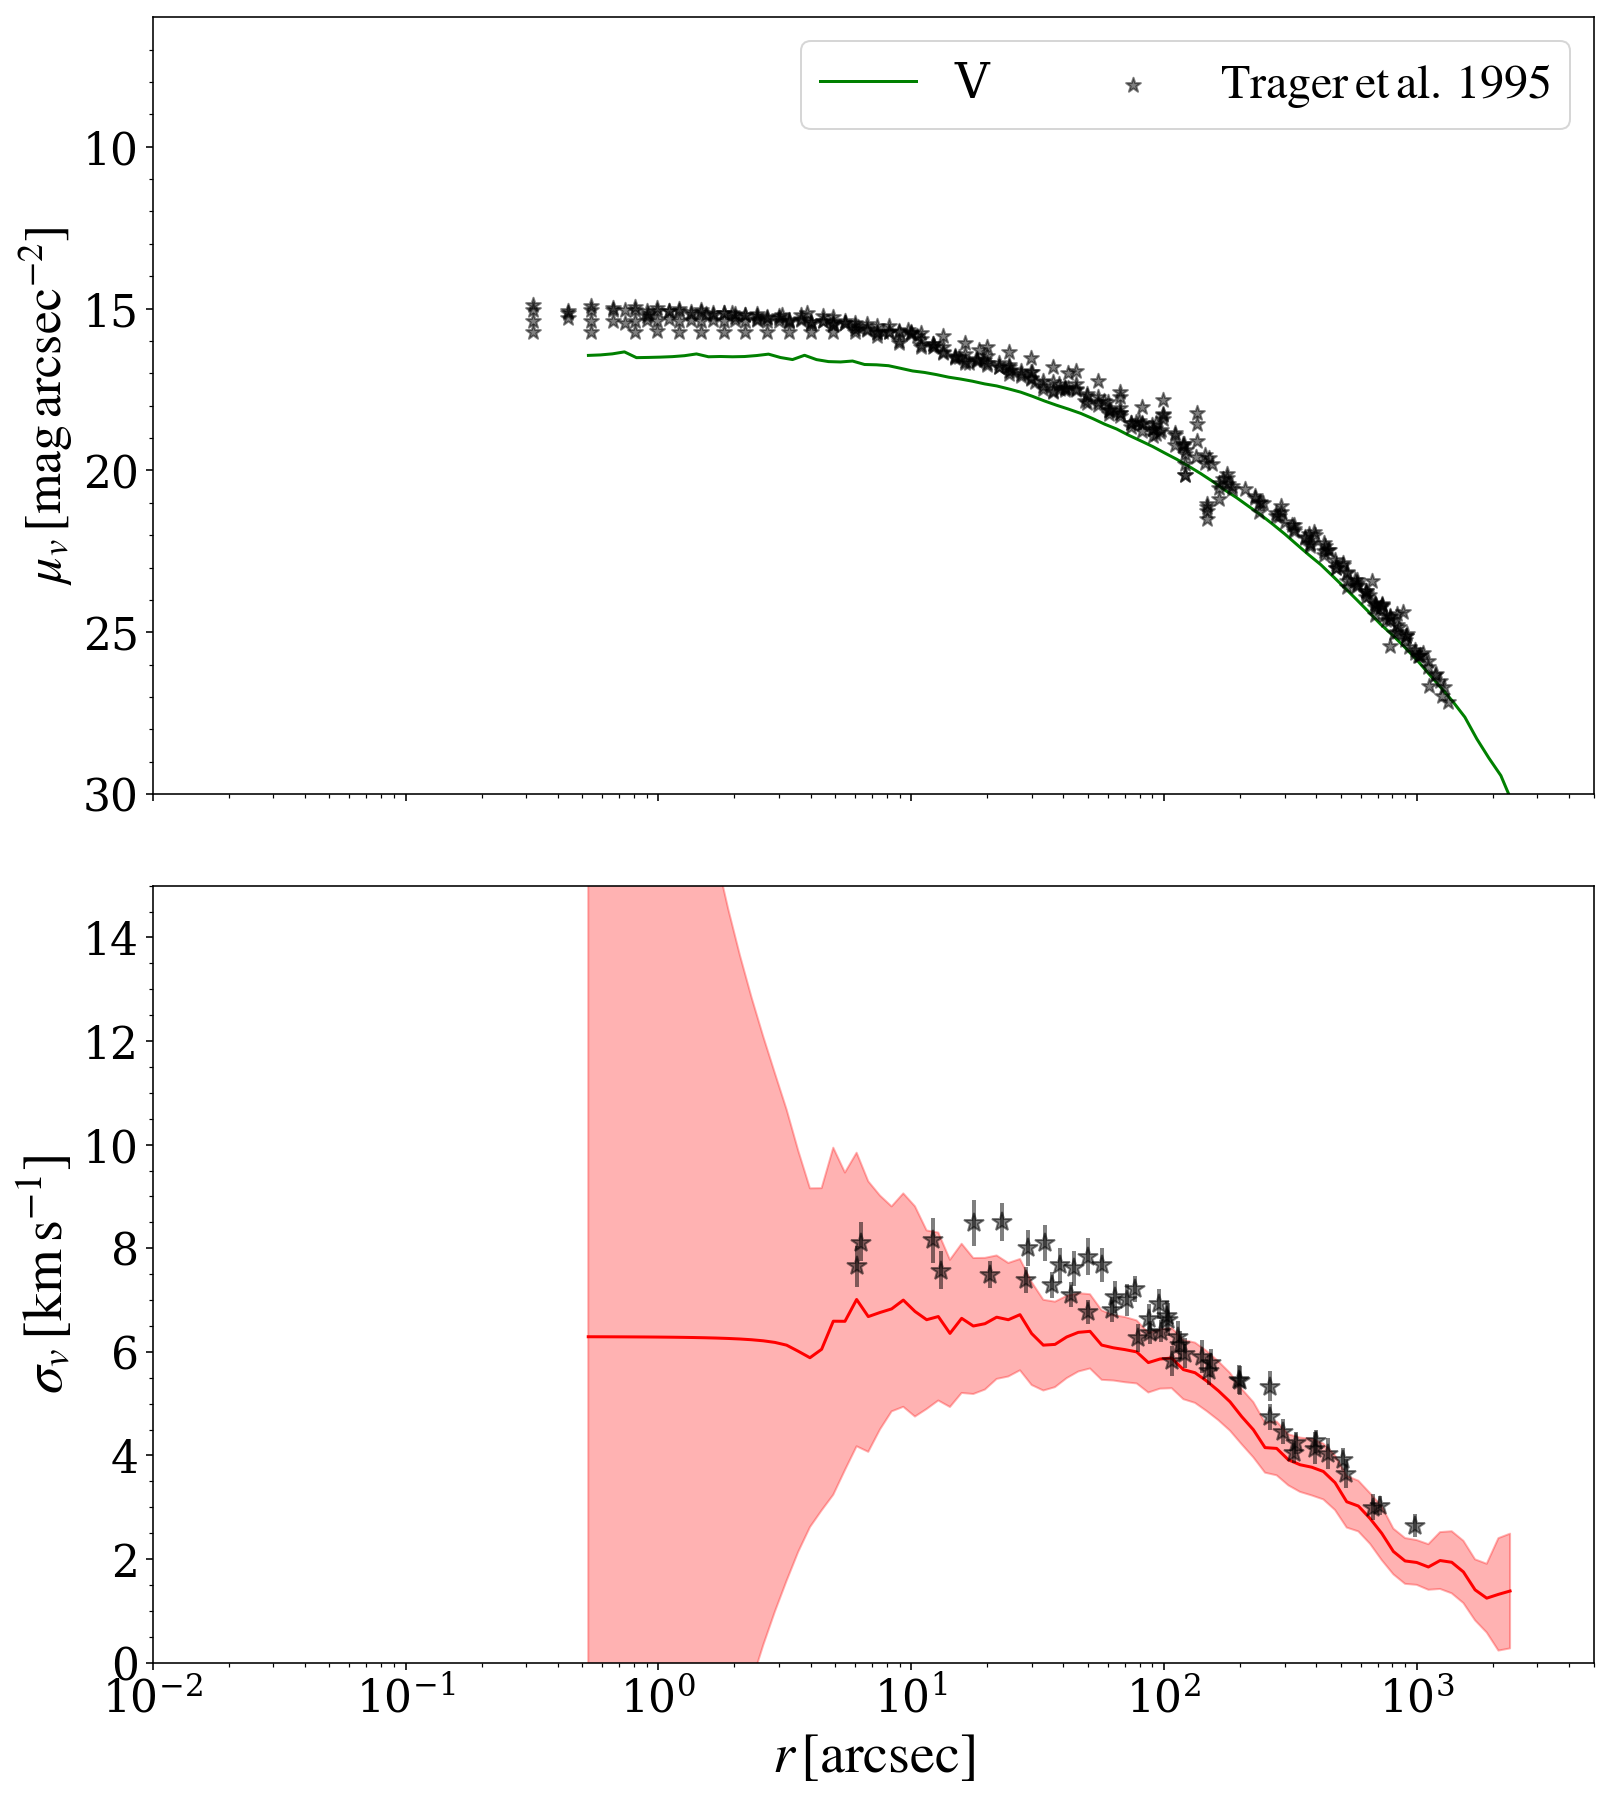

In [7]:
###Testing the SBP and VDP using Nicholas's toolkit

path = '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_nstde0.2_wdtc_wdmass_qcrit4_delay_lowkick/'
snap_h5 = 'initial.snapshots.h5'

snap = cmct.Snapshot(fname=path+snap_h5, snapshot_name='/445(t=17.712297)', conv=path+'initial.conv.sh', 
                     dist=4.125, # distance to cluster in kpc
                     z=0.0002)
print(snap.age)
##First Check

##Surface brightness and Velocity dispersion profile
d6752 = 4.125  ##kpc


###############################################
##Make surface brightness profile
snap.add_photometry('/projects/b1095/syr904/MyCodes/cmctoolkit/filt_index.txt')
v_bincenter, v_profile = snap.make_smoothed_brightness_profile('V', bins=80,
                                                               min_mass=None, max_mass=None,
                                                               max_lum=12, fluxdict=None,
                                                               startypes=np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                                               min_logr=-2.0)


# Make velocity dispersion profiles
star_velbin_center, star_veldisp_profile, star_e_veldisp_profile = snap.make_smoothed_veldisp_profile(bins=80,
                                                                 min_mass=None,
                                                                 max_mass=None,
                                                                 dmax=None,
                                                                 fluxdict=None,
                                                                 startypes=np.array([2, 3, 4, 5, 6, 7, 8, 9]),
                                                                 min_logr=-2.0)

star_velbin_arcsec = conversions.pc_to_arcsec(star_velbin_center,d6752)


##Make number density profile
star_numbin_center, star_profile, star_e_profile = snap.make_smoothed_number_profile(bins=80,
                                                 min_mass=None,
                                                 max_mass=None,
                                                 fluxdict=None,
                                                 startypes=np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                                 min_logr=-2.0)

star_numbin_arcsec = conversions.pc_to_arcsec(star_numbin_center,d6752)
star_profile_arcsec = star_profile/(conversions.pc_to_arcsec(1.,d6752)**2)
star_e_profile_arcsec = star_e_profile/(conversions.pc_to_arcsec(1.,d6752)**2)


##Surface brightness and velocity dispersion profiles
###Observations###
R_sun_obs=4.125
ngcno='6752'

ft = open('makeSBP/trager.dat','r')
linest = ft.readlines()


fv = open('makeSBP/vel_dispersion_profiles_100423.dat','r')
linesv = fv.readlines()

flag = 0
#### find observed SBP from trager file
arcsec_t = []
SB_t = []
for k in range(len(linest)):
    linet = linest[k]
    linet = linet.split('\n')
    linet = linet[0]
    linet = linet.split('\t')
    cluster_tregar = linet[1]
    if cluster_tregar == 'ngc'+ngcno:
        arcsec_t.append(float(linet[2]))
        SB_t.append(float(linet[3]))
        flag = 1
arcsec_t = np.array(arcsec_t[:])
SB_t = np.array(SB_t[:])
if flag == 0:
        print('Trager doesnt have the SBP or sigma v profile')
        sys.exit()

flag = 0
#### find observed sigma_v profile
datav = np.genfromtxt('makeSBP/vel_dispersion_profiles_100423.dat')
R_obs = [] # in arcsec
sigma_obs = []
sigma_err_obs_up = []
sigma_err_obs_down = []
for k in range(len(linesv)):
    linev = linesv[k]
    linev = linev.split('\n')
    linev = linev[0]
    linev = linev.split(' ')
    cluster_sigma = linev[0]
    if cluster_sigma == 'NGC'+ngcno:
        R_obs.append(datav[k,1])
        sigma_obs.append(datav[k,2])
        sigma_err_obs_up.append(datav[k,3])
        sigma_err_obs_down.append(datav[k,4])
        flag = 1
R_obs = np.array(R_obs[:])
sigma_obs = np.array(sigma_obs[:])
sigma_err_obs_up = np.array(sigma_err_obs_up[:])
sigma_err_obs_down = np.array(sigma_err_obs_down[:])
############
if flag == 0:
        print('No observed sigmav profile')
        sys.exit()
        

fig, ax=plt.subplots(2, 1, sharex=True,  figsize=(12,13))
#ax[0].set_title(r'$\rm{NGC}\ $'+ngcno, fontsize=20)
ax[0].scatter(10**arcsec_t[:], SB_t[:], facecolor='k', marker = '*', 
              alpha=0.5, s=60, label=r'$\rm{Trager\,et\,al.\,1995}$', zorder=3)
ax[0].plot(v_bincenter, v_profile, c='g', label='V')

ax[1].errorbar(R_obs,sigma_obs,yerr=[sigma_err_obs_down,sigma_err_obs_up], fmt='*', 
               markersize = 10, alpha=0.5, c='k', lw=2.0, zorder=3)
ax[1].scatter([10000,10000], [-5,-5], c='k', marker = '*', alpha=0.5, s=60)
ax[1].plot(star_velbin_arcsec, star_veldisp_profile, c='r', label='Stars')
ax[1].fill_between(star_velbin_arcsec, star_veldisp_profile - star_e_veldisp_profile,
                                  star_veldisp_profile + star_e_veldisp_profile, color='r', alpha=0.3)


ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0].set_ylim(30,6)
ax[0].set_xscale('log')
ax[0].set_xlim(0.01,5000)
ax[0].set_ylabel(r'$\mu_v\,[\rm{mag\,arcsec^{-2}}]$',fontsize=26)
ax[0].legend(loc='best',scatterpoints=1, ncol=2, prop={'size': 24})

ax[1].yaxis.set_minor_locator(AutoMinorLocator())
ax[1].set_xscale('log')
ax[1].set_xlim(0.01,5000)
ax[1].set_ylim(0, 15)
ax[1].set_xlabel(r'$r\,[\rm{arcsec}]$',fontsize=28)
ax[1].set_ylabel(r'$\sigma_v\,[\rm{km\,s^{-1}}]$',fontsize=28)
#ax[1].legend(loc=3,scatterpoints=1, ncol=2, prop={'size': 24})

plt.subplots_adjust(hspace=0.05)
fig.tight_layout()


In [23]:
##Number of NS TDEs in different models
##For collisions with more than one star,
##e.g., one NS colliding with 2 MS,
##there will be two TDE printouts in the error.out file
##may want to subtract the number here; write in paper

##For both NSs and BHs because we care about mass gap objects here

N_tde = []

idtde_all = []; idtde_latercoll_all = []
idtde_msp_all = []; idtde_msp_norepeater = []
ttde = []

N_ns2bh = []
ttot_myr = []
for xx in range(len(paths)):
    m_ns = []; B_ns = []; Ospin_ns = []
    m_new = []; B_new = []; Ospin_new = []; Macc = []
    m_star_all = []; k_star_all = []
    #nbh = 0
    
    error_out = paths[xx]+'error.out'
    with open(error_out, 'r') as ferr:
        for line in ferr:
            data=line.split()
            if data[0]=='Before':
                m_star = float(data[3].split('=')[1])
                r_star = float(data[4].split('=')[1])
                k_star = float(data[5].split('=')[1])
                m_ns.append(float(data[6].split('=')[1]))
                B_ns.append(float(data[7].split('=')[1]))
                Ospin_ns.append(float(data[8].split('=')[1]))
                
                m_star_all.append(m_star); k_star_all.append(k_star)
            if data[0]=='After':
                m_new.append(float(data[3].split('=')[1]))
                B_new.append(float(data[4].split('=')[1]))
                Ospin_new.append(float(data[5].split('=')[1]))
                Macc.append(float(data[6].split('=')[1]))
    
    Psec_old = twopi*yearsc/np.array(Ospin_ns)
    Psec_new = twopi*yearsc/np.array(Ospin_new)
    
    print(len(Psec_old), len(Psec_old[Psec_old<=0.03]), len(Psec_new[Psec_new<=0.03]))  ##write in paper
    N_ns2bh.append(len(np.array(m_new)[np.array(m_new)>2.5]))
    
    #print(xx, len(Psec_new[np.array(m_new)<=2.5]))
    N_tde.append(len(Psec_new))
    
    idtde = np.full(len(m_star_all),-100)
    ttde.append(np.full(len(m_star_all),-100.0))
        
        
    ##Check the collision file
    nsms_coll = np.genfromtxt(paths[xx]+'ns_nsms_coll.dat')
    t_myr = nsms_coll[:,1]; k3 = nsms_coll[:,12]; k4 = nsms_coll[:,13]
    ttot_myr = ttot_myr+list(t_myr)
    #print('num coll', len(t_myr))
    #print('repeat', len(k3[k3!=-100]), len(k4[k4!=-100]))
    
    ns_collproduct = np.genfromtxt(paths[xx]+'ns_collproduct_all.dat')
    mcollall = [ns_collproduct[:,5], ns_collproduct[:,6], ns_collproduct[:,7], ns_collproduct[:,8]]
    kcollall = [ns_collproduct[:,10], ns_collproduct[:,11], ns_collproduct[:,12], ns_collproduct[:,13]]
    idm_nscol = ns_collproduct[:,2].astype(np.int)
    idall_nscol = [ns_collproduct[:,14].astype(np.int),ns_collproduct[:,15].astype(np.int),
                   ns_collproduct[:,16].astype(np.int),ns_collproduct[:,17].astype(np.int)]
    t_nscoll =  ns_collproduct[:,1]
    if ns_collproduct[:,9][0]!=13:
        print('ns coll wtf')
    
    bh_collproduct = np.genfromtxt(paths[xx]+'bh_collproduct_all.dat')
    bh_mcollall = [bh_collproduct[:,5], bh_collproduct[:,6], bh_collproduct[:,7], bh_collproduct[:,8]]
    bh_kcollall = [bh_collproduct[:,10], bh_collproduct[:,11], bh_collproduct[:,12], bh_collproduct[:,13]]
    idm_bhcol = bh_collproduct[:,2].astype(np.int)
    idall_bhcol = [bh_collproduct[:,14].astype(np.int),bh_collproduct[:,15].astype(np.int),
                   bh_collproduct[:,16].astype(np.int),bh_collproduct[:,17].astype(np.int)]
    t_bhcoll =  bh_collproduct[:,1]
    if bh_collproduct[:,9][0]!=14:
        print('bh coll wtf')
    
    ns_merproduct = np.genfromtxt(paths[xx]+'ns_mergerproduct_all.dat')
    idm_nsmer = ns_merproduct[:,2].astype(np.int)
    t_nsmer = ns_merproduct[:,1]
    idall_nsmer = [ns_merproduct[:,10].astype(np.int),ns_merproduct[:,11].astype(np.int)]
    if ns_merproduct[:,7][0]!=13:
        print('ns mer wtf')
    
    bh_merproduct = np.genfromtxt(paths[xx]+'bh_mergerproduct_all.dat')
    idm_bhmer = bh_merproduct[:,2].astype(np.int)
    t_bhmer = bh_merproduct[:,1]
    idall_bhmer = [bh_merproduct[:,10].astype(np.int),bh_merproduct[:,11].astype(np.int)]
    if bh_merproduct[:,7][0]!=14:
        print('bh mer wtf')
    
    ###Finding the IDs of TDE NSs###
    ##First combine the arrays##
    bhns_mcollall = np.concatenate((mcollall,bh_mcollall), axis=1)
    #print(bhns_mcollall, len(bhns_mcollall))
    bhns_kcollall = np.concatenate((kcollall,bh_kcollall), axis=1)
    idm_bhnscol = np.concatenate((idm_nscol, idm_bhcol))
    idm_bhnsmer = np.concatenate((idm_nsmer, idm_bhmer))
    t_bhnscoll = np.concatenate((t_nscoll,t_bhcoll))
    idall_bhnscol = np.concatenate((idall_nscol, idall_bhcol), axis=1)
    idall_bhnsmer = np.concatenate((idall_nsmer, idall_bhmer), axis=1)
    
    
    ##Then loop through the TDEs##
    for kk in range(len(m_star_all)):
        for zz in range(len(bhns_mcollall)):
            if len(bhns_mcollall[zz][bhns_mcollall[zz]==round(m_star_all[kk], 6)])>0:
                if len(bhns_mcollall[zz][bhns_mcollall[zz]==round(m_star_all[kk], 6)])>1:
                    print('Oh no')
                    print(bhns_mcollall[zz][bhns_mcollall[zz]==round(m_star_all[kk], 6)], m_star_all[kk])
                    if bhns_mcollall[zz-1][bhns_mcollall[zz]==round(m_star_all[kk], 6)][0]==m_ns[kk]:
                        print('yes')
                        if bhns_kcollall[zz][bhns_mcollall[zz]==round(m_star_all[kk], 6)][0]==k_star_all[kk]:
                            idtde[kk]=idm_bhnscol[bhns_mcollall[zz]==round(m_star_all[kk], 6)][0]
                            ttde[xx][kk] = t_bhnscoll[bhns_mcollall[zz]==round(m_star_all[kk], 6)][0]
                            continue
                            
                if bhns_kcollall[zz][bhns_mcollall[zz]==round(m_star_all[kk], 6)][0]==k_star_all[kk]:
                    #print(idm_bhnscol[bhns_mcollall[zz]==round(m_star_all[kk], 6)],
                    #     t_bhnscoll[bhns_mcollall[zz]==round(m_star_all[kk], 6)])
                    idtde[kk]=idm_bhnscol[bhns_mcollall[zz]==round(m_star_all[kk], 6)][0]
                    ttde[xx][kk] = t_bhnscoll[bhns_mcollall[zz]==round(m_star_all[kk], 6)][0]

                    
        if idtde[kk]==-100:
            if len(bhns_kcollall[0][(bhns_mcollall[0]+bhns_mcollall[1])==m_star_all[kk]])>0:
                #print(m_star_all[kk])
                #print(mcollall[0][(mcollall[0]+mcollall[1])==m_star_all[kk]][0], mcollall[1][(mcollall[0]+mcollall[1])==m_star_all[kk]][0])
                if bhns_kcollall[0][(bhns_mcollall[0]+bhns_mcollall[1])==m_star_all[kk]][0]<=1. or bhns_kcollall[1][(bhns_mcollall[0]+bhns_mcollall[1])==m_star_all[kk]][0]<=1.:
                    idtde[kk]=idm_bhnscol[(bhns_mcollall[0]+bhns_mcollall[1])==m_star_all[kk]]
                    ttde[xx][kk] = t_bhnscoll[(bhns_mcollall[0]+bhns_mcollall[1])==m_star_all[kk]]
                    
        if idtde[kk]==-100:
            if len(bhns_kcollall[0][np.round((bhns_mcollall[0]+bhns_mcollall[1]), 5)==m_star_all[kk]])>0:
                #print(mcollall[0][np.round((mcollall[0]+mcollall[1]), 5)==m_star_all[kk]])
                #print(mcollall[1][np.round((mcollall[0]+mcollall[1]), 5)==m_star_all[kk]])
                #print(m_star_all[kk])
                if bhns_kcollall[0][np.round((bhns_mcollall[0]+bhns_mcollall[1]), 5)==m_star_all[kk]][0]<=1. or bhns_kcollall[1][np.round((bhns_mcollall[0]+bhns_mcollall[1]),5)==m_star_all[kk]][0]<=1.:
                    #print(m_star_all[kk])
                    idtde[kk]=idm_bhnscol[np.round((bhns_mcollall[0]+bhns_mcollall[1]), 5)==m_star_all[kk]]
                    ttde[xx][kk] = t_bhnscoll[np.round((bhns_mcollall[0]+bhns_mcollall[1]), 5)==m_star_all[kk]]
                    #print(idtde[kk])
                    
        if idtde[kk]==-100:
            if len(bhns_kcollall[0][np.round((bhns_mcollall[0]+bhns_mcollall[1]), 5)==round(m_star_all[kk],5)])>0:
                if bhns_kcollall[0][np.round((bhns_mcollall[0]+bhns_mcollall[1]), 5)==round(m_star_all[kk],5)][0]<=1. or bhns_kcollall[1][np.round((bhns_mcollall[0]+bhns_mcollall[1]),5)==round(m_star_all[kk],5)][0]<=1.:
                    idtde[kk]=idm_bhnscol[np.round((bhns_mcollall[0]+bhns_mcollall[1]), 5)==round(m_star_all[kk],5)]
                    ttde[xx][kk] = t_bhnscoll[np.round((bhns_mcollall[0]+bhns_mcollall[1]), 5)==round(m_star_all[kk],5)]
        
        #if idtde[kk]==-100:
        #    for zz in range(len(bh_mcollall)):
        #        if len(bh_mcollall[zz][bh_mcollall[zz]==round(m_star_all[kk], 6)])>0:
        #            if len(bh_mcollall[zz][bh_mcollall[zz]==round(m_star_all[kk], 6)])>1:
        #                print('Oh no')
        #                #print(bh_mcollall[zz][bh_mcollall[zz]==round(m_star_all[kk], 6)])
        #            if bh_kcollall[zz][bh_mcollall[zz]==round(m_star_all[kk], 6)][0]==k_star_all[kk]:
        #                nbh+=1
                        
            
    print(paths[xx])        
    print('num of TDE?', len(idtde[idtde>=0]))
    print(np.array(m_star_all)[idtde==-100])
    #print('nbh', nbh)
    print('ttde', len(ttde[xx]), len(t_myr))

    idtde_old = idtde
    idtde = np.array(list(Counter(idtde).keys()))
    #print(idtde)
    idtde_all.append(idtde[idtde>0])
    
    ##Counting subsequent mergers/collisions
    idtde_latercoll = []
    idtde_latercoll_msp = []
    for hh in range(len(idtde)):
        if idtde[hh]==0 or idtde[hh]==-100:
            continue
        for gg in range(len(idall_bhnscol)):
            if idtde[hh] in idall_bhnscol[gg] and idm_bhnscol[idall_bhnscol[gg]==idtde[hh]][0] not in idtde:
                #print('repeated collisions', idall_nscol[gg][idall_nscol[gg]==idtde[hh]], idtde[hh])
                idtde_latercoll.append(idm_bhnscol[idall_bhnscol[gg]==idtde[hh]][0])
                if Psec_new[hh]<=0.03:
                    idtde_latercoll_msp.append(idm_bhnscol[idall_bhnscol[gg]==idtde[hh]][0])
                
        for gg in range(len(idall_bhnsmer)):
            if idtde[hh] in idall_bhnsmer[gg]:
                for ff in range(len(idm_bhnsmer[idall_bhnsmer[gg]==idtde[hh]])):
                    if idm_bhnsmer[idall_bhnsmer[gg]==idtde[hh]][ff]!=idtde[hh]:
                        idtde_latercoll.append(idm_bhnsmer[idall_bhnsmer[gg]==idtde[hh]][ff])       
                        if Psec_new[hh]<=0.03:
                            idtde_latercoll_msp.append(idm_bhnsmer[idall_bhnsmer[gg]==idtde[hh]][ff])
    
    for aa in range(4):
        for hh in range(len(idtde_latercoll)):
            if idtde_latercoll[hh]==0:
                continue
            for gg in range(len(idall_bhnscol)):
                if idtde_latercoll[hh] in idall_bhnscol[gg] and idm_bhnscol[idall_bhnscol[gg]==idtde_latercoll[hh]][0] not in idtde:
                    idtde_latercoll.append(idm_bhnscol[idall_bhnscol[gg]==idtde_latercoll[hh]][0])
                    #print(gg, idall_nscol[gg][idall_nscol[gg]==idtde_latercoll[hh]], idtde_latercoll[hh])
                    k_temp = [bhns_kcollall[0][idall_bhnscol[gg]==idtde_latercoll[hh]],
                             bhns_kcollall[1][idall_bhnscol[gg]==idtde_latercoll[hh]],
                             bhns_kcollall[2][idall_bhnscol[gg]==idtde_latercoll[hh]],
                             bhns_kcollall[3][idall_bhnscol[gg]==idtde_latercoll[hh]]]
                    if idtde_latercoll[hh] in idtde_latercoll_msp:# or (0. in k_temp or 1. in k_temp):
                         idtde_latercoll_msp.append(idm_bhnscol[idall_bhnscol[gg]==idtde_latercoll[hh]][0])
                    
            for gg in range(len(idall_bhnsmer)):
                if idtde_latercoll[hh] in idall_bhnsmer[gg]:
                    for ff in range(len(idm_bhnsmer[idall_bhnsmer[gg]==idtde_latercoll[hh]])):
                        if idm_bhnsmer[idall_bhnsmer[gg]==idtde_latercoll[hh]][ff]!=idtde_latercoll[hh]:
                            idtde_latercoll.append(idm_bhnsmer[idall_bhnsmer[gg]==idtde_latercoll[hh]][ff]) 
                            if idtde_latercoll[hh] in idtde_latercoll_msp:
                                idtde_latercoll_msp.append(idm_bhnsmer[idall_bhnsmer[gg]==idtde_latercoll[hh]][ff]) 
    
    #print(idtde_latercoll, idtde_latercoll_msp)
    idtde_latercoll = np.array(list(Counter(idtde_latercoll).keys()))
    idtde_latercoll_msp = list(Counter(idtde_latercoll_msp).keys())
    print('later_ns', len(idtde_latercoll))
    print('later_msp', len(idtde_latercoll_msp))
    
    idtde_latercoll_all.append(idtde_latercoll)
    
    idtde_msp_all.append(np.array(list(Counter(list(idtde_old[(idtde_old>0) & (Psec_new<=0.03)])+ 
                                         idtde_latercoll_msp).keys())))
    print('num of tde msp?', len(idtde_msp_all[xx]))
    idtde_msp_norepeater.append(np.array(list(Counter(idtde_old[(idtde_old>0) & (Psec_new<=0.03)]).keys())))
    

##Rates of NS-MS TDEs
n_tde_9gyr  = []
for kk in range(len(ttde)):
    if len(ttde[kk])>0:
        n_tde_9gyr.append(len(ttde[kk][ttde[kk]>=9000.]))
print('mean number of TDEs at > 9 Gyr', np.mean(n_tde_9gyr))
print('TDE rates at > 9 Gyr', np.mean(n_tde_9gyr)/((13.8-9.)*10**9)*2.31*10**9)

print(N_ns2bh)
print(len(N_tde))

0 0 0
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun/
num of TDE? 0
[]
ttde 0 134
later_ns 0
later_msp 0
num of tde msp? 0
0 0 0
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun_delay/
num of TDE? 0
[]
ttde 0 226
later_ns 0
later_msp 0
num of tde msp? 0
0 0 0
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass/
num of TDE? 0
[]
ttde 0 176
later_ns 0
later_msp 0
num of tde msp? 0
0 0 0
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass_delay/
num of TDE? 0
[]
ttde 0 248
later_ns 0
later_msp 0
num of tde msp? 0
166 21 166
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-C

In [6]:
###Number of NS formed in WDWD collision and mergers
###PSR and non-PSR

N_ns_wdwdcoll = [[],[]]
N_wdwdcoll_tot = []
N_ns_wdwdmer = [[],[]]
N_wdwdmer_tot = []
id_wdwdcol_all = []; id_wdwdmer_all = []
id_wdwdcol_norepeater = []; id_wdwdmer_norepeater = []
type_wdwdcol_all = []; type_wdwdmer_all = []
type_wdwdcol_norepeater = []; type_wdwdmer_norepeater = []
interact_first = []

for xx in range(len(paths)):
    t_conv = dyn.conv('t', paths[xx]+'initial.conv.sh')

    psrfile = paths[xx]+'initial.morepulsars.dat'
    
    wdwd_coll_file = np.genfromtxt(paths[xx]+'ns_wdwd_coll.dat')
    id_coll = wdwd_coll_file[:,2].astype(np.int)
    k0_coll = wdwd_coll_file[:,10].astype(np.int); k1_coll = wdwd_coll_file[:,11].astype(np.int)
    print('N_ns_wdwd_coll:', xx, len(id_coll))
    print('coll zeros', len(id_coll[id_coll==0]))
    N_wdwdcoll_tot.append(len(id_coll))
    k0_coll = k0_coll[id_coll!=0]; k1_coll = k1_coll[id_coll!=0]
    id_coll = id_coll[id_coll!=0]
    
    wdwd_mer_file = np.genfromtxt(paths[xx]+'ns_wdwd_merger.dat')
    print(len(wdwd_mer_file))
    if len(wdwd_mer_file)>0:
        if len(wdwd_mer_file.shape)>1:
            id_mer = wdwd_mer_file[:,2].astype(np.int)
            k0_mer = wdwd_mer_file[:,8].astype(np.int); k1_mer = wdwd_mer_file[:,9].astype(np.int)
            print('N_ns_wdwd_mer:', xx, len(id_mer))
            print('mer zeros', len(id_mer[id_mer==0]))
            N_wdwdmer_tot.append(len(id_mer))
            k0_mer = k0_mer[id_mer!=0]; k1_mer = k1_mer[id_mer!=0]
            id_mer = id_mer[id_mer!=0]
            #print(id_mer)
        else:
            id_mer = np.array([wdwd_mer_file[2].astype(np.int)])
            k0_mer = np.array([wdwd_mer_file[8].astype(np.int)]); k1_mer = np.array([wdwd_mer_file[9].astype(np.int)])
            print('N_ns_wdwd_mer:', xx, len(id_mer))
            print('mer zeros', len(id_mer[id_mer==0]))
            N_wdwdmer_tot.append(len(id_mer))
            k0_mer = k0_mer[id_mer!=0]; k1_mer = k1_mer[id_mer!=0]
            id_mer = id_mer[id_mer!=0]
    else:
        id_mer = np.array([])
        k0_mer = np.array([]); k1_mer = np.array([])
        print('N_ns_wdwd_mer:', xx, len(id_mer))
        print('mer zeros', len(id_mer))
        N_wdwdmer_tot.append(len(id_mer))
        
    
    ns_collproduct = np.genfromtxt(paths[xx]+'ns_collproduct_all.dat')
    idm_nscol = ns_collproduct[:,2].astype(np.int)
    idall_nscol = [ns_collproduct[:,14].astype(np.int),ns_collproduct[:,15].astype(np.int),
                   ns_collproduct[:,16].astype(np.int),ns_collproduct[:,17].astype(np.int)]
    if ns_collproduct[:,9][0]!=13:
        print(xx, 'ns wtf')
    
    ns_merproduct = np.genfromtxt(paths[xx]+'ns_mergerproduct_all.dat')
    idm_nsmer = ns_merproduct[:,2].astype(np.int)
    t_nsmer = ns_merproduct[:,1]
    idall_nsmer = [ns_merproduct[:,10].astype(np.int),ns_merproduct[:,11].astype(np.int)]
    
    bh_collproduct = np.genfromtxt(paths[xx]+'bh_collproduct_all.dat')
    idm_bhcol = bh_collproduct[:,2].astype(np.int)
    idall_bhcol = [bh_collproduct[:,14].astype(np.int),bh_collproduct[:,15].astype(np.int),
                   bh_collproduct[:,16].astype(np.int),bh_collproduct[:,17].astype(np.int)]
    
    bh_merproduct = np.genfromtxt(paths[xx]+'bh_mergerproduct_all.dat')
    idm_bhmer = bh_merproduct[:,2].astype(np.int)
    t_bhmer = bh_merproduct[:,1]
    idall_bhmer = [bh_merproduct[:,10].astype(np.int),bh_merproduct[:,11].astype(np.int)]
    if bh_merproduct[:,7][0]!=14:
        print(xx, 'bh wtf')
    
    ##First combine the arrays##
    idm_bhnscol = np.concatenate((idm_nscol, idm_bhcol))
    idm_bhnsmer = np.concatenate((idm_nsmer, idm_bhmer))
    idall_bhnscol = np.concatenate((idall_nscol, idall_bhcol), axis=1)
    idall_bhnsmer = np.concatenate((idall_nsmer, idall_bhmer), axis=1)
    
    n_wdwd_tde = 0
    ##Counting subsequent mergers/collisions
    ##Exclude the ones that go through TDEs and TDE subsequent mergers/collisions
    idcoll_latercoll = []
    idmer_latercoll = []
    typecoll_latercoll = []
    typemer_latercoll = []
    ##For the first one only consider the NS files since almost all WD-WD remnants are NSs
    for hh in range(len(id_coll)):
        if id_coll[hh]==0:
            continue           
        for kk in range(len(idall_bhnscol)):
            if id_coll[hh] in idall_bhnscol[kk]:
                if idm_bhnscol[idall_bhnscol[kk]==id_coll[hh]][0] in idtde_all[xx]:
                    n_wdwd_tde+=1
                    
                if idm_bhnscol[idall_bhnscol[kk]==id_coll[hh]][0] not in idtde_all[xx]: 
                    idcoll_latercoll.append(idm_bhnscol[idall_bhnscol[kk]==id_coll[hh]][0])
                    typecoll_latercoll.append(np.str(k0_coll[hh])+np.str(k1_coll[hh]))
        for kk in range(len(idall_bhnsmer)):
            if id_coll[hh] in idall_bhnsmer[kk]:
                for gg in range(len(idm_bhnsmer[idall_bhnsmer[kk]==id_coll[hh]])):
                    if idm_bhnsmer[idall_bhnsmer[kk]==id_coll[hh]][gg]!=id_coll[hh]:
                        idcoll_latercoll.append(idm_bhnsmer[idall_bhnsmer[kk]==id_coll[hh]][gg])
                        typecoll_latercoll.append(np.str(k0_coll[hh])+np.str(k1_coll[hh]))

                        
    for ll in range(len(id_mer)):
        if id_mer[ll]==0:
            continue
        for mm in range(len(idall_bhnscol)):
            if id_mer[ll] in idall_bhnscol[mm]:
                if idm_bhnscol[idall_bhnscol[mm]==id_mer[ll]][0] in idtde_all[xx]:
                    n_wdwd_tde+=1
                    
                if idm_bhnscol[idall_bhnscol[mm]==id_mer[ll]][0] not in idtde_all[xx]:
                    idmer_latercoll.append(idm_bhnscol[idall_bhnscol[mm]==id_mer[ll]][0])
                    typemer_latercoll.append(np.str(k0_mer[ll])+np.str(k1_mer[ll]))

        for mm in range(len(idall_bhnsmer)):
            if id_mer[ll] in idall_bhnsmer[mm]:
                for nn in range(len(idm_bhnsmer[idall_bhnsmer[mm]==id_mer[ll]])):
                    if idm_bhnsmer[idall_bhnsmer[mm]==id_mer[ll]][nn]!=id_mer[ll]:
                        idmer_latercoll.append(idm_bhnsmer[idall_bhnsmer[mm]==id_mer[ll]][nn])
                        typemer_latercoll.append(np.str(k0_mer[ll])+np.str(k1_mer[ll]))
                        
    print('n_wdwd_tde', n_wdwd_tde)

    ##For the second and third one look at both BH and NS files
    for aa in range(4):
        for hh in range(len(idcoll_latercoll)):
            if idcoll_latercoll[hh]==0:
                continue 
            for kk in range(len(idall_bhnscol)):
                if idcoll_latercoll[hh] in idall_bhnscol[kk]:
                    if idm_bhnscol[idall_bhnscol[kk]==idcoll_latercoll[hh]][0] not in idtde_all[xx]:
                        idcoll_latercoll.append(idm_bhnscol[idall_bhnscol[kk]==idcoll_latercoll[hh]][0])
                        typecoll_latercoll.append(typecoll_latercoll[hh])
                    
            for kk in range(len(idall_bhnsmer)):
                if idcoll_latercoll[hh] in idall_bhnsmer[kk]:
                    for gg in range(len(idm_bhnsmer[idall_bhnsmer[kk]==idcoll_latercoll[hh]])):
                        if idm_bhnsmer[idall_bhnsmer[kk]==idcoll_latercoll[hh]][gg]!=idcoll_latercoll[hh]:
                            idcoll_latercoll.append(idm_bhnsmer[idall_bhnsmer[kk]==idcoll_latercoll[hh]][gg])
                            typecoll_latercoll.append(typecoll_latercoll[hh])
                            
        for ll in range(len(idmer_latercoll)):
            if idmer_latercoll[ll]==0:
                continue
            for mm in range(len(idall_bhnscol)):
                if idmer_latercoll[ll] in idall_bhnscol[mm]:
                    if idm_bhnscol[idall_bhnscol[mm]==idmer_latercoll[ll]][0] not in idtde_all[xx]:
                        idmer_latercoll.append(idm_bhnscol[idall_bhnscol[mm]==idmer_latercoll[ll]][0])
                        typemer_latercoll.append(typemer_latercoll[ll])
                
            for mm in range(len(idall_bhnsmer)):
                if idmer_latercoll[ll] in idall_bhnsmer[mm]:
                    for nn in range(len(idm_bhnsmer[idall_bhnsmer[mm]==idmer_latercoll[ll]])):
                        if idm_bhnsmer[idall_bhnsmer[mm]==idmer_latercoll[ll]][nn]!=idmer_latercoll[ll]:
                            idmer_latercoll.append(idm_bhnsmer[idall_bhnsmer[mm]==idmer_latercoll[ll]][nn])
                            typemer_latercoll.append(typemer_latercoll[ll])
                
    
    print('later coll id', idcoll_latercoll, idmer_latercoll)
    
    id_wdwdcol_all.append(np.array(list(Counter(np.concatenate((id_coll, np.array(idcoll_latercoll)))).keys())))
    id_wdwdmer_all.append(np.array(list(Counter(np.concatenate((id_mer, np.array(idmer_latercoll)))).keys())))
    id_wdwdcol_norepeater.append(np.array(list(Counter(id_coll).keys())))
    id_wdwdmer_norepeater.append(np.array(list(Counter(id_mer).keys())))
    type_wdwdcol_all.append(list(np.char.add(k0_coll.astype(np.str),k1_coll.astype(np.str)))+typecoll_latercoll)
    type_wdwdmer_all.append(list(np.char.add(k0_mer.astype(np.str),k1_mer.astype(np.str)))+typemer_latercoll)
    type_wdwdcol_norepeater.append(np.char.add(k0_coll.astype(np.str),k1_coll.astype(np.str)))
    type_wdwdmer_norepeater.append(np.char.add(k0_mer.astype(np.str),k1_mer.astype(np.str)))
    #print(len(id_coll), len(list(Counter(id_coll).keys())), len(id_mer), len(list(Counter(id_mer).keys())))
    print(len(id_coll), len(id_coll)+len(idcoll_latercoll), 
          #len(list(Counter(np.concatenate((id_coll, np.array(idcoll_latercoll)))).keys())),
          #len(list(np.char.add(k0_coll.astype(np.str),k1_coll.astype(np.str)))+typecoll_latercoll),
          len(id_mer),
          len(id_mer)+len(idmer_latercoll))
          #len(list(Counter(np.concatenate((id_mer, np.array(idmer_latercoll)))).keys())),
          #len(list(np.char.add(k0_mer.astype(np.str),k1_mer.astype(np.str)))+typemer_latercoll))
    #print(np.array_equal(np.concatenate((id_coll,idcoll_latercoll)), 
    #                     np.array(list(Counter(np.concatenate((id_coll, np.array(idcoll_latercoll)))).keys()))))
    
    
    
    ######Check at the present day how many's from WD-WD mergers/collisions######
    thetime = [11000.,14000.]
    IDsin = []; Psin = []
    IDbin = []; Pbin = []
    IDsin_coll = []; IDbin_coll = []
    IDsin_mer = []; IDbin_mer = [] 
    
    timestep_old=14000.
    nsin_psr_coll = 0; nsin_msp_coll = 0
    nbin_psr_coll = 0; nbin_msp_coll = 0
    nns_coll_sin = []; nns_coll_bin = []
    
    nsin_psr_mer = 0; nsin_msp_mer = 0
    nbin_psr_mer = 0; nbin_msp_mer = 0
    nns_mer_sin = []; nns_mer_bin = []
    with open(psrfile, 'r') as fpsr:
        next(fpsr)
        for line in fpsr:
            data = line.split()
            if float(data[1])*t_conv > thetime[1]:
                break
            if float(data[1])*t_conv < thetime[0]:
                continue
            
            timestep = float(data[1])*t_conv
            if timestep>timestep_old:
                IDsin = np.array(IDsin); Psin = np.array(Psin)
                IDbin = np.array(IDbin); Pbin = np.array(Pbin)
                IDsin_msp = IDsin[Psin<=0.03]
                IDbin_msp = IDbin[Pbin<=0.03]
                #print(np.count_nonzero(IDsin==0), np.count_nonzero(IDbin==0))
                #print(np.count_nonzero(IDsin_msp==0), np.count_nonzero(IDbin_msp==0))
                #print(np.count_nonzero(IDsin_coll==0), np.count_nonzero(IDbin_coll==0))
                #print(np.count_nonzero(IDsin_mer==0), np.count_nonzero(IDbin_mer==0))
                
                for ii in range(len(IDsin_coll)):
                    for jj in range(len(IDsin)):
                        if IDsin[jj]==IDsin_coll[ii]:
                            nsin_psr_coll+=1
                            
                    for kk in range(len(IDsin_msp)):
                        if IDsin_coll[ii]==IDsin_msp[kk]:
                            nsin_msp_coll+=1
                
                for ii in range(len(IDbin_coll)):
                    for jj in range(len(IDbin)):
                        if IDbin_coll[ii]==IDbin[jj]:
                            nbin_psr_coll+=1
                            
                    for kk in range(len(IDbin_msp)):
                        if IDbin_coll[ii]==IDbin_msp[kk]:
                            nbin_msp_coll+=1
                ###########################################            
                for ii in range(len(IDsin_mer)):
                    for jj in range(len(IDsin)):
                        if IDsin_mer[ii]==IDsin[jj]:
                            nsin_psr_mer+=1
                            
                    for kk in range(len(IDsin_msp)):
                        if IDsin_mer[ii]==IDsin_msp[kk]:
                            nsin_msp_mer+=1
                
                for ii in range(len(IDbin_mer)):
                    for jj in range(len(IDbin)):
                        if IDbin_mer[ii]==IDbin[jj]:
                            nbin_psr_mer+=1
                            
                    for kk in range(len(IDbin_msp)):
                        if IDbin_mer[ii]==IDbin_msp[kk]:
                            nbin_msp_mer+=1
    
                nns_coll_sin.append(len(IDsin_coll)-nsin_msp_coll)  ##write in paper
                nns_coll_bin.append(len(IDbin_coll)-nbin_msp_coll)
                nns_mer_sin.append(len(IDsin_mer)-nsin_msp_mer)
                nns_mer_bin.append(len(IDbin_mer)-nbin_msp_mer)
    
                IDsin = []; Psin = []
                IDbin = []; Pbin = []
                IDsin_coll = []; IDbin_coll = []
                IDsin_mer = []; IDbin_mer = []
            
                nsin_psr_coll = 0; nsin_msp_coll = 0
                nbin_psr_coll = 0; nbin_msp_coll = 0
                
                nsin_psr_mer = 0; nsin_msp_mer = 0
                nbin_psr_mer = 0; nbin_msp_mer = 0
                
            ##Also taks into accont the WD-WD products that have subsequent mergers/collisions
            ##because if they are MSPs they should stay MSPs despite future mergers/collisions in current CMC.
            ##Does not include the ones that go through TDEs
            if int(data[2])!=1:
                if int(data[3]) in id_coll:
                    IDsin_coll.append(int(data[3]))
                elif int(data[3]) in idcoll_latercoll:
                    IDsin_coll.append(int(data[3]))
                if int(data[3]) in id_mer:
                    IDsin_mer.append(int(data[3]))
                elif int(data[3]) in idmer_latercoll:
                    IDsin_mer.append(int(data[3]))
                    
                if float(data[7])>=float(data[9])**2*(0.17*10**12):
                    IDsin.append(int(data[3]))
                    Psin.append(float(data[9]))
            else:
                if int(data[3]) in id_coll and int(data[11])==13:
                    IDbin_coll.append(int(data[3]))
                elif int(data[3]) in idcoll_latercoll and int(data[11])==13:
                    IDbin_coll.append(int(data[3]))
                if int(data[3]) in id_mer and int(data[11])==13:
                    IDbin_mer.append(int(data[3]))
                elif int(data[3]) in idmer_latercoll and int(data[11])==13:
                    IDbin_mer.append(int(data[3]))
                    
                if int(data[11])==13 and float(data[7])>=float(data[9])**2*(0.17*10**12):
                    IDbin.append(int(data[3]))
                    Pbin.append(float(data[9]))
                    
                if int(data[4]) in id_coll and int(data[12])==13:
                    IDbin_coll.append(int(data[4]))
                elif int(data[4]) in idcoll_latercoll and int(data[12])==13:
                    IDbin_coll.append(int(data[4]))
                if int(data[4]) in id_mer and int(data[12])==13:
                    IDbin_mer.append(int(data[4]))
                elif int(data[4]) in idmer_latercoll and int(data[12])==13:
                    IDbin_mer.append(int(data[4]))
                    
                if int(data[12])==13 and float(data[8])>=float(data[10])**2*(0.17*10**12):
                    IDbin.append(int(data[4]))
                    Pbin.append(float(data[10]))
                    
            timestep_old = timestep
                    
    #print('sin:', len(IDsin_coll), nsin_psr, nsin_msp)
    #print('bin:', len(IDbin_coll), nbin_psr, nbin_msp)
    print('sin_coll:', xx, np.mean(nns_coll_sin))
    print('bin_coll:', xx, np.mean(nns_coll_bin))
    print('sin_mer:', xx, np.mean(nns_mer_sin))
    print('bin_mer:', xx, np.mean(nns_mer_bin))
                
    N_ns_wdwdcoll[0].append(np.mean(nns_coll_sin)); N_ns_wdwdcoll[1].append(np.mean(nns_coll_bin))
    N_ns_wdwdmer[0].append(np.mean(nns_mer_sin)); N_ns_wdwdmer[1].append(np.mean(nns_mer_bin))

N_ns_wdwd_coll: 0 88
coll zeros 0
2
N_ns_wdwd_mer: 0 2
mer zeros 0
n_wdwd_tde 0
later coll id [976862, 977671, 1168709, 919092, 1346397, 1204092, 1112025, 1025834, 1189974, 1291803, 1247332, 867793, 924840, 1058303, 1270064, 1089247, 847714, 1091683, 1112026, 39725, 953640, 1112026, 39725, 953640, 1112027, 879686, 1112026, 39725, 953640, 1112027, 879686, 1112027, 879686, 879688, 1112026, 39725, 953640, 1112027, 879686, 1112027, 879686, 879688, 1112027, 879686, 879688, 879688, 879689] []
88 135 2 2
sin_coll: 0 40.4375
bin_coll: 0 1.6319444444444444
sin_mer: 0 0.0
bin_mer: 0 0.0
N_ns_wdwd_coll: 1 100
coll zeros 0
2
N_ns_wdwd_mer: 1 2
mer zeros 0
n_wdwd_tde 0
later coll id [1126032, 955207, 912874, 1207076, 1233190, 898407, 1158027, 925979, 1117271, 1399206, 1010458, 841178, 923176, 848009, 906202, 870869, 885411, 930435, 720617, 969234, 1020468, 940381, 1118307, 925981, 1010459, 1249403, 877098, 1118307, 925981, 1010459, 1249403, 877098, 1118308, 1118307, 925981, 1010459, 1249403, 877098

/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py:28: UserWarning: genfromtxt: Empty input file: "/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_nstde0.2_wdtc_qcrit4_delay/ns_wdwd_merger.dat"


sin_coll: 9 80.96774193548387
bin_coll: 9 1.0846774193548387
sin_mer: 9 0.0
bin_mer: 9 0.0
N_ns_wdwd_coll: 10 106
coll zeros 1
93
N_ns_wdwd_mer: 10 93
mer zeros 0
n_wdwd_tde 30
later coll id [1019201, 964235, 838147, 905829, 929982, 845749, 1174060, 1076621, 921966, 888090, 889699, 428275, 843448, 276852, 1282286, 936246, 403861, 1268307, 983775, 964236, 101347, 889700, 962012, 1309438, 1124667, 964236, 101347, 889700, 962012, 1309438, 1124667, 962013, 1242166, 1124668, 964236, 101347, 889700, 962012, 1309438, 1124667, 962013, 1242166, 1124668, 962013, 1242166, 1124668, 936246, 964236, 101347, 889700, 962012, 1309438, 1124667, 962013, 1242166, 1124668, 962013, 1242166, 1124668, 936246, 962013, 1242166, 1124668, 936246, 936246] [869036, 930871, 885830, 962012, 855792, 869038, 885832, 962013, 855794, 869038, 885832, 962013, 855794, 869039, 768306, 869038, 885832, 962013, 855794, 869039, 768306, 869039, 768306, 869041, 1128466, 869038, 885832, 962013, 855794, 869039, 768306, 869039, 76830

In [7]:
###Number of BHs and mass of cluster
N_bh = []; Mclu = []
for xx in range(len(paths)):
    
    t_conv = dyn.conv('t', paths[xx]+'initial.conv.sh')
    m_conv = dyn.conv('m', paths[xx]+'initial.conv.sh')
    bhfile = paths[xx]+'initial.bh.dat'
    dynfile = paths[xx]+'initial.dyn.dat'
    
    thetime = [11000., 14000.]
    nbh = []; mass = []
    with open(bhfile, 'r') as fbh:
        next(fbh)
        for line in fbh:
            data = line.split()
            if float(data[1])*t_conv > thetime[1]:
                break
            if float(data[1])*t_conv < thetime[0]:
                continue
            nbh.append(int(data[2]))
            #print(float(data[1])*t_conv)
                
    print(xx, 'bh', np.mean(nbh))
    N_bh.append(np.mean(nbh))
                
    with open(dynfile, 'r') as fdyn:
        next(fdyn); next(fdyn)
        for line in fdyn:
            data = line.split()
            if float(data[0])*t_conv > thetime[1]:
                break
            if float(data[0])*t_conv < thetime[0]:
                continue
            mass.append(float(data[4])*m_conv)
            
    print('mass', np.mean(mass))
    Mclu.append(np.mean(mass))
                

0 bh 4.717327066067428
mass 196781.88660030245
1 bh 2.319680152388129
mass 189869.1143542585
2 bh 7.328803317535545
mass 199124.30068226255
3 bh 4.775416553333743
mass 189060.08121494832
4 bh 2.9600866113316493
mass 201365.90470529938
5 bh 2.7130524571661843
mass 202264.0932122987
6 bh 11.656584582441113
mass 197206.96670814048
7 bh 9.381962249266216
mass 203906.8050359158
8 bh 4.400439676398171
mass 207114.13650468845
9 bh 1.4046654448410019
mass 195966.27307910434
10 bh 14.593233508341566
mass 201056.21180583898
11 bh 9.572941661469509
mass 197612.64322508549
12 bh 9.938204003319932
mass 205153.87472999387
13 bh 13.44443167452017
mass 203038.5427141214
14 bh 17.157243947858472
mass 379063.4644049539
15 bh 24.001581693059048
mass 380085.40205807274
16 bh 15.043616010138345
mass 223452.65920942582


In [24]:
##Number of different mergers
N_BBH = []; N_NSBH = []; N_DNS = []; N_BHWD = []; N_NSWD = []; N_DWD = []
for xx in range(len(paths)):
    f_nbbh = open(paths[xx]+'num_merger_BBH.dat')
    num_bbh = f_nbbh.readlines()[-1].split()
    f_nbbh.close()
    N_BBH.append(int(num_bbh[2])+int(num_bbh[5])+int(num_bbh[7]))
    
    #############
    f_nnsbh = open(paths[xx]+'num_merger_NSBH.dat')
    num_nsbh = f_nnsbh.readlines()[-1].split()
    f_nnsbh.close()
    N_NSBH.append(int(num_nsbh[2])+int(num_nsbh[5])+int(num_nsbh[7]))
    
    ############
    f_ndns = open(paths[xx]+'num_merger_DNS.dat')
    num_dns = f_ndns.readlines()[-1].split()
    f_ndns.close()
    N_DNS.append(int(num_dns[2])+int(num_dns[5])+int(num_dns[7]))
    
    ###########
    f_nbhwd = open(paths[xx]+'num_merger_BHWD.dat')
    num_bhwd = f_nbhwd.readlines()[-1].split()
    f_nbhwd.close()
    N_BHWD.append(int(num_bhwd[2])+int(num_bhwd[5])+int(num_bhwd[7]))
    
    ###########
    f_nnswd = open(paths[xx]+'num_merger_NSWD.dat')
    num_nswd = f_nnswd.readlines()[-1].split()
    f_nnswd.close()
    N_NSWD.append(int(num_nswd[2])+int(num_nswd[5])+int(num_nswd[7]))
    
    f_ndwd = open(paths[xx]+'num_merger_BWD.dat')
    num_dwd = f_ndwd.readlines()[-1].split()
    f_ndwd.close()
    N_DWD.append(int(num_dwd[2])+int(num_dwd[5])+int(num_dwd[7]))
    
    
print(N_BBH, N_NSBH, N_DNS, N_BHWD, N_NSWD, N_DWD)
print(len())

[149, 146, 153, 144, 146, 131, 145, 126, 133, 123, 143, 129, 142, 220, 256, 254, 246] [3, 7, 13, 18, 5, 7, 8, 17, 6, 9, 12, 18, 22, 86, 1, 14, 22] [6, 11, 14, 28, 8, 14, 17, 26, 12, 17, 16, 26, 19, 82, 0, 2, 21] [12, 24, 28, 32, 14, 31, 19, 35, 8, 28, 25, 37, 33, 34, 7, 21, 37] [102, 126, 103, 142, 95, 121, 112, 135, 80, 132, 92, 105, 74, 118, 16, 45, 91] [648, 675, 603, 586, 652, 740, 615, 643, 336, 411, 358, 372, 354, 160, 449, 308, 396]


In [2]:
##Number of different mergers for the extreme model
path_extre = ['/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_nstde0.2_wdtc_wdmass_qcrit4_delay_lowkick_nobh/']
N_BBH = []; N_NSBH = []; N_DNS = []; N_BHWD = []; N_NSWD = []; N_DWD = []
for xx in range(len(path_extre)):
    f_nbbh = open(path_extre[xx]+'num_merger_BBH.dat')
    num_bbh = f_nbbh.readlines()[-1].split()
    f_nbbh.close()
    N_BBH.append(int(num_bbh[2])+int(num_bbh[5])+int(num_bbh[7]))
    
    #############
    f_nnsbh = open(path_extre[xx]+'num_merger_NSBH.dat')
    num_nsbh = f_nnsbh.readlines()[-1].split()
    f_nnsbh.close()
    N_NSBH.append(int(num_nsbh[2])+int(num_nsbh[5])+int(num_nsbh[7]))
    
    ############
    f_ndns = open(path_extre[xx]+'num_merger_DNS.dat')
    num_dns = f_ndns.readlines()[-1].split()
    f_ndns.close()
    N_DNS.append(int(num_dns[2])+int(num_dns[5])+int(num_dns[7]))
    
    ###########
    f_nbhwd = open(path_extre[xx]+'num_merger_BHWD.dat')
    num_bhwd = f_nbhwd.readlines()[-1].split()
    f_nbhwd.close()
    N_BHWD.append(int(num_bhwd[2])+int(num_bhwd[5])+int(num_bhwd[7]))
    
    ###########
    f_nnswd = open(path_extre[xx]+'num_merger_NSWD.dat')
    num_nswd = f_nnswd.readlines()[-1].split()
    f_nnswd.close()
    N_NSWD.append(int(num_nswd[2])+int(num_nswd[5])+int(num_nswd[7]))
    
    f_ndwd = open(path_extre[xx]+'num_merger_BWD.dat')
    num_dwd = f_ndwd.readlines()[-1].split()
    f_ndwd.close()
    N_DWD.append(int(num_dwd[2])+int(num_dwd[5])+int(num_dwd[7]))
    
    
print(N_BBH, N_NSBH, N_DNS, N_BHWD, N_NSWD, N_DWD)

[220] [86] [82] [34] [118] [160]


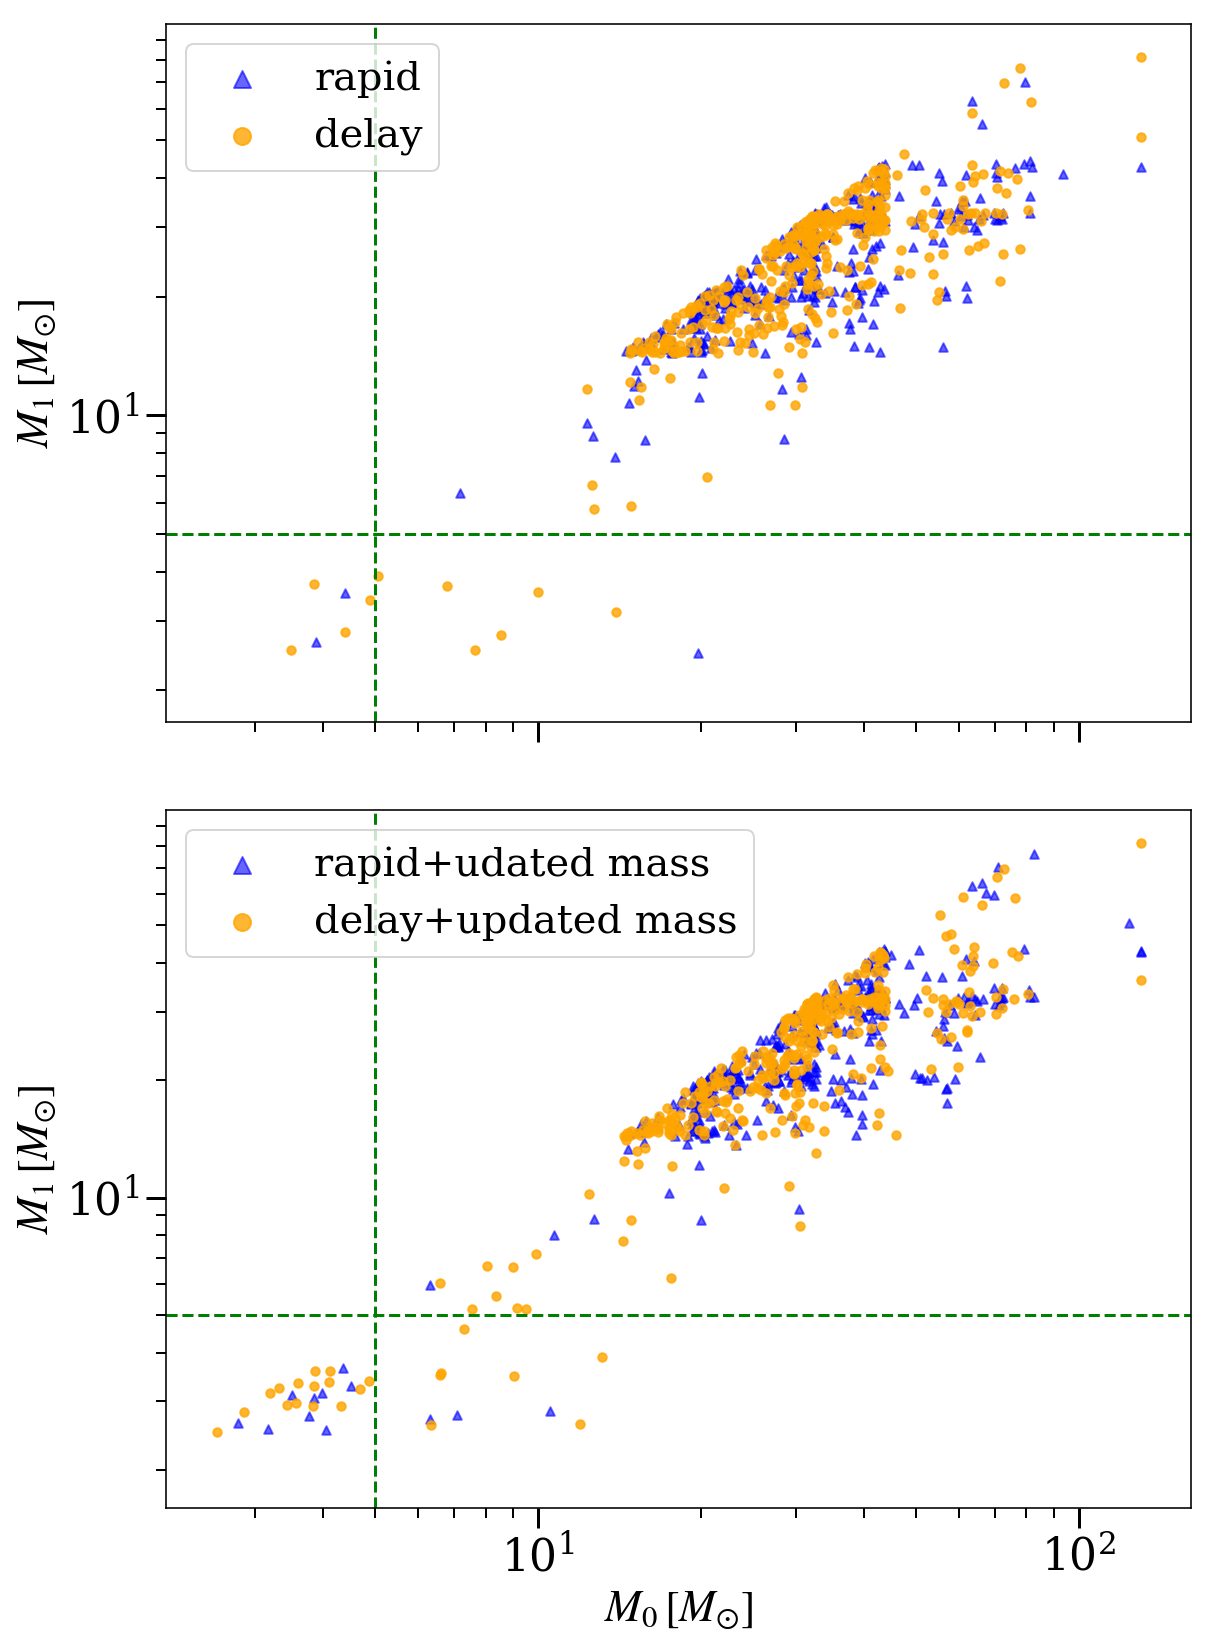

In [13]:
##BBH mergers in models
co_type = 'BBH'

m0 = []; m1 = []; bbh_type = []; id_bh1 = []; id_bh2 = []; types_model = []
for ii in range(len(paths)):
    #print(paths[ii])
    bbh_col = np.genfromtxt(paths[ii]+'GWcap_'+co_type+'.dat')
    three_col = bbh_col[:,12]
    bbh_mer = np.genfromtxt(paths[ii]+'Incluster_'+co_type+'.dat')
    bbh_esc = np.genfromtxt(paths[ii]+'Esc_'+co_type+'.dat')
    t_merger = bbh_esc[:,2]+bbh_esc[:,3]
    
    m0 = m0+list(bbh_col[:,10][three_col==-100])
    m1 = m1+list(bbh_col[:,11][three_col==-100])
    bbh_type = bbh_type+list(np.full_like(bbh_col[:,10][three_col==-100], 1))
    types_model=types_model+list(np.full_like(bbh_col[:,10][three_col==-100], model_type[ii]))
    
    m0 = m0+list(bbh_mer[:,7])
    m1 = m1+list(bbh_mer[:,8])
    bbh_type = bbh_type+list(np.full_like(bbh_mer[:,7], 2))
    types_model = types_model+list(np.full_like(bbh_mer[:,7], model_type[ii]))
    
    m0=m0+list(bbh_esc[:,4][t_merger<=14000.])
    m1=m1+list(bbh_esc[:,5][t_merger<=14000.])
    bbh_type = bbh_type+list(np.full_like(bbh_esc[:,4][t_merger<=14000.], 3))
    types_model = types_model+list(np.full_like(bbh_esc[:,4][t_merger<=14000.], model_type[ii]))

M0 = np.maximum(m0,m1)
M1 = np.minimum(m0,m1)
types_model = np.array(types_model)

fig, axs = plt.subplots(nrows=2, figsize=(9,12), sharex=True)
axs[0].scatter(M0[types_model==1], M1[types_model==1], marker='^',
            alpha=0.6, s=18, color = 'b', label='rapid')
axs[0].scatter(M0[types_model==3], M1[types_model==3],
            alpha=0.8, s=18, color='orange', label='delay')
axs[0].axhline(y=5, ls='--', color='green')
axs[0].axvline(x=5, ls='--', color='green')
#axs[0].set_xlabel(r'$M_0\,[M_{\odot}]$')
axs[0].set_ylabel(r'$M_1\,[M_{\odot}]$')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].tick_params('both', length=10, width=1.5, which='major')
axs[0].tick_params('both', length=5, width=1, which='minor')
axs[0].legend(loc='upper left', fontsize=20, markerscale=2)

axs[1].scatter(M0[types_model==2], M1[types_model==2], marker='^',
            alpha=0.6, s=18, color = 'b', label='rapid+udated mass')
axs[1].scatter(M0[types_model==4], M1[types_model==4],
            alpha=0.8, s=18, color='orange', label='delay+updated mass')
axs[1].axhline(y=5, ls='--', color='green')
axs[1].axvline(x=5, ls='--', color='green')
axs[1].set_xlabel(r'$M_0\,[M_{\odot}]$')
axs[1].set_ylabel(r'$M_1\,[M_{\odot}]$')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].tick_params('both', length=10, width=1.5, which='major')
axs[1].tick_params('both', length=5, width=1, which='minor')
axs[1].legend(loc='upper left', fontsize=20, markerscale=2)
fig.tight_layout()

#plt.savefig(savepath+'BBH_masses.pdf', dpi=300)

/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py:37: UserWarning: genfromtxt: Empty input file: "/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun_delay/GWcap_DNS.dat"
/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py:37: UserWarning: genfromtxt: Empty input file: "/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_nstde0.2_wdtc_qcrit4/GWcap_DNS.dat"
/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py:37: UserWarning: genfromtxt: Empty input file: "/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc1851/N1.3e6rv0.5z0.0013rg20/GWcap_DNS.dat"
/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py:97: UserWarning: genfromtxt: Empty input file: "/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_upd

testing 1.87143 9.89541
[[122446.0, 879689.0, 843689.0], [883660.0, 979253.0], [940600.0, 74982.0, 220159.0, 313153.0, 844622.0, 965371.0, 168178.0, 399687.0, 30020.0], [535977.0, 422317.0, 922301.0, 844014.0, 371018.0, 841901.0, 857600.0, 506740.0, 908851.0, 156157.0, 1032280.0, 213868.0, 52091.0, 467094.0, 910608.0], [160055.0, 831250.0], [635365.0, 0.0, 1358281.0, 771863.0], [205977.0, 877316.0, 717862.0, 858178.0, 854481.0, 844087.0], [163330.0, 849118.0, 276544.0, 1299343.0, 854750.0, 624033.0, 409963.0, 549936.0, 355526.0, 471089.0, 964141.0, 1033382.0, 732571.0, 744747.0], [1054793.0, 908053.0, 291199.0, 33364.0], [1287765.0, 721244.0, 523190.0, 919134.0, 848777.0, 548515.0, 430170.0], [206535.0, 893901.0, 1044160.0, 249027.0, 862518.0, 726785.0, 932597.0, 972370.0, 943959.0, 0.0], [850259.0, 722420.0, 586838.0, 1335439.0, 980627.0, 401229.0, 874462.0, 914947.0, 33537.0, 876707.0, 775904.0, 160044.0, 863810.0], [0.0, 640656.0, 970743.0, 0.0, 958778.0, 167638.0, 940588.0, 954888.

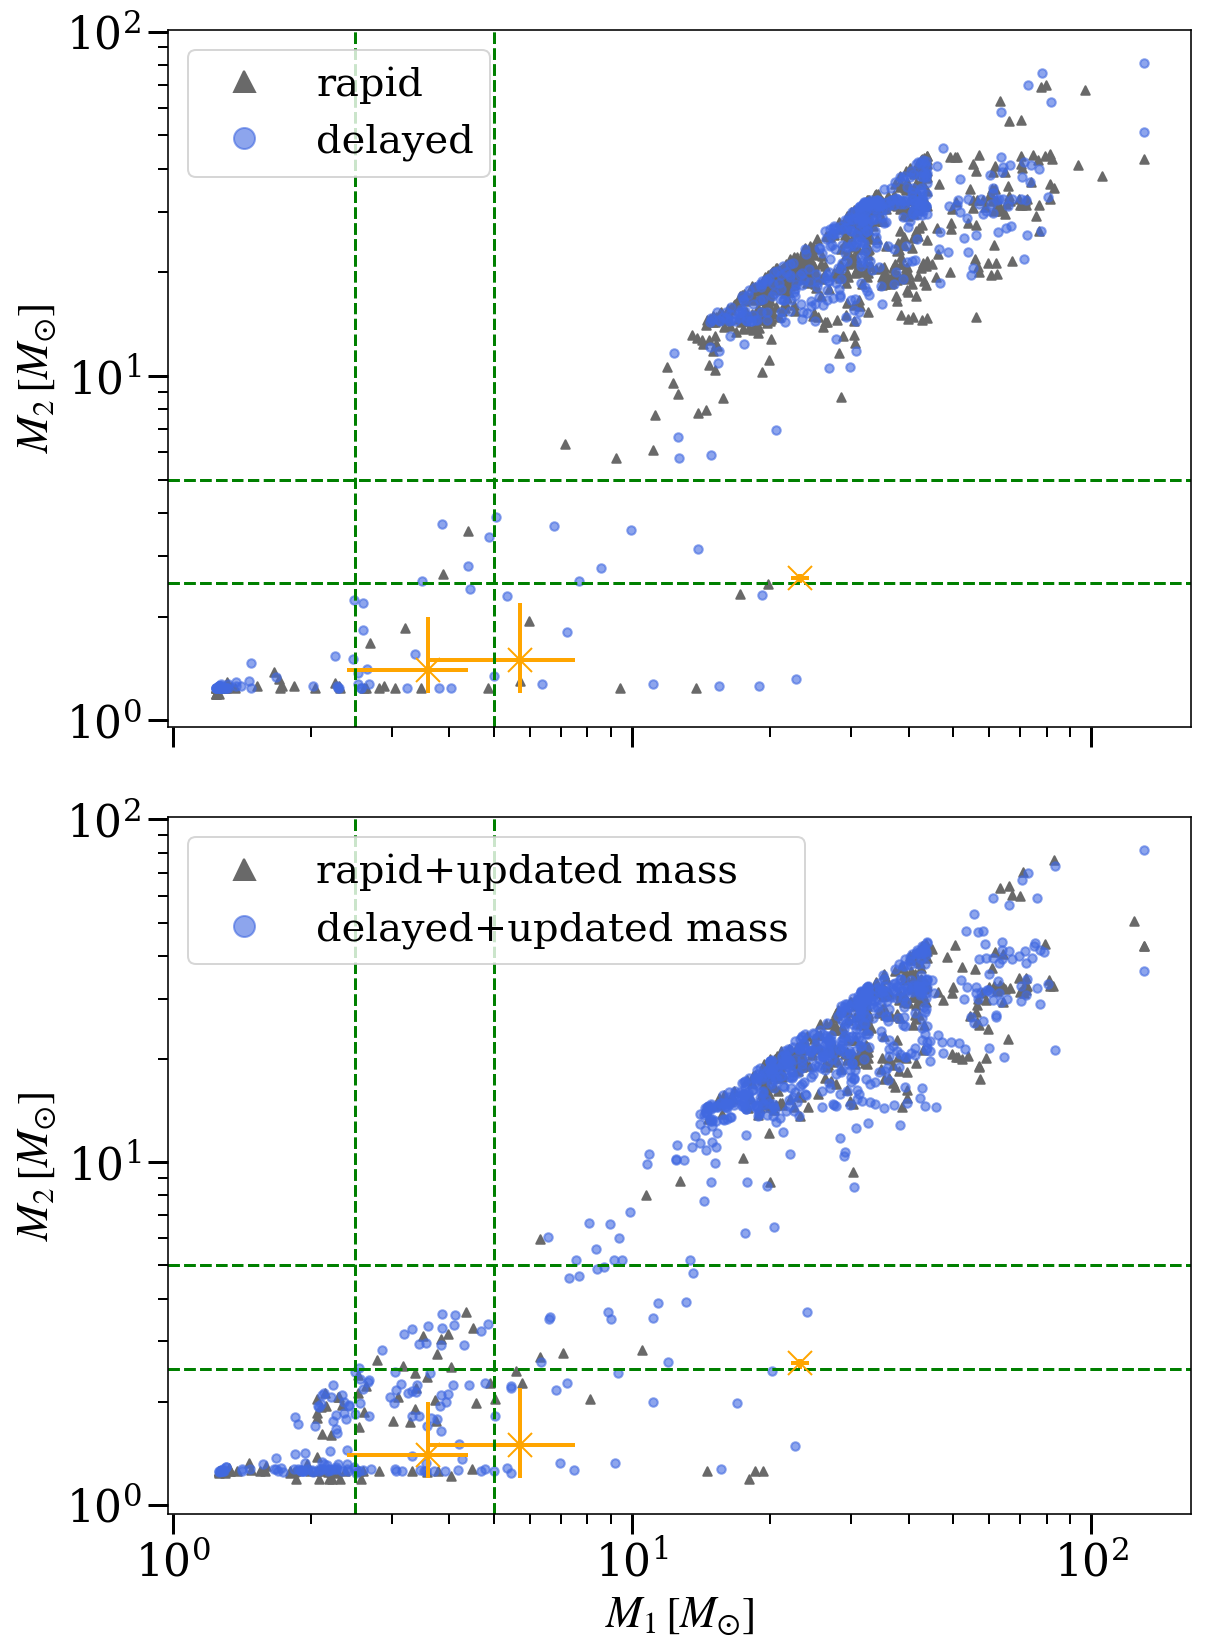

In [9]:
##NSBH and BBH mergers in models
##Observed mass-gap mergers
##GW230529, GW200115, GW190814
m0_gwobs = [3.6, 5.7, 23.2]; m1_gwobs = [1.4, 1.5, 2.59]
merr0_gwobs = [[1.2, 2.1, 1], [0.8, 1.8, 1.1]]; merr1_gwobs = [[0.2, 0.3, 0.09], [0.6, 0.7, 0.08]]


##Models
co_type = ['DNS', 'NSBH', 'BBH']

m0 = [[],[],[]]; m1 = [[],[],[]]; bbh_type = [[],[],[]]; id_all0 = [[],[],[]]; id_all1 = [[],[],[]] 
types_model = [[],[],[]]
M0 = [[],[],[]]; M1 = [[],[],[]]
id_mg0 = [[],[],[]]; id_mg1 = [[],[],[]] 
m_mg0 = [[],[],[]]; m_mg1 = [[],[],[]]
t_mg = [[],[],[]]

N_dns2bh = []
#cs = ['dimgray', 'orange', 'royalblue', 'crimson']
#labels = ['rapid', 'rapid+updated mass', 'delayed', 'delayed+updated mass']
btri_1=mlines.Line2D([], [],  linestyle = 'None', color='dimgray', marker='^',
                  markersize=7, alpha=1., label='rapid')
odot_1=mlines.Line2D([], [],  linestyle = 'None', color='royalblue', marker='o',
                  markersize=7, alpha=0.6, label='delayed')
btri_2=mlines.Line2D([], [],  linestyle = 'None', color='dimgray', marker='^',
                  markersize=7, alpha=1., label='rapid+updated mass')
odot_2=mlines.Line2D([], [],  linestyle = 'None', color='royalblue', marker='o',
                  markersize=7, alpha=0.6, label='delayed+updated mass')

fig, axs = plt.subplots(nrows=2, figsize=(9,12), sharex=True)
for xx in range(len(co_type)):
    for ii in range(len(paths)):
        ##To check how many mass-gap BHs come from DNS mergers
        m0_dns = []; m1_dns = []; type_dns = []; mm_dns = []
        
        #print(paths[ii])
        bbh_col = np.genfromtxt(paths[ii]+'GWcap_'+co_type[xx]+'.dat')
        #print(len(bbh_col))
        if len(bbh_col)>0:
            if len(bbh_col.shape)>1:
                three_col = bbh_col[:,12]
                m0[xx] = m0[xx]+list(bbh_col[:,10][three_col==-100])
                m1[xx] = m1[xx]+list(bbh_col[:,11][three_col==-100])
                bbh_type[xx] = bbh_type[xx]+list(np.full_like(bbh_col[:,10][three_col==-100], 1))
                types_model[xx]=types_model[xx]+list(np.full_like(bbh_col[:,10][three_col==-100], model_type[ii]))
                id_all0[xx].append(list(bbh_col[:,5][three_col==-100]))
                id_all1[xx].append(list(bbh_col[:,6][three_col==-100]))
                
                selec_crit0 = (bbh_col[:,10][three_col==-100]>=2.5) & (bbh_col[:,10][three_col==-100]<=5)
                selec_crit1 = (bbh_col[:,11][three_col==-100]>=2.5) & (bbh_col[:,11][three_col==-100]<=5)
                id_mg0[xx].append(list(bbh_col[:,5][three_col==-100][(selec_crit0) | (selec_crit1)]))
                id_mg1[xx].append(list(bbh_col[:,6][three_col==-100][(selec_crit0) | (selec_crit1)]))
                m_mg0[xx].append(list(bbh_col[:,10][three_col==-100][(selec_crit0) | (selec_crit1)]))
                m_mg1[xx].append(list(bbh_col[:,11][three_col==-100][(selec_crit0) | (selec_crit1)]))
                t_mg[xx].append(list(bbh_col[:,1][three_col==-100][(selec_crit0) | (selec_crit1)]))
                
                if xx==0:
                    m0_dns = m0_dns+list(bbh_col[:,10])
                    m1_dns = m1_dns+list(bbh_col[:,11])
                    type_dns = type_dns+list(np.full_like(bbh_col[:,10], 1))
                    mm_dns = mm_dns+list(bbh_col[:,9])
            else:
                #print(bbh_col)
                three_col = bbh_col[12]
                m0[xx] = m0[xx]+list(bbh_col[10][three_col==-100])
                m1[xx] = m1[xx]+list(bbh_col[11][three_col==-100])
                bbh_type[xx] = bbh_type[xx]+list(np.full_like(bbh_col[10][three_col==-100], 1))
                types_model[xx]=types_model[xx]+list(np.full_like(bbh_col[10][three_col==-100], model_type[ii]))
                id_all0[xx].append(list(bbh_col[5][three_col==-100]))
                id_all1[xx].append(list(bbh_col[6][three_col==-100]))
                
                selec_crit0 = (bbh_col[10][three_col==-100]>=2.5) & (bbh_col[10][three_col==-100]<=5)
                selec_crit1 = (bbh_col[11][three_col==-100]>=2.5) & (bbh_col[11][three_col==-100]<=5)
                id_mg0[xx].append(list(bbh_col[5][three_col==-100][(selec_crit0) | (selec_crit1)]))
                id_mg1[xx].append(list(bbh_col[6][three_col==-100][(selec_crit0) | (selec_crit1)]))
                m_mg0[xx].append(list(bbh_col[10][three_col==-100][(selec_crit0) | (selec_crit1)]))
                m_mg1[xx].append(list(bbh_col[11][three_col==-100][(selec_crit0) | (selec_crit1)]))
                t_mg[xx].append(list(bbh_col[1][three_col==-100][(selec_crit0) | (selec_crit1)]))
                
                if xx==0:
                    m0_dns = m0_dns+[bbh_col[10]]
                    m1_dns = m1_dns+[bbh_col[11]]
                    type_dns = type_dns+[np.full_like(bbh_col[10], 1)]
                    mm_dns = mm_dns+[bbh_col[9]]
                                     
        else:
            id_all0[xx].append([])
            id_all1[xx].append([])
            
            id_mg0[xx].append([])
            id_mg1[xx].append([])
            m_mg0[xx].append([])
            m_mg1[xx].append([])
            t_mg[xx].append([])
            
            
        bbh_mer = np.genfromtxt(paths[ii]+'Incluster_'+co_type[xx]+'.dat')
        if len(bbh_mer)>0 and len(bbh_mer.shape)>1:
            m0[xx] = m0[xx]+list(bbh_mer[:,7])
            m1[xx] = m1[xx]+list(bbh_mer[:,8])
            bbh_type[xx] = bbh_type[xx]+list(np.full_like(bbh_mer[:,7], 2))
            types_model[xx] = types_model[xx]+list(np.full_like(bbh_mer[:,7], model_type[ii]))
            id_all0[xx][ii] = id_all0[xx][ii] + list(bbh_mer[:,4])
            id_all1[xx][ii] = id_all1[xx][ii] + list(bbh_mer[:,5])
            
            selec_crit0 = (bbh_mer[:,7]>=2.5) & (bbh_mer[:,7]<=5)
            selec_crit1 = (bbh_mer[:,8]>=2.5) & (bbh_mer[:,8]<=5)
            id_mg0[xx][ii] = id_mg0[xx][ii] + list(bbh_mer[:,4][(selec_crit0) | (selec_crit1)])
            id_mg1[xx][ii] = id_mg1[xx][ii] + list(bbh_mer[:,5][(selec_crit0) | (selec_crit1)])
            m_mg0[xx][ii] = m_mg0[xx][ii] + list(bbh_mer[:,7][(selec_crit0) | (selec_crit1)])
            m_mg1[xx][ii] = m_mg1[xx][ii] + list(bbh_mer[:,8][(selec_crit0) | (selec_crit1)])
            t_mg[xx][ii] = t_mg[xx][ii] + list(bbh_mer[:,1][(selec_crit0) | (selec_crit1)])
        
            if xx==0:
                m0_dns = m0_dns+list(bbh_mer[:,7])
                m1_dns = m1_dns+list(bbh_mer[:,8])
                type_dns = type_dns+list(np.full_like(bbh_mer[:,7], 2))
                mm_dns = mm_dns+list(bbh_mer[:,6])
        
        elif len(bbh_mer)>0 and len(bbh_mer.shape)==1:
            print('testing', bbh_mer[7], bbh_mer[8])
            ###There is a bug here and I don't know what
            ###Since there is only one system I'll just ignore this for now
            
            #m0[xx] = m0[xx]+[bbh_mer[7]]
            #m1[xx] = m1[xx]+[bbh_mer[8]]
            #print('testing', len(m1[xx]), len(m0[xx]))
            #bbh_type[xx] = bbh_type[xx]+[2]
            #types_model[xx] = types_model[xx]+[model_type[ii]]
            #id_all0[xx][ii].append([bbh_mer[4]])
            #id_all1[xx][ii].append([bbh_mer[5]])
            #
            #selec_crit0 = (bbh_mer[7]>=2.5) & (bbh_mer[7]<=5)
            #selec_crit1 = (bbh_mer[8]>=2.5) & (bbh_mer[8]<=5)
            #id_mg0[xx][ii].append(list(bbh_mer[4][(selec_crit0) | (selec_crit1)]))
            #id_mg1[xx][ii].append(list(bbh_mer[5][(selec_crit0) | (selec_crit1)]))
            #m_mg0[xx][ii].append(list(bbh_mer[7][(selec_crit0) | (selec_crit1)]))
            #m_mg1[xx][ii].append(list(bbh_mer[8][(selec_crit0) | (selec_crit1)]))
            #t_mg[xx][ii].append(list(bbh_mer[1][(selec_crit0) | (selec_crit1)]))
        
            #if xx==0:
            #    m0_dns = m0_dns+[bbh_mer[7]]
            #    m1_dns = m1_dns+[bbh_mer[8]]
            #    type_dns = type_dns+[2]
            #    mm_dns = mm_dns+[bbh_mer[6]]
                
        
        bbh_esc = np.genfromtxt(paths[ii]+'Esc_'+co_type[xx]+'.dat')
        if len(bbh_esc)>0:
            if len(bbh_esc.shape)>1:
                t_merger = bbh_esc[:,2]+bbh_esc[:,3]
                m0[xx]=m0[xx]+list(bbh_esc[:,4][t_merger<=14000.])
                m1[xx]=m1[xx]+list(bbh_esc[:,5][t_merger<=14000.])
                bbh_type[xx] = bbh_type[xx]+list(np.full_like(bbh_esc[:,4][t_merger<=14000.], 3))
                types_model[xx] = types_model[xx]+list(np.full_like(bbh_esc[:,4][t_merger<=14000.], model_type[ii]))
                id_all0[xx][ii] = id_all0[xx][ii] + list(bbh_esc[:,6][t_merger<=14000.])
                id_all1[xx][ii] = id_all1[xx][ii] + list(bbh_esc[:,7][t_merger<=14000.])
                
                selec_crit0 = (bbh_esc[:,4][t_merger<=14000.]>=2.5) & (bbh_esc[:,4][t_merger<=14000.]<=5)
                selec_crit1 = (bbh_esc[:,5][t_merger<=14000.]>=2.5) & (bbh_esc[:,5][t_merger<=14000.]<=5)
                id_mg0[xx][ii] = id_mg0[xx][ii] + list(bbh_esc[:,6][t_merger<=14000.][(selec_crit0) | (selec_crit1)])
                id_mg1[xx][ii] = id_mg1[xx][ii] + list(bbh_esc[:,7][t_merger<=14000.][(selec_crit0) | (selec_crit1)])
                m_mg0[xx][ii] = m_mg0[xx][ii] + list(bbh_esc[:,4][t_merger<=14000.][(selec_crit0) | (selec_crit1)])
                m_mg1[xx][ii] = m_mg1[xx][ii] + list(bbh_esc[:,5][t_merger<=14000.][(selec_crit0) | (selec_crit1)])
                t_mg[xx][ii] = t_mg[xx][ii] + list(bbh_esc[:,1][t_merger<=14000.][(selec_crit0) | (selec_crit1)])
                
                if xx==0:
                    m0_dns=m0_dns+list(bbh_esc[:,4][t_merger<=14000.])
                    m1_dns=m1_dns+list(bbh_esc[:,5][t_merger<=14000.])
                    type_dns = type_dns+list(np.full_like(bbh_esc[:,4][t_merger<=14000.], 3))
                    mm_dns = mm_dns+list(bbh_esc[:,4][t_merger<=14000.]+bbh_esc[:,5][t_merger<=14000.])
  
            else:
                t_merger = bbh_esc[2]+bbh_esc[3]
                m0[xx]=m0[xx]+list(bbh_esc[4][t_merger<=14000.])
                m1[xx]=m1[xx]+list(bbh_esc[5][t_merger<=14000.])
                bbh_type[xx] = bbh_type[xx]+list(np.full_like(bbh_esc[4][t_merger<=14000.], 3))
                types_model[xx] = types_model[xx]+list(np.full_like(bbh_esc[4][t_merger<=14000.], model_type[ii]))
                id_all0[xx][ii] = id_all0[xx][ii] + list(bbh_esc[6][t_merger<=14000.])
                id_all1[xx][ii] = id_all1[xx][ii] + list(bbh_esc[7][t_merger<=14000.])
                
                selec_crit0 = (bbh_esc[4][t_merger<=14000.]>=2.5) & (bbh_esc[4][t_merger<=14000.]<=5)
                selec_crit1 = (bbh_esc[5][t_merger<=14000.]>=2.5) & (bbh_esc[5][t_merger<=14000.]<=5)
                id_mg0[xx][ii] = id_mg0[xx][ii] + list(bbh_esc[6][t_merger<=14000.][(selec_crit0) | (selec_crit1)])
                id_mg1[xx][ii] = id_mg1[xx][ii] + list(bbh_esc[7][t_merger<=14000.][(selec_crit0) | (selec_crit1)])
                m_mg0[xx][ii] = m_mg0[xx][ii] + list(bbh_esc[4][t_merger<=14000.][(selec_crit0) | (selec_crit1)])
                m_mg1[xx][ii] = m_mg1[xx][ii] + list(bbh_esc[5][t_merger<=14000.][(selec_crit0) | (selec_crit1)])
                t_mg[xx][ii] = t_mg[xx][ii] + list(bbh_esc[1][t_merger<=14000.][(selec_crit0) | (selec_crit1)])
                
                if xx==0:
                    m0_dns=m0_dns+list(bbh_esc[4][t_merger<=14000.])
                    m1_dns=m1_dns+list(bbh_esc[5][t_merger<=14000.])
                    type_dns = type_dns+list(np.full_like(bbh_esc[4][t_merger<=14000.], 3))
                    mm_dns = mm_dns+list(bbh_esc[4][t_merger<=14000.]+bbh_esc[5][t_merger<=14000.])
        
        if xx==0:
            m0_dns = np.array(m0_dns); m1_dns = np.array(m1_dns)
            type_dns = np.array(type_dns)
            mm_dns = np.array(mm_dns)
    
            N_dns2bh.append(len(mm_dns[(mm_dns>2.5) & (type_dns!=3)]))
            
    
    M0[xx] = np.maximum(m0[xx],m1[xx])
    M1[xx] = np.minimum(m0[xx],m1[xx])
    types_model[xx] = np.array(types_model[xx])

    axs[0].scatter(M0[xx][types_model[xx]==1], M1[xx][types_model[xx]==1], marker='^',
                alpha=1., s=18, color = 'dimgray')
    axs[0].scatter(M0[xx][types_model[xx]==3], M1[xx][types_model[xx]==3],
                alpha=0.6, s=18, color='royalblue')
    axs[0].axhline(y=5, ls='--', color='green')
    axs[0].axvline(x=5, ls='--', color='green')
    axs[0].axhline(y=2.5, ls='--', color='green')
    axs[0].axvline(x=2.5, ls='--', color='green')
    
    axs[1].scatter(M0[xx][types_model[xx]==2], M1[xx][types_model[xx]==2], marker='^',
            alpha=1.0, s=18, color = 'dimgray')
    axs[1].scatter(M0[xx][types_model[xx]==4], M1[xx][types_model[xx]==4],
                alpha=0.6, s=18, color='royalblue')
    axs[1].axhline(y=5, ls='--', color='green')
    axs[1].axvline(x=5, ls='--', color='green')
    axs[1].axhline(y=2.5, ls='--', color='green')
    axs[1].axvline(x=2.5, ls='--', color='green')
    
    
axs[0].errorbar(m0_gwobs, m1_gwobs, xerr = merr0_gwobs, yerr = merr1_gwobs,
                fmt='x', lw=2, markersize=12, color='orange')
axs[1].errorbar(m0_gwobs, m1_gwobs, xerr = merr0_gwobs, yerr = merr1_gwobs,
                fmt='x', lw=2, markersize=12, color='orange')
    
#axs[0].set_xlabel(r'$M_0\,[M_{\odot}]$')
axs[0].set_ylabel(r'$M_2\,[M_{\odot}]$')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].tick_params('both', length=10, width=1.5, which='major')
axs[0].tick_params('both', length=5, width=1, which='minor')
axs[0].legend(loc='upper left', fontsize=20, markerscale=1.5, handles=[btri_1, odot_1])

axs[1].set_xlabel(r'$M_1\,[M_{\odot}]$')
axs[1].set_ylabel(r'$M_2\,[M_{\odot}]$')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].tick_params('both', length=10, width=1.5, which='major')
axs[1].tick_params('both', length=5, width=1, which='minor')
axs[1].legend(loc='upper left', fontsize=20, markerscale=1.5, handles=[btri_2, odot_2])
fig.tight_layout()

#plt.savefig(savepath+'BBH_NSBH_DNS_masses.pdf', dpi=300)

#print(type(id_all0[0]), type(id_all0))
print(id_mg0[1],)

##Numbers(co_type = ['NSBH', 'BBH'])
for yy in range(2):
    print(yy)
    for xx in range(len(co_type)):
        Ms_r = M1[xx][types_model[xx]==(yy+1)];Mp_r = M0[xx][types_model[xx]==(yy+1)]
        Ms_d = M1[xx][types_model[xx]==(yy+3)];Mp_d = M0[xx][types_model[xx]==(yy+3)]
        
        if xx==0:
            print('NSBH', len(Ms_r), len(Ms_d), len(Ms_r[Mp_r<=5.]), len(Ms_d[Mp_d<=5]))
        if xx==1:
            print('BBH', len(Ms_r[Ms_r<=5.]), len(Ms_d[Ms_d<=5]), len(Ms_r[Mp_r<=5.]), len(Ms_d[Mp_d<=5]))

print('DNS to BH', N_dns2bh)

In [10]:
###Check how the mass gap objects form
co_type = ['DNS', 'NSBH', 'BBH']

#from importlib import reload
#reload(ecm)

flag0 = []; flag1 = []
flag_mg0 = []; flag_mg1 = []
k0 = []; k1 = []; k2 = []
m0 = []; m1 = []; m2 = []
type_co= []
model_co = []
id_co1 = []; id_co2 = []
m_co1 = []; m_co2 = []
interact_gap = [[],[]]; interact_first = [[],[]]; interact_no = [[],[]]

for zz in range(1,3):  ##because by definition DNS doesn't have mass gap objects
    for xx in range(len(paths)):
        #print(xx)
        for ii in range(len(id_mg0[zz][xx])):
            model_co.append(xx)
            type_co.append(co_type[zz])
            id_co1.append(id_mg0[zz][xx][ii]); id_co2.append(id_mg1[zz][xx][ii])
            m_co1.append(m_mg0[zz][xx][ii]); m_co2.append(m_mg1[zz][xx][ii])
            flag0.append(0); flag1.append(0)
            flag_mg0.append(0); flag_mg1.append(0)
            
            dict_hist0 = ecm.coll_merger_hist_previous(paths[xx], id_mg0[zz][xx], t_mg[zz][xx], [13,14])
            dict_hist1 = ecm.coll_merger_hist_previous(paths[xx], id_mg1[zz][xx], t_mg[zz][xx], [13,14])
            
            
            ##checking the interaction that push the object into the mass gap##
            if m_mg0[zz][xx][ii]>=2.5 and m_mg0[zz][xx][ii]<=5.0:
                if id_mg0[zz][xx][ii]==0: 
                    interact_first[0].append([-100])
                    interact_gap[0].append([-100])
                    interact_no[0].append(-100)
                    interact_first[1].append([-100])
                    interact_gap[1].append([-100])
                    interact_no[1].append(-100)
                    continue
                    
                dict_time = np.array(dict_hist0[str(int(id_mg0[zz][xx][ii]))]['time'])
                dict_m = np.array(dict_hist0[str(int(id_mg0[zz][xx][ii]))]['ms'])
                dict_k = np.array(dict_hist0[str(int(id_mg0[zz][xx][ii]))]['ks'])
                if len(dict_k[dict_m<2.5])>=1:
                    theinteract0 = list(dict_k[dict_m<2.5][0])
                else:
                    theinteract0 = [0]
                    
                #print(id_mg0[zz][xx][ii], theinteract0)
                interact_first[0].append(list(dict_k[-1]))
                interact_gap[0].append(theinteract0)
                interact_no[0].append(len(dict_m))
            else:
                theinteract0 = [0]
                interact_first[0].append([0]); interact_gap[0].append([0])
                interact_no[0].append(0)
                
            if m_mg1[zz][xx][ii]>=2.5 and m_mg1[zz][xx][ii]<=5.0:
                dict_time = np.array(dict_hist1[str(int(id_mg1[zz][xx][ii]))]['time'])
                dict_m = np.array(dict_hist1[str(int(id_mg1[zz][xx][ii]))]['ms'])
                dict_k = np.array(dict_hist1[str(int(id_mg1[zz][xx][ii]))]['ks'])
                if len(dict_k[dict_m<2.5])>=1:
                    theinteract1 = list(dict_k[dict_m<2.5][0])
                else:
                    theinteract1 = [0]
                
                #print(id_mg1[zz][xx][ii], theinteract1)
                if len(dict_k)<1: 
                    theinteract1=[-200]
                    interact_first[1].append([-200])
                    interact_gap[1].append([-200])
                    interact_no[1].append(-200)
                    continue
                    
                interact_first[1].append(list(dict_k[-1]))
                interact_gap[1].append(theinteract1)
                interact_no[1].append(len(dict_m))
                
            else:
                theinteract1 = [0]
                interact_first[1].append([0]); interact_gap[1].append([0])
                interact_no[1].append(0)
            
            
            ##checking if the mass-gap objects went through TDEs or WD-WD coll/mers##
            starnum_0=Counter(interact_first[0][-1])
            starnum_1=Counter(interact_first[1][-1])
            
            starnum_mg0=Counter(theinteract0)
            starnum_mg1=Counter(theinteract1)
            
            ##First interaction
            if id_mg0[zz][xx][ii] in id_wdwdcol_all[xx] or id_mg0[zz][xx][ii] in id_wdwdmer_all[xx]:
                flag0[-1]=1
                
                if id_mg0[zz][xx][ii] in idtde_all[xx] or id_mg0[zz][xx][ii] in idtde_latercoll_all[xx]:
                    flag0[-1]=2
                    
            elif (starnum_0[11]>=1 or starnum_0[12]>=1) and starnum_0[13]<1 and starnum_0[14]<1:
                flag0[-1]=1
                
                if id_mg0[zz][xx][ii] in idtde_all[xx] or id_mg0[zz][xx][ii] in idtde_latercoll_all[xx]:
                    flag0[-1]=2
            
                #if id_mg0[zz][xx][ii] in id_wdwdcol_all[xx] or id_mg0[zz][xx][ii] in id_wdwdmer_all[xx]:
                #    flag0[-1]=3
            
            elif (starnum_0[10]>=1 or starnum_0[11]>=1 or starnum_0[12]>=1) and starnum_0[13]==1 and starnum_0[14]<1:
                flag0[-1]=3 
            
            elif starnum_0[13]>=2 and starnum_0[14]<1:
                flag0[-1]=4
                
                
            if id_mg1[zz][xx][ii] in id_wdwdcol_all[xx] or id_mg1[zz][xx][ii] in id_wdwdmer_all[xx]:
                flag1[-1]=1
                
                if id_mg1[zz][xx][ii] in idtde_all[xx] or id_mg1[zz][xx][ii] in idtde_latercoll_all[xx]:
                    flag1[-1]=2
                    
            elif (starnum_1[11]>=1 or starnum_1[12]>=1) and starnum_1[13]<1 and starnum_1[14]<1:
                flag1[-1]=1
                
                if id_mg1[zz][xx][ii] in idtde_all[xx] or id_mg1[zz][xx][ii] in idtde_latercoll_all[xx]:
                    flag1[-1]=2
                
                #if id_mg1[zz][xx][ii] in id_wdwdcol_all[xx] or id_mg1[zz][xx][ii] in id_wdwdmer_all[xx]:
                #    flag1[-1]=3
                
            elif (starnum_1[10]>=1 or starnum_1[11]>=1 or starnum_1[12]>=1) and starnum_1[13]==1 and starnum_1[14]<1:
                flag1[-1]=3 
                
            elif starnum_1[13]>=2 and starnum_1[14]<1:
                flag1[-1]=4
                
                
            ##Interaction that produces the mass gap BH
            if (starnum_mg0[10]>=1 or starnum_mg0[11]>=1 or starnum_mg0[12]>=1) and starnum_mg0[13]==1 and starnum_mg0[14]<1:
                flag_mg0[-1]=1 
            
            elif starnum_mg0[13]>=2 and starnum_mg0[14]<1:
                flag_mg0[-1]=2
                
            elif (starnum_mg0[0]>=1 or starnum_mg0[1]>=1) and starnum_mg0[13]==1 and starnum_mg0[14]<1:
                flag_mg0[-1]=3
            
            elif starnum_0[14]==1:   ##Born as mass gap BH from delayed model probably
                flag_mg0[-1]=4
            
            elif (starnum_mg0[10]>=1 or starnum_mg0[11]>=1 or starnum_mg0[12]>=1) and starnum_mg0[13]<1 and starnum_mg0[14]<1:
                flag_mg0[-1]=5
                
            if (starnum_mg1[10]>=1 or starnum_mg1[11]>=1 or starnum_mg1[12]>=1) and starnum_mg1[13]==1 and starnum_mg1[14]<1:
                flag_mg1[-1]=1 
            
            elif starnum_mg1[13]>=2 and starnum_mg1[14]<1:
                flag_mg1[-1]=2
                
            elif (starnum_mg1[0]>=1 or starnum_mg1[1]>=1) and starnum_mg1[13]==1 and starnum_mg1[14]<1:
                flag_mg1[-1]=3
            
            elif starnum_1[14]==1:   ##Born as mass gap BH from delayed model probably
                flag_mg1[-1]=4
                
            elif (starnum_mg1[10]>=1 or starnum_mg1[11]>=1 or starnum_mg1[12]>=1) and starnum_mg1[13]<1 and starnum_mg1[14]<1:
                flag_mg1[-1]=5

                
flag0 = np.array(flag0); flag1 = np.array(flag1)
flag_mg0 = np.array(flag_mg0); flag_mg1 = np.array(flag_mg1)
type_co = np.array(type_co); model_co = np.array(model_co)
m_co1 = np.array(m_co1); m_co2 = np.array(m_co2)
id_co1 = np.array(id_co1); id_co2 = np.array(id_co2)

###Hand adding some of the flags especially for id=0
flag_mg0[(type_co=='NSBH') & (model_co==12) & (id_co2==1351013)] = 3
flag_mg0[(type_co=='NSBH') & (model_co==12) & (id_co2==946921)] = 3
flag_mg0[(type_co=='BBH') & (model_co==1) & (id_co1==60316)] = 4
flag_mg1[(type_co=='BBH') & (model_co==1) & (id_co2==1179333)] = 6 ##6 is from star mergers that collapse to BHs
flag_mg0[(type_co=='BBH') & (model_co==1) & (id_co1==1062220)] = 6
flag_mg1[(type_co=='BBH') & (model_co==3) & (id_co2==651412)] = 4
flag_mg1[(type_co=='BBH') & (model_co==12) & (id_co2==983953)] = 6
flag_mg1[(type_co=='BBH') & (model_co==12) & (id_co2==862682)] = 3
flag_mg0[(type_co=='BBH') & (model_co==12) & (id_co2==862682)] = 3
##Only three 6 in total

for zz in range(1,3):  ##because by definition DNS doesn't have mass gap objects
    for xx in range(len(paths)):
        #n_dwd2bh = (len(flag0[(model_co==xx) & (type_co==co_type[zz]) & (m_co1>=2.5) & (m_co1<=5.) & ((flag0==1) | (flag0==2))])+
        #            len(flag1[(model_co==xx) & (type_co==co_type[zz]) & (m_co2>=2.5) & (m_co2<=5.) & ((flag1==1) | (flag1==2))]))
        #n_mg = (len(flag0[(model_co==xx) & (type_co==co_type[zz]) & (m_co1>=2.5) & (m_co1<=5.)])+
        #            len(flag1[(model_co==xx) & (type_co==co_type[zz]) & (m_co2>=2.5) & (m_co2<=5.)]))
        #n_nswd2bh = (len(flag0[(model_co==xx) & (type_co==co_type[zz]) & (m_co1>=2.5) & (m_co1<=5.) & (flag0==3)])+
        #             len(flag1[(model_co==xx) & (type_co==co_type[zz]) & (m_co2>=2.5) & (m_co2<=5.) & (flag1==3)]))
        #n_dns2bh = (len(flag0[(model_co==xx) & (type_co==co_type[zz]) & (m_co1>=2.5) & (m_co1<=5.) & (flag0==4)])+
        #             len(flag1[(model_co==xx) & (type_co==co_type[zz]) & (m_co2>=2.5) & (m_co2<=5.) & (flag1==4)]))
        
        n_mg = (len(flag_mg0[(model_co==xx) & (type_co==co_type[zz]) & (m_co1>=2.5) & (m_co1<=5.)])+
                len(flag_mg1[(model_co==xx) & (type_co==co_type[zz]) & (m_co2>=2.5) & (m_co2<=5.)]))
        n_nswd2bh = (len(flag_mg0[(model_co==xx) & (type_co==co_type[zz]) & (m_co1>=2.5) & (m_co1<=5.) & (flag_mg0==1)])+
                     len(flag_mg1[(model_co==xx) & (type_co==co_type[zz]) & (m_co2>=2.5) & (m_co2<=5.) & (flag_mg1==1)]))
        n_dns2bh = (len(flag_mg0[(model_co==xx) & (type_co==co_type[zz]) & (m_co1>=2.5) & (m_co1<=5.) & (flag_mg0==2)])+
                    len(flag_mg1[(model_co==xx) & (type_co==co_type[zz]) & (m_co2>=2.5) & (m_co2<=5.) & (flag_mg1==2)]))
        n_nsms2bh = (len(flag_mg0[(model_co==xx) & (type_co==co_type[zz]) & (m_co1>=2.5) & (m_co1<=5.) & (flag_mg0==3)])+
                     len(flag_mg1[(model_co==xx) & (type_co==co_type[zz]) & (m_co2>=2.5) & (m_co2<=5.) & (flag_mg1==3)]))
        n_bh2bh = (len(flag_mg0[(model_co==xx) & (type_co==co_type[zz]) & (m_co1>=2.5) & (m_co1<=5.) & (flag_mg0==4)])+
                   len(flag_mg1[(model_co==xx) & (type_co==co_type[zz]) & (m_co2>=2.5) & (m_co2<=5.) & (flag_mg1==4)]))
        n_dwd2bh = (len(flag_mg0[(model_co==xx) & (type_co==co_type[zz]) & (m_co1>=2.5) & (m_co1<=5.) & (flag_mg0==5)])+
                    len(flag_mg1[(model_co==xx) & (type_co==co_type[zz]) & (m_co2>=2.5) & (m_co2<=5.) & (flag_mg1==5)]))
        
        if n_mg>0: 
            print(co_type[zz], n_nswd2bh/n_mg, n_dns2bh/n_mg, n_nsms2bh/n_mg, n_bh2bh/n_mg, n_dwd2bh/n_mg,
                  n_nswd2bh, n_dns2bh, n_nsms2bh, n_bh2bh, n_dwd2bh, n_mg)
        else:
            print(co_type[zz], n_nswd2bh, n_dns2bh, n_nsms2bh, n_bh2bh, n_dwd2bh, n_mg)
        
        
####Total numbers
for zz in range(1,3):  ##because by definition DNS doesn't have mass gap objects
    n_mg = (len(flag_mg0[(model_co<=11) & (type_co==co_type[zz]) & (m_co1>=2.5) & (m_co1<=5.)])+
            len(flag_mg1[(model_co<=11) & (type_co==co_type[zz]) & (m_co2>=2.5) & (m_co2<=5.)]))
    n_nswd2bh = (len(flag_mg0[(model_co<=11) & (type_co==co_type[zz]) & (m_co1>=2.5) & (m_co1<=5.) & (flag_mg0==1)])+
                 len(flag_mg1[(model_co<=11) & (type_co==co_type[zz]) & (m_co2>=2.5) & (m_co2<=5.) & (flag_mg1==1)]))
    n_dns2bh = (len(flag_mg0[(model_co<=11) & (type_co==co_type[zz]) & (m_co1>=2.5) & (m_co1<=5.) & (flag_mg0==2)])+
                len(flag_mg1[(model_co<=11) & (type_co==co_type[zz]) & (m_co2>=2.5) & (m_co2<=5.) & (flag_mg1==2)]))
    n_nsms2bh = (len(flag_mg0[(model_co<=11) & (type_co==co_type[zz]) & (m_co1>=2.5) & (m_co1<=5.) & (flag_mg0==3)])+
                 len(flag_mg1[(model_co<=11) & (type_co==co_type[zz]) & (m_co2>=2.5) & (m_co2<=5.) & (flag_mg1==3)]))
    n_bh2bh = (len(flag_mg0[(model_co<=11) & (type_co==co_type[zz]) & (m_co1>=2.5) & (m_co1<=5.) & (flag_mg0==4)])+
               len(flag_mg1[(model_co<=11) & (type_co==co_type[zz]) & (m_co2>=2.5) & (m_co2<=5.) & (flag_mg1==4)]))
    n_dwd2bh = (len(flag_mg0[(model_co<=11) & (type_co==co_type[zz]) & (m_co1>=2.5) & (m_co1<=5.) & (flag_mg0==5)])+
                len(flag_mg1[(model_co<=11) & (type_co==co_type[zz]) & (m_co2>=2.5) & (m_co2<=5.) & (flag_mg1==5)]))
    
    print('Total number and fraction', co_type[zz], n_nswd2bh/n_mg, n_dns2bh/n_mg, n_nsms2bh/n_mg, n_bh2bh/n_mg, n_dwd2bh/n_mg,
          n_nswd2bh, n_dns2bh, n_nsms2bh, n_bh2bh, n_dwd2bh, n_mg)
    
    
from IPython.display import display
  
# creating a DataFrame
dict = {'#': model_co,
        'm0' : m_co1,
        'm1' : m_co2,
        'id0': id_co1,
        'id1': id_co2,
        'types': type_co,
        'flag_mg0': flag_mg0,
        'flag_mg1': flag_mg1,
        'interact_gap0': interact_gap[0],
        'interact_gap1': interact_gap[1],
        'interact_first0': interact_first[0],
        'interact_first1': interact_first[1],
        'interact_no0': interact_no[0],
        'interact_no1': interact_no[1]}
df = pd.DataFrame(dict)
  
# displaying the DataFrame
pd.set_option("max_rows", None)
display(df)

#df.to_csv(savepath+'mass_gap_merger_history.csv')

NSBH 0.3333333333333333 0.3333333333333333 0.3333333333333333 0.0 0.0 1 1 1 0 0 3
NSBH 0.5 0.0 0.0 0.0 0.5 1 0 0 0 1 2
NSBH 0.5555555555555556 0.4444444444444444 0.0 0.0 0.0 5 4 0 0 0 9
NSBH 0.8 0.2 0.0 0.0 0.0 12 3 0 0 0 15
NSBH 0.5 0.5 0.0 0.0 0.0 1 1 0 0 0 2
NSBH 0.25 0.0 0.5 0.25 0.0 1 0 2 1 0 4
NSBH 0.6666666666666666 0.3333333333333333 0.0 0.0 0.0 4 2 0 0 0 6
NSBH 0.6428571428571429 0.2857142857142857 0.0 0.0 0.07142857142857142 9 4 0 0 1 14
NSBH 0.5 0.5 0.0 0.0 0.0 2 2 0 0 0 4
NSBH 0.0 0.7142857142857143 0.14285714285714285 0.14285714285714285 0.0 0 5 1 1 0 7
NSBH 0.7 0.2 0.0 0.0 0.0 7 2 0 0 0 10
NSBH 0.6923076923076923 0.23076923076923078 0.0 0.07692307692307693 0.0 9 3 0 1 0 13
NSBH 0.3684210526315789 0.05263157894736842 0.47368421052631576 0.05263157894736842 0.05263157894736842 7 1 9 1 1 19
BBH 1.0 0.0 0.0 0.0 0.0 2 0 0 0 0 2
BBH 0.14285714285714285 0.0 0.0 0.5714285714285714 0.0 1 0 0 4 0 7
BBH 1.0 0.0 0.0 0.0 0.0 7 0 0 0 0 7
BBH 0.6666666666666666 0.2 0.0 0.133333333333333

#  flag_mg0  flag_mg1        id0        id1       interact_first0  \
0     0         0         1   122446.0   900736.0                   [0]   
1     0         2         0   879689.0  1082987.0  [11, 12, -100, -100]   
2     0         3         0   843689.0  1058303.0   [0, 13, -100, -100]   
3     1         1         0   883660.0   898754.0   [13, 0, -100, -100]   
4     1         5         0   979253.0  1172174.0     [11, 6, 12, -100]   
5     2         1         0   940600.0   972294.0  [11, 13, -100, -100]   
6     2         0         1    74982.0   273694.0                   [0]   
7     2         2         0   220159.0  1166586.0  [13, 13, -100, -100]   
8     2         0         1   313153.0  1109731.0                   [0]   
9     2         0         2   844622.0   909803.0                   [0]   
10    2         0         1   965371.0   974136.0                   [0]   
11    2         0         2   168178.0   957623.0                   [0]   
12    2         2         0   399687.0   891686.0  [12, 12, -100, -100]   
13    2         1         0    30020.0  1083585.0  [13, 11, -100, -100]   
14    3         0         1   535977.0   754975.0                   [0]   
15    3         0         1   422317.0   742151.0                   [0]   
16    3         1         0   922301.0  1165615.0  [11, 11, -100, -100]   
17    3         2         0   844014.0   907554.0     [13, 1, 13, -100]   
18    3         0         1   371018.0   556916.0                   [0]   
19    3         0         2   841901.0  1257767.0                   [0]   
20    3         1         0   857600.0   963811.0  [11, 12, -100, -100]   
21    3         0         1   506740.0  1028024.0                   [0]   
22    3         1         0   908851.0  1085838.0     [11, 13, 1, -100]   
23    3         0         1   156157.0   969230.0                   [0]   
24    3         1         0  1032280.0  1305113.0  [13, 12, -100, -100]   
25    3         0         1   213868.0   482117.0                   [0]   
26    3         1         0    52091.0   904056.0  [11, 11, -100, -100]   
27    3         0         1   467094.0   963467.0                   [0]   
28    3         0         2   910608.0   962125.0                   [0]   
29    4         0         2   160055.0  1025654.0                   [0]   
30    4         0         1   831250.0  1161554.0                   [0]   
31    5         0         4   635365.0   834424.0                   [0]   
32    5         0         3        0.0   839963.0                   [0]   
33    5         0         1  1358281.0  1414183.0                   [0]   
34    5         0         3   771863.0  1279594.0                   [0]   
35    6         0         2   205977.0   900795.0                   [0]   
36    6         1         0   877316.0  1040576.0  [12, 11, -100, -100]   
37    6         0         1   717862.0   826128.0                   [0]   
38    6         0         1   858178.0  1095216.0                   [0]   
39    6         2         0   854481.0   871360.0  [11, 12, -100, -100]   
40    6         0         1   844087.0   877528.0                   [0]   
41    7         0         5   163330.0   839963.0                   [0]   
42    7         1         0   849118.0   857171.0  [12, 11, -100, -100]   
43    7         2         0   276544.0  1100523.0  [11, 12, -100, -100]   
44    7         2         0  1299343.0   902639.0  [12, 11, -100, -100]   
45    7         0         2   854750.0  1245494.0                   [0]   
46    7         1         0   624033.0   883980.0     [1, 13, 11, -100]   
47    7         0         2   409963.0  1017416.0                   [0]   
48    7         1         0   549936.0  1125232.0  [11, 11, -100, -100]   
49    7         1         0   355526.0  1434322.0  [11, 13, -100, -100]   
50    7         0         1   471089.0  1008934.0                   [0]   
51    7         1         0   964141.0  1180615.0  [12, 13, -100, -100]   
52    7         1         0  10

In [10]:
##NSBH and BBH mergers in each model
##Fraction of mergers containing mass gaps
co_type = ['NSBH', 'BBH']

F_mg_merger = [[], []]

for ii in range(len(paths)):
    m0 = [[],[]]; m1 = [[],[]]; bbh_type = [[],[]]; id_bh1 = [[],[]]; id_bh2 = [[],[]]; types_model = [[],[]]
    M0 = [[],[]]; M1 = [[],[]]
        
    print(paths[ii])
    for xx in range(len(co_type)):
        #print(co_type[xx])
        
        bbh_col = np.genfromtxt(paths[ii]+'GWcap_'+co_type[xx]+'.dat')
        #print(len(bbh_col))
        if len(bbh_col)>0:
            if len(bbh_col.shape)>1:
                three_col = bbh_col[:,12]
                m0[xx] = m0[xx]+list(bbh_col[:,10][three_col==-100])
                m1[xx] = m1[xx]+list(bbh_col[:,11][three_col==-100])
                bbh_type[xx] = bbh_type[xx]+list(np.full_like(bbh_col[:,10][three_col==-100], 1))
                types_model[xx]=types_model[xx]+list(np.full_like(bbh_col[:,10][three_col==-100], model_type[ii]))
            else:
                #print(bbh_col)
                three_col = bbh_col[12]
                m0[xx] = m0[xx]+list(bbh_col[10][three_col==-100])
                m1[xx] = m1[xx]+list(bbh_col[11][three_col==-100])
                bbh_type[xx] = bbh_type[xx]+list(np.full_like(bbh_col[10][three_col==-100], 1))
                types_model[xx]=types_model[xx]+list(np.full_like(bbh_col[10][three_col==-100], model_type[ii]))
            
        bbh_mer = np.genfromtxt(paths[ii]+'Incluster_'+co_type[xx]+'.dat')
        if len(bbh_mer)>0:
            if len(bbh_mer.shape)>1:
                m0[xx] = m0[xx]+list(bbh_mer[:,7])
                m1[xx] = m1[xx]+list(bbh_mer[:,8])
                bbh_type[xx] = bbh_type[xx]+list(np.full_like(bbh_mer[:,7], 2))
                types_model[xx] = types_model[xx]+list(np.full_like(bbh_mer[:,7], model_type[ii]))
                
            else:
                m0[xx].append(float(bbh_mer[7]))
                m1[xx].append(float(bbh_mer[8]))
                bbh_type[xx].append(2)
                types_model[xx].append(model_type[ii])
        
        bbh_esc = np.genfromtxt(paths[ii]+'Esc_'+co_type[xx]+'.dat')
        if len(bbh_esc)>0:
            if len(bbh_esc.shape)>1:
                t_merger = bbh_esc[:,2]+bbh_esc[:,3]
                m0[xx]=m0[xx]+list(bbh_esc[:,4][t_merger<=14000.])
                m1[xx]=m1[xx]+list(bbh_esc[:,5][t_merger<=14000.])
                bbh_type[xx] = bbh_type[xx]+list(np.full_like(bbh_esc[:,4][t_merger<=14000.], 3))
                types_model[xx] = types_model[xx]+list(np.full_like(bbh_esc[:,4][t_merger<=14000.], model_type[ii]))
            else:
                t_merger = bbh_esc[2]+bbh_esc[3]
                m0[xx]=m0[xx]+list(bbh_esc[4][t_merger<=14000.])
                m1[xx]=m1[xx]+list(bbh_esc[5][t_merger<=14000.])
                bbh_type[xx] = bbh_type[xx]+list(np.full_like(bbh_esc[4][t_merger<=14000.], 3))
                types_model[xx] = types_model[xx]+list(np.full_like(bbh_esc[4][t_merger<=14000.], model_type[ii]))
            
    
        M0[xx] = np.maximum(m0[xx],m1[xx])
        M1[xx] = np.minimum(m0[xx],m1[xx])
    
        if xx==0:
            print(ii, co_type[xx], len(M1[xx]), len(M1[xx][(M0[xx]>2.5) & (M0[xx]<5.)])/len(M1[xx]), model_type[ii])
            F_mg_merger[xx].append(len(M1[xx][(M0[xx]>2.5) & (M0[xx]<5.)])/len(M1[xx]))
        if xx==1:
            print(ii, co_type[xx], len(M1[xx][(M1[xx]<=5.) | (M0[xx]<=5.)])/len(M1[xx]), 
                  len(M1[xx][(M1[xx]<=5.) & (M0[xx]<=5.)])/len(M1[xx]), model_type[ii])
            F_mg_merger[xx].append(len(M1[xx][(M1[xx]<5.) | (M0[xx]<5.)])/len(M1[xx]))
            if ii==4: print(M0[1][M0[1]<5.], M1[1][M1[1]<5.])

print(M0[0])

/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun/
0 NSBH 3 1.0 1
0 BBH 0.006711409395973154 0.006711409395973154 1
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun_delay/
1 NSBH 7 0.2857142857142857 3
1 BBH 0.03424657534246575 0.0136986301369863 3
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass/
2 NSBH 13 0.6923076923076923 2
2 BBH 0.026143790849673203 0.0196078431372549 2
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass_delay/
3 NSBH 18 0.8333333333333334 4
3 BBH 0.0625 0.041666666666666664 4
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs

/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py:15: UserWarning: genfromtxt: Empty input file: "/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun/GWcap_NSBH.dat"
/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py:15: UserWarning: genfromtxt: Empty input file: "/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_nstde0.2_wdtc_wdmass_v1/GWcap_NSBH.dat"
/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py:15: UserWarning: genfromtxt: Empty input file: "/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_nstde0.2_wdtc_wdmass_v1_delay/GWcap_NSBH.dat"
/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py:15: UserWarning: genfromtxt: Empty input file: "/pr

In [29]:
##NSWD mergers in models

##Models
N_nswd2bh = []

for ii in range(len(paths)):
    ##To check how many mass-gap BHs come from DNS mergers
    m0_nswd = []; m1_nswd = []; type_nswd = []
    mm_nswd = []
    
    #print(paths[ii])
    bbh_col = np.genfromtxt(paths[ii]+'GWcap_NSWD.dat')
    if len(bbh_col)>0:
        if len(bbh_col.shape)>1:
            three_col = bbh_col[:,12]
            m0_nswd = m0_nswd+list(bbh_col[:,10])
            m1_nswd = m1_nswd+list(bbh_col[:,11])
            type_nswd = type_nswd+list(np.full_like(bbh_col[:,10], 1))
            mm_nswd = mm_nswd+list(bbh_col[:,9])
        else:
            three_col = bbh_col[12]
            m0_nswd = m0_nswd+list(bbh_col[10])
            m1_nswd = m1_nswd+list(bbh_col[11])
            type_nswd = type_nswd+list(np.full_like(bbh_col[10], 1))
            mm_nswd = mm_nswd+list(bbh_col[9])
                
    bbh_mer = np.genfromtxt(paths[ii]+'Incluster_NSWD.dat')
    m0_nswd = m0_nswd+list(bbh_mer[:,7])
    m1_nswd = m1_nswd+list(bbh_mer[:,8])
    type_nswd = type_nswd+list(np.full_like(bbh_mer[:,7], 2))
    mm_nswd = mm_nswd+list(bbh_mer[:,6])
    
    bbh_esc = np.genfromtxt(paths[ii]+'Esc_NSWD.dat')
    if len(bbh_esc)>0:
        if len(bbh_esc.shape)>1:
            t_merger = bbh_esc[:,2]+bbh_esc[:,3]
            m0_nswd=m0_nswd+list(bbh_esc[:,4][t_merger<=14000.])
            m1_nswd=m1_nswd+list(bbh_esc[:,5][t_merger<=14000.])
            type_nswd = type_nswd+list(np.full_like(bbh_esc[:,4][t_merger<=14000.], 3))
            mm_nswd = mm_nswd+list(bbh_esc[:,4][t_merger<=14000.]+bbh_esc[:,5][t_merger<=14000.])

        else:
            t_merger = bbh_esc[2]+bbh_esc[3]
            m0_nswd=m0_nswd+list(bbh_esc[4][t_merger<=14000.])
            m1_nswd=m1_nswd+list(bbh_esc[5][t_merger<=14000.])
            type_nswd = type_nswd+list(np.full_like(bbh_esc[4][t_merger<=14000.], 3))
            mm_nswd = mm_nswd+list(bbh_esc[4][t_merger<=14000.]+bbh_esc[5][t_merger<=14000.])
    

    m0_nswd = np.array(m0_nswd); m1_nswd = np.array(m1_nswd)
    type_nswd = np.array(type_nswd)
    mm_nswd = np.array(mm_nswd)

    N_nswd2bh.append(len(mm_nswd[(mm_nswd>2.5) & (type_nswd!=3)]))
            
print('NSWD to BH', N_nswd2bh)

NSWD to BH [6, 15, 38, 44, 9, 11, 45, 40, 8, 18, 37, 43, 34, 56, 0, 21, 55]


In [11]:
###Number of lower-mass-gap BHs from WD--WD mergers
N_dwd2bh = np.zeros(len(paths))
for xx in range(len(paths)):
    print(paths[xx])
    t_conv = dyn.conv('t', paths[xx]+'initial.conv.sh')
    
    bh_collproduct = np.genfromtxt(paths[xx]+'bh_collproduct_all.dat')
    bh_mcollall = [bh_collproduct[:,5], bh_collproduct[:,6], bh_collproduct[:,7], bh_collproduct[:,8]]
    idm_bhcol = bh_collproduct[:,2].astype(np.int)
 
    for ii in range(len(idm_bhcol)):
        ktypes = Counter([bh_collproduct[:,10][ii],bh_collproduct[:,11][ii],
                          bh_collproduct[:,12][ii],bh_collproduct[:,13][ii]])
        if (ktypes[11]>=1 or ktypes[12]>=1) and ktypes[13]==0 and ktypes[14]==0:
            print(ktypes, idm_bhcol[ii])
            N_dwd2bh[xx]+=1
        
    
    bh_merproduct = np.genfromtxt(paths[xx]+'bh_mergerproduct_all.dat')
    idm_bhmer = bh_merproduct[:,2].astype(np.int)
    
    for jj in range(len(idm_bhmer)):
        if 11<=bh_merproduct[:,8][jj]<=12 and 11<=bh_merproduct[:,9][jj]<=12:
            print(bh_merproduct[:,8][jj], bh_merproduct[:,9][jj], bh_merproduct[:,4][jj])
            N_dwd2bh[xx]+=1
            
print('DWD to BH', N_dwd2bh)

/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun/
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun_delay/
Counter({11.0: 1, 6.0: 1, 12.0: 1, -100.0: 1}) 979253
Counter({6.0: 1, 11.0: 1, 12.0: 1, -100.0: 1}) 844023
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass/
Counter({11.0: 3, -100.0: 1}) 1141753
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass_delay/
Counter({12.0: 2, 1.0: 1, 11.0: 1}) 911109
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_nstde0.2_wdtc_rerun/
/projects/b1095/syr904/cmc/CM

In [13]:
###BH-MS, NS-MS and WD-MS collisions
###There is not many mergers so they are not included here
##And fraction of BHMS containing mass gaps

co_type = ['WDMS', 'NSMS', 'BHMS']
co_num = [10, 13, 14]

N_coms = [[],[],[]]
F_mg_coms = []  ##only for BHMS

for ii in range(len(paths)):
    m0 = [[],[],[]]; m1 = [[],[],[]]
    #id_1 = [[],[],[]]; id_2 = [[],[],[]]
    types_model = [[],[],[]]
    mm = [[],[],[]]
    
    #print(paths[ii])
    
    for xx in range(len(co_type)):
        #print(co_type[xx])
        
        ###Collisions
        coms_col = np.genfromtxt(paths[ii]+co_type[xx]+'_coll.dat')
        #print(len(bbh_col))
        if len(coms_col)>0:
            if len(coms_col.shape)>1:
                
                #m0[xx] = m0[xx]+(list(coms_col[:,5][coms_col[:,10]>=co_num[xx]])+list(coms_col[:,6][coms_col[:,11]>=co_num[xx]])
                #                +list(coms_col[:,7][coms_col[:,12]>=co_num[xx]])+list(coms_col[:,8][coms_col[:,13]>=co_num[xx]]))
                #m1[xx] = m1[xx]+(list(coms_col[:,5][coms_col[:,10]<=1])+list(coms_col[:,6][coms_col[:,11]<=1])+
                #                 list(coms_col[:,7][coms_col[:,12]<=1])+list(coms_col[:,8][coms_col[:,13]<=1]))
                mm[xx] = mm[xx]+list(coms_col[:,4])
                types_model[xx]=types_model[xx]+list(np.full_like(coms_col[:,1], model_type[ii]))
            else:
                #print(bbh_col)
                #m0[xx] = m0[xx]+(list(coms_col[5][coms_col[10]>=co_num[xx]])+list(coms_col[6][coms_col[11]>=co_num[xx]])+
                #                 list(coms_col[7][coms_col[12]>=co_num[xx]])+list(coms_col[8][coms_col[13]>=co_num[xx]]))
                #m1[xx] = m1[xx]+(list(coms_col[5][coms_col[10]<=1])+list(coms_col[6][coms_col[11]<=1])+
                #                 list(coms_col[7][coms_col[12]<=1])+list(coms_col[8][coms_col[13]<=1]))
                
                mm[xx] = mm[xx]+list(coms_col[4])
                types_model[xx]=types_model[xx]+list(model_type[ii])
                
        ####mergers
        #coms_mer = np.genfromtxt(paths[ii]+co_type[xx]+'_merger.dat')
        ##print(len(bbh_col))
        #if len(coms_mer)>0:
        #    if len(coms_mer.shape)>1:
        #        
        #        m0[xx] = m0[xx]+list(coms_mer[:,5][coms_mer[:,8]>=co_num[xx]])+list(coms_mer[:,6][coms_mer[:,9]>=co_num[xx]])
        #        m1[xx] = m1[xx]+list(coms_mer[:,5][coms_mer[:,8]<=1])+list(coms_mer[:,6][coms_mer[:,9]<=1])
        #        types_model[xx]=types_model[xx]+list(np.full_like(coms_mer[:,1], model_type[ii]))
        #        
        #    else:
        #        #print(coms_mer)
        #        m0[xx] = m0[xx]+list(coms_mer[5][coms_mer[8]>=co_num[xx]])+list(coms_mer[6][coms_mer[9]>=co_num[xx]])
        #        m1[xx] = m1[xx]+list(coms_mer[5][coms_mer[8]<=1])+list(coms_mer[6][coms_mer[9]<=1])
        #        types_model[xx]=types_model[xx]+list(model_type[ii])
                  
        N_coms[xx].append(len(mm[xx]))

        mm[xx] = np.array(mm[xx])
        #print(m0[xx])
        if xx==2:
            F_mg_coms.append(len(mm[xx][mm[xx]<=5.])/len(mm[xx]))
            
print(N_coms[0], N_coms[1], N_coms[2], F_mg_coms)

[1289, 1999, 1410, 1873, 1378, 1638, 1424, 1508, 1331, 2084, 1322, 1769, 1582, 1313, 649, 1740, 2440] [134, 226, 176, 248, 150, 224, 214, 222, 143, 334, 176, 307, 249, 821, 25, 210, 318] [120, 165, 141, 227, 232, 281, 308, 252, 268, 321, 301, 328, 302, 678, 183, 437, 535] [0.05, 0.09696969696969697, 0.09929078014184398, 0.16299559471365638, 0.02586206896551724, 0.05338078291814947, 0.14285714285714285, 0.12698412698412698, 0.029850746268656716, 0.09968847352024922, 0.10631229235880399, 0.10975609756097561, 0.20198675496688742, 0.45870206489675514, 0.0, 0.08009153318077804, 0.19813084112149532]


/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun/ 
 bh [14.961196   15.39834323 17.20603759] [     0. 851463.      0.] [2.62366 2.51722 4.74518]
n_mass_gap 3 3
n_mass_gap 460 218
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_nstde0.2_wdtc_rerun/ 
 bh [16.10819805 19.21407832] [0. 0.] [3.36586 3.20503]
n_mass_gap 2 4
n_mass_gap 473 209
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_nstde0.2_wdtc_qcrit4/ 
 bh [14.26607522 14.73243143 15.54485231 16.57248252 16.98737121 18.1693083
 18.47264707 19.63505164] [1397468.       0. 1253333.       0.       0.       0.       0.       0.] [2.50044 3.35414 2.50004 2.43522 3.48066 4.28803 4.38782 2.50278]
n_mass_gap 8 1
n_mass_gap 465 214
[3, 454, 24, 482, 2, 464, 25, 485, 7, 457, 2

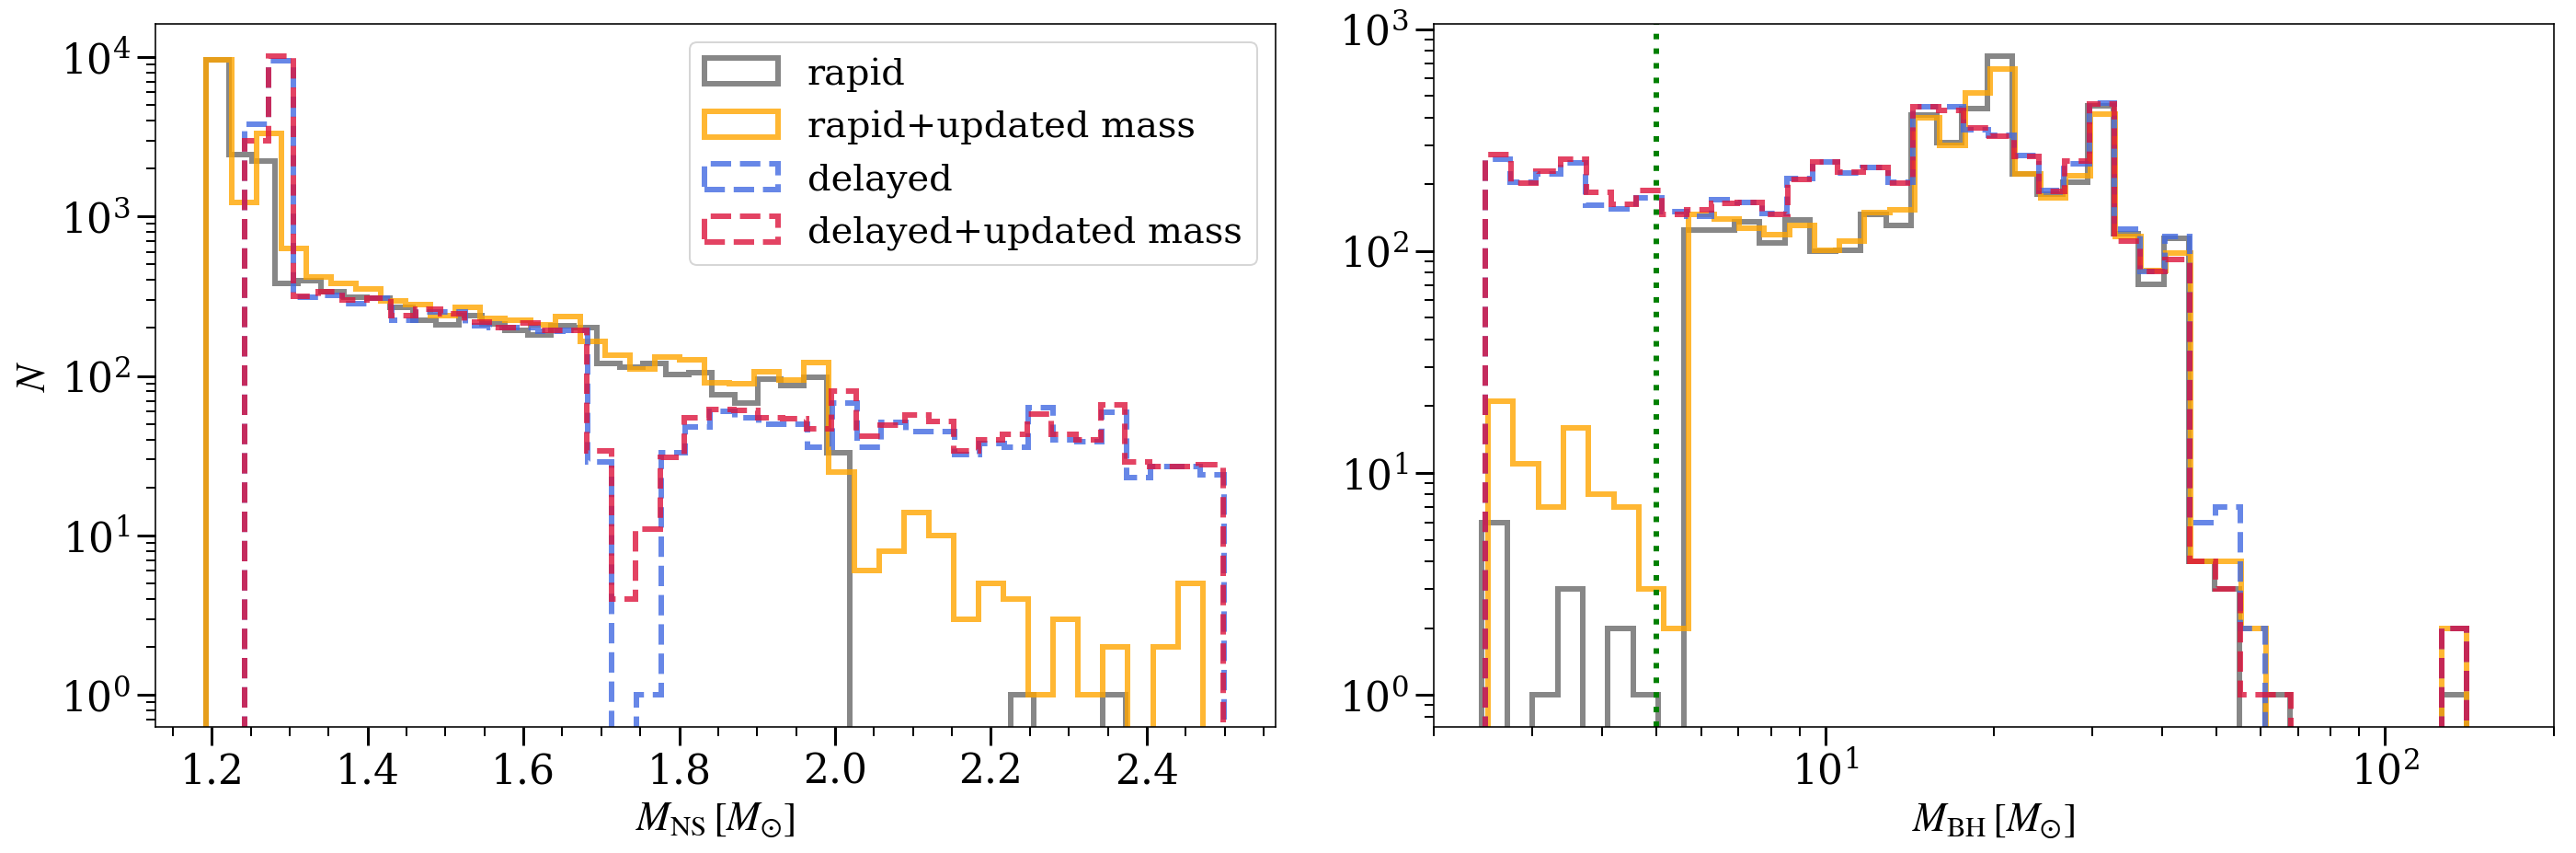

In [17]:
##The masses of all BHs and NSs ever formed in the models
all_mbh = [[],[],[],[]]; all_mns = [[],[],[],[]]
bh_kicks = [[],[],[],[]]; ns_kicks = [[],[],[],[]]
for xx in range(len(paths)-4):
    bhformation = np.genfromtxt(paths[xx]+'initial.bhformation.dat', usecols = (0,3,5,6,8))
    nsformation = np.genfromtxt(paths[xx]+'initial.nsformation.dat', usecols = (0,3,6,7,9))
    mbh = bhformation[:,3]; kickbh = bhformation[:,4]; idbh = bhformation[:,1]; tbh = bhformation[:,0]
    mns = nsformation[:,3]; kickns = nsformation[:,4]; idns = nsformation[:,1]; tns = nsformation[:,0]
    
    bh_kicks[int(model_type[xx])-1] = bh_kicks[int(model_type[xx])-1] + list(kickbh[mbh<=5.])
    ns_kicks[int(model_type[xx])-1] = ns_kicks[int(model_type[xx])-1] + list(kickns[mns>=2.])
    
    all_mbh[int(model_type[xx])-1] = all_mbh[int(model_type[xx])-1]+list(mbh)
    all_mns[int(model_type[xx])-1] = all_mns[int(model_type[xx])-1]+list(mns)
    
    if model_type[xx]=='1':
        print(paths[xx], '\n bh', tbh[mbh<5.], idbh[mbh<5], mbh[mbh<5.])
        print('n_mass_gap', len(mbh[mbh<5.0]), len(mns[mns>2.]))
    if model_type[xx]=='3':
        print('n_mass_gap', len(mbh[mbh<5.0]), len(mns[mns>2.]))
    
N_mg_tot = []
for xx in range(len(paths)):
    bhformation = np.genfromtxt(paths[xx]+'initial.bhformation.dat', usecols = (0,3,5,6,8))
    nsformation = np.genfromtxt(paths[xx]+'initial.nsformation.dat', usecols = (0,3,6,7,9))
    mbh = bhformation[:,3]; kickbh = bhformation[:,4]; idbh = bhformation[:,1]; tbh = bhformation[:,0]
    mns = nsformation[:,3]; kickns = nsformation[:,4]; idns = nsformation[:,1]; tns = nsformation[:,0]
        
    N_mg_tot.append(len(mbh[(mbh<5.0) & (mbh>2.5)]))
    
print(N_mg_tot)
    
fig, axs = plt.subplots(ncols = 2, figsize=(20,7), sharey=False)
##['fiducial', 'wdmass', 'delay', 'delay+wdmass']
lss = ['-', '-', '--', '--']
cs = ['dimgray', 'orange', 'royalblue', 'crimson']
labels = ['rapid', 'rapid+updated mass', 'delayed', 'delayed+updated mass']
axs[1].axvline(x=5, ls = 'dotted', color='green', lw=3)
for yy in range(4):
    print(np.array(all_mbh[yy])[np.array(all_mbh[yy])>=100], np.max(all_mbh[yy]))
    axs[1].hist(all_mbh[yy], 
            bins=np.logspace(np.log10(np.min(all_mbh[yy])), np.log10(np.max(all_mbh[yy])+10), 40), 
            histtype='step', ls = lss[yy], lw=3, color = cs[yy], alpha=0.8,
            label = labels[yy])
axs[1].set_xlim(xmin=2, xmax=200)
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r'$M_{\rm{BH}}\,[M_{\odot}]$')


for yy in range(4):
    axs[0].hist(all_mns[yy], 
                bins = 40,
            #bins=np.logspace(np.log10(np.min(all_mns[yy])), np.log10(np.max(all_mns[yy])), 40), 
            histtype='step', ls = lss[yy], lw=3, color = cs[yy], alpha=0.8,
            label = labels[yy])
axs[0].set_yscale('log')
#axs[0].set_xscale('log')
axs[0].legend(loc='best', fontsize=20)
axs[0].set_xlabel(r'$M_{\rm{NS}}\,[M_{\odot}]$')
axs[0].set_ylabel(r'$N$')

#axs[0].tick_params('both',length=4,width=0.7,which='both',direction = 'out')
#axs[1].tick_params('both',length=4,width=0.7,which='both',direction = 'out')
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params('both', length=10, width=1.5, which='major')
axs[0].tick_params('both', length=5, width=1, which='minor')
#axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params('both', length=10, width=1.5, which='major')
axs[1].tick_params('both', length=5, width=1, which='minor')
fig.tight_layout()

#plt.savefig(savepath+'all_formed_bh_ns_masses.pdf', dpi=300)

bh_kicks_all = [item for sublist in bh_kicks for item in sublist]
ns_kicks_all = [item for sublist in ns_kicks for item in sublist]
print(np.min(bh_kicks_all), np.min(ns_kicks_all))
print(np.max(bh_kicks_all), np.max(ns_kicks_all))

In [14]:
##Calculating the number of lower-mass-gap objects 
##retained in the clusters from the delayed prescription
N_delayed2bh = []
for xx in range(len(paths)):
    print(paths[xx])
    
    t_conv = dyn.conv('t', paths[xx]+'initial.conv.sh')
    l_conv = dyn.conv('l', paths[xx]+'initial.conv.sh')
    m_conv = dyn.conv('m', paths[xx]+'initial.conv.sh')
    mstar = dyn.conv('mstar', paths[xx]+'initial.conv.sh')
    
    ##########################################################
    ###Option 1 to check which BHs are retained
    ###based on the estimated escaped velocities
    ##extract the escape velocities
    #v_esc = []; t_myr = []
    #f=open(paths[xx]+'initial.binint.log','r')
    #positions=scripts3.find_positions(f)
    #
    #for i in range(0, len(positions)-1):
    #    #print positions[i]
    #    binint=scripts3.read_segment(f,positions[i])
    #    v_esc.append(binint['status']['v_esc_cluster[km/s]'])
    #    t_myr.append(binint['type']['time']*t_conv)
    #   
    #v_esc = np.array(v_esc); t_myr = np.array(t_myr)
    #
    #binx = np.logspace(np.log10(np.min(t_myr)), np.log10(np.max(t_myr)), 25)
    ##print(binx, len(binx))
    #inds = np.digitize(t_myr, binx)
    #print(inds, len(inds[inds==1]), len(inds[inds==2]))
    #
    #vesc_mean = []; vesc_median = []
    #for ii in range(len(binx)-1):
    #    vesc_mean.append(np.mean(v_esc[inds==ii+1]))
    #    vesc_median.append(np.median(v_esc[inds==ii+1]))
    #print(vesc_mean, vesc_median, len(vesc_mean))
    
    #plt.figure(figsize=(10,8))
    #plt.scatter(t_myr, v_esc, s = 12, alpha=0.4, color = 'royalblue', rasterized = True) #edgecolors = 'lightcoral', facecolor = 'none
    ##binx = np.logspace(np.log10(min(t)), np.log10(max(t)), 100)
    ##biny = np.linspace(min(v_esc), max(v_esc), 100)
    ##counts, _, _ = np.histogram2d(t, v_esc, bins=(binx, biny))
    ##plt.pcolormesh(binx, biny, counts.T, cmap = 'jet')
    ##plt.xlim(4e-6, 20.)
    #plt.xscale('log')
    ##plt.yscale('log')
    #plt.xlabel(r'$t\,$(Gyr)')
    #plt.ylabel(r'$v_{esc}\,(\rm{km\,s^{-1}})$')
    
    
    ##########################################################
    ###Option 2 actually just check which one escaped
    idmg_esc = []; tmg_esc = []
    with open(paths[xx]+'initial.esc.dat', 'r') as fesc:
        next(fesc)
        for line in fesc:
            data = line.split()
            if int(data[14])==1:
                if int(data[22])==14 and float(data[15])<5.:
                    idmg_esc.append(int(data[17]))
                    tmg_esc.append(float(data[1]))
                if int(data[23])==14 and float(data[16])<5.:
                    idmg_esc.append(int(data[18]))
                    tmg_esc.append(float(data[1]))   
            else:
                if int(data[21])==14 and float(data[2])*mstar<5.:
                    idmg_esc.append(int(data[13]))
                    tmg_esc.append(float(data[1]))
    idmg_esc = np.array(idmg_esc); tmg_esc = np.array(tmg_esc)
    
    ##########################################################
    bh_merproduct = np.genfromtxt(paths[xx]+'bh_mergerproduct_all.dat')
    idm_bhmer = bh_merproduct[:,2].astype(np.int)
    t_bhmer = bh_merproduct[:,1]
    if bh_merproduct[:,7][0]!=14:
        print(xx, 'bh wtf')    
    idbh_from_mer = idm_bhmer[(bh_merproduct[:,8].astype(np.int)!=14) & (bh_merproduct[:,9].astype(np.int)!=14)]
    print(idbh_from_mer)
    
    bhformation = np.genfromtxt(paths[xx]+'initial.bhformation.dat', usecols = (0,3,5,6,8))
    nsformation = np.genfromtxt(paths[xx]+'initial.nsformation.dat', usecols = (0,3,6,7,9))
    mbh = bhformation[:,3]; kickbh = bhformation[:,4]; idbh = bhformation[:,1]; tbh = bhformation[:,0]
    mns = nsformation[:,3]; kickns = nsformation[:,4]; idns = nsformation[:,1]; tns = nsformation[:,0]
    
    kickmg_nodyn = kickbh[(idbh!=0) & (idbh<=840000) & (mbh<=5.)]
    tmg_nodyn = tbh[(idbh!=0) & (idbh<=840000) & (mbh<=5.)]
    mmg_nodyn = mbh[(idbh!=0) & (idbh<=840000) & (mbh<=5.)]
    idmg_nodyn = idbh[(idbh!=0) & (idbh<=840000) & (mbh<=5.)]
    #print(tmg_nodyn, kickmg_nodyn)
    
    #############################################
    ###Option 1
    #inds_mg = np.digitize(tmg_nodyn, binx)
    #mmg_retained = []; kickmg_retained = []; idmg_retained = []
    #for jj in range(len(kickmg_nodyn)):
    #    #print(vesc_mean[inds_mg[jj]-1])
    #    if kickmg_nodyn[jj]<vesc_mean[inds_mg[jj]-1] and idmg_nodyn[jj] not in idbh_from_mer:
    #        mmg_retained.append(mmg_nodyn[jj])
    #        kickmg_retained.append(kickmg_nodyn[jj])
    #        idmg_retained.append(idmg_nodyn[jj])
    #
    #print(len(mmg_retained), mmg_retained, kickmg_retained, idmg_retained)
    
    
    ##############################################
    ###Option 2
    mmg_retained = []; kickmg_retained = []; idmg_retained = []
    for jj in range(len(kickmg_nodyn)):
        #n_digit = str(tmg_esc[idmg_esc==idmg_nodyn[jj]])[::-1].find('.') doesn't really work
        if idmg_nodyn[jj] not in idbh_from_mer and (idmg_nodyn[jj] not in idmg_esc or 
                                                    tmg_nodyn[jj]*1.000001 < tmg_esc[idmg_esc==idmg_nodyn[jj]]):
            mmg_retained.append(mmg_nodyn[jj])
            kickmg_retained.append(kickmg_nodyn[jj])
            idmg_retained.append(idmg_nodyn[jj])
    
    print(len(mmg_retained), mmg_retained, kickmg_retained, idmg_retained)
    
    N_delayed2bh.append(len(mmg_retained))
    
print(N_delayed2bh)   


/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun/
[1055015  746490  924840  213870]
0 [] [] []
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun_delay/
[ 821962  903278  147883 1017225 1336622  720617  804896  438803  836490
  815750]
7 [4.94595, 4.87963, 4.28196, 3.838, 3.56346, 3.39871, 3.4504] [0.0, 49.4171, 68.7807, 112.279, 120.351, 52.03, 0.0] [482312.0, 576621.0, 648224.0, 108029.0, 60316.0, 780082.0, 827429.0]
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass/
[ 805215  821805  663195  273694  625420   14950  961298  647365 1231759
  220159  957622  719242  883228  529027  389382  710157  268074  708378
 1070639  955675 1452737   30020 1187803 1345427  935016  936916  7505

In [15]:
##Number of mass gap objects ejected over a Hubble time
N_mg_esc_tot = []
for xx in range(len(paths)):
    n_mg_esc = 0
    with open(paths[xx]+'initial.esc.dat', 'r') as fesc:
        next(fesc)
        for line in fesc:
            data = line.split()
            if int(data[14])==1:
                if int(data[22])==14 and float(data[15])>2.5 and float(data[15])<5.:
                    n_mg_esc+=1
                if int(data[23])==14 and float(data[16])>2.5 and float(data[16])<5.:
                    n_mg_esc+=1     
            else:
                if int(data[21])==14 and float(data[2])>2.5 and float(data[2])<5.:
                    n_mg_esc+=1
                    
    N_mg_esc_tot.append(n_mg_esc)
    
print(N_mg_esc_tot)

[5, 164, 27, 178, 10, 172, 37, 186, 11, 180, 32, 181, 210]


/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun_dynoff/ 
 bh [] [] []
n_mass_gap 0 1
n_mass_gap 476 218
[0, 467, 0, 468]
[] 43.8391
[] 43.8391
[] 43.8391
[] 43.8391


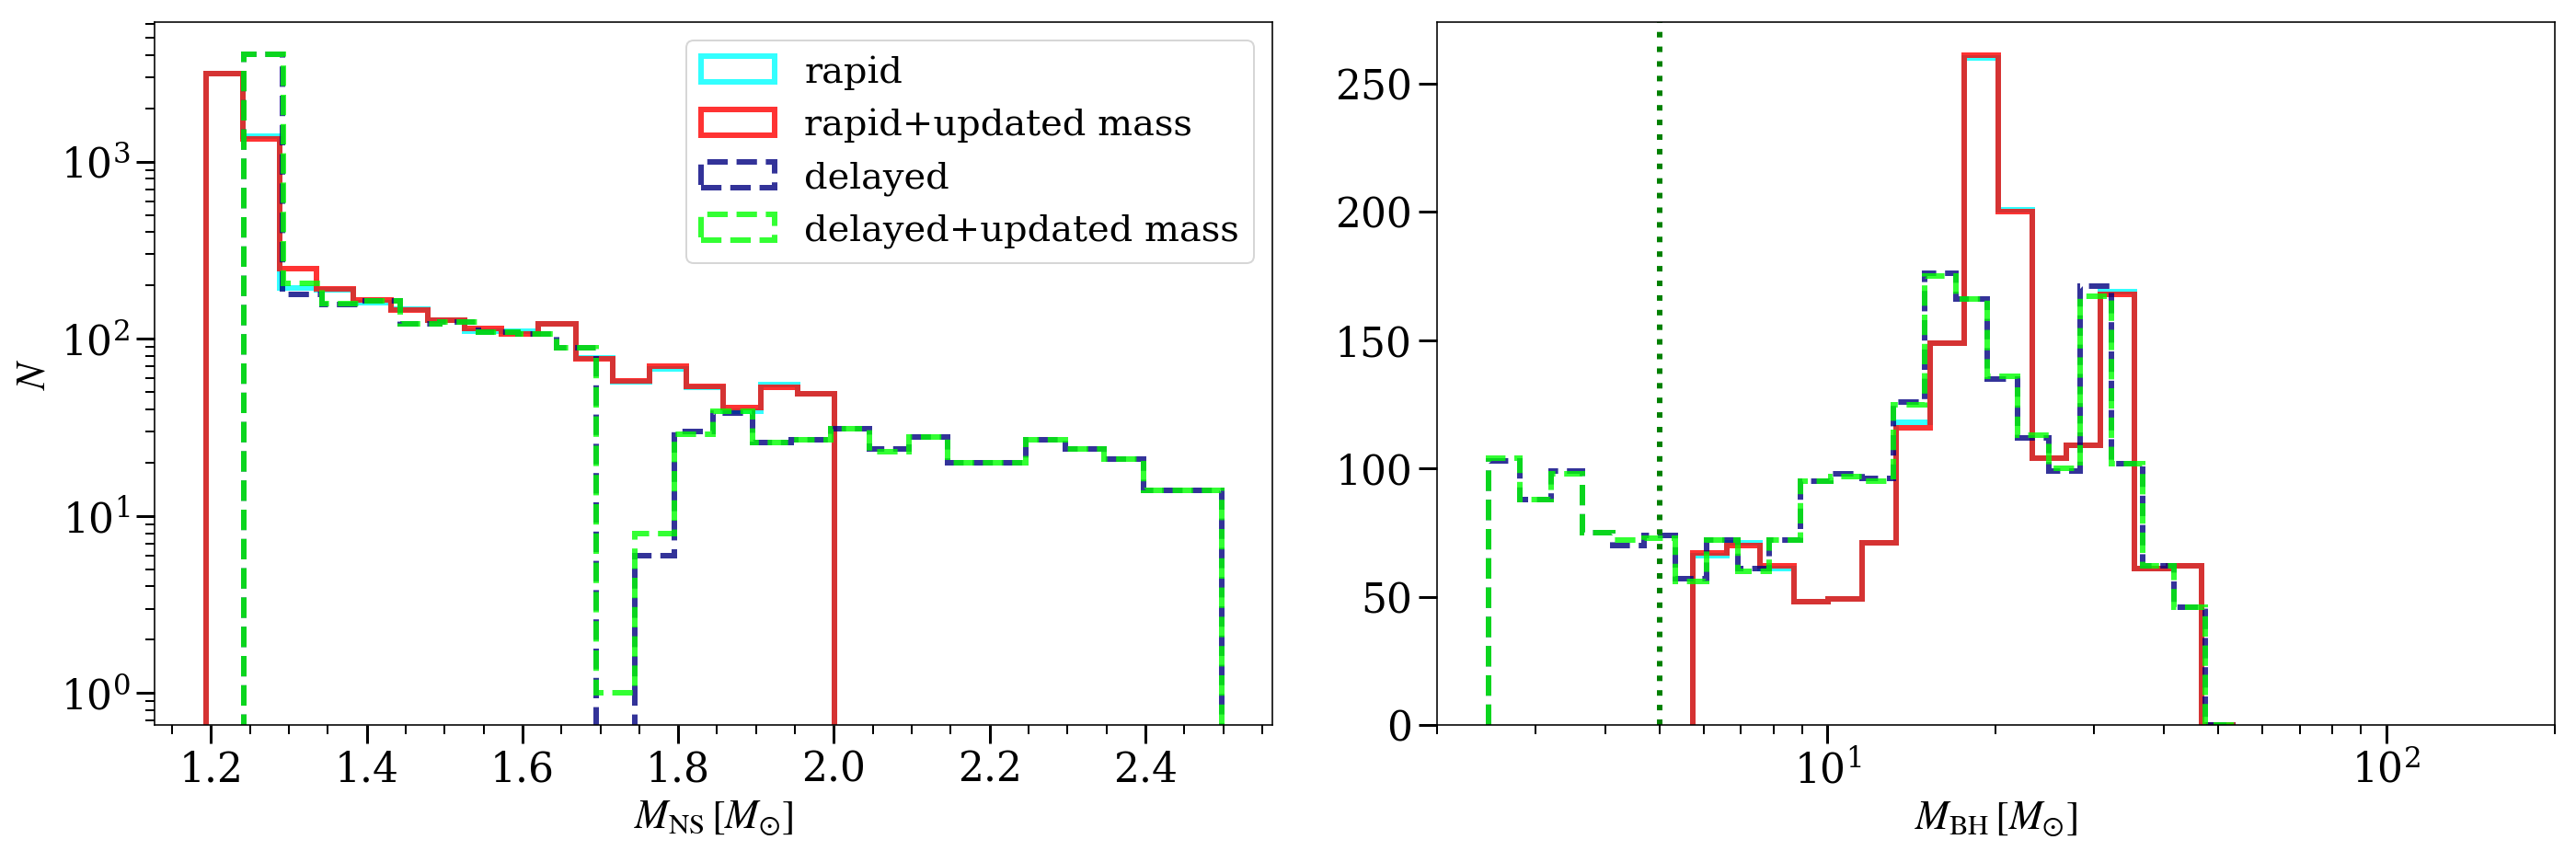

In [23]:
##The masses of all BHs and NSs ever formed in the models
##for clusters where the dynamics is completely turned off
paths_dynoff = ['/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun_dynoff/',
                '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun_delay_dynoff/',
                '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass_dynoff/',
                '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass_delay_dynoff/']
model_type_dynoff = ['1', '3', '2', '4']
all_mbh = [[],[],[],[]]; all_mns = [[],[],[],[]]
bh_kicks = [[],[],[],[]]; ns_kicks = [[],[],[],[]]
N_mg_tot = []
for xx in range(0,2):
    bhformation = np.genfromtxt(paths_dynoff[xx]+'initial.bhformation.dat', usecols = (0,3,5,6,8))
    nsformation = np.genfromtxt(paths_dynoff[xx]+'initial.nsformation.dat', usecols = (0,3,6,7,9))
    mbh = bhformation[:,3]; kickbh = bhformation[:,4]; idbh = bhformation[:,1]; tbh = bhformation[:,0]
    mns = nsformation[:,3]; kickns = nsformation[:,4]; idns = nsformation[:,1]; tns = nsformation[:,0]
    
    bh_kicks[int(model_type_dynoff[xx])-1] = bh_kicks[int(model_type_dynoff[xx])-1] + list(kickbh[mbh<=5.])
    ns_kicks[int(model_type_dynoff[xx])-1] = ns_kicks[int(model_type_dynoff[xx])-1] + list(kickns[mns>=2.])
    
    all_mbh[int(model_type_dynoff[xx])-1] = all_mbh[int(model_type_dynoff[xx])-1]+list(mbh)
    all_mns[int(model_type_dynoff[xx])-1] = all_mns[int(model_type_dynoff[xx])-1]+list(mns)
    
    if model_type_dynoff[xx]=='1':
        print(paths_dynoff[xx], '\n bh', tbh[mbh<5.], idbh[mbh<5], mbh[mbh<5.])
        print('n_mass_gap', len(mbh[mbh<5.0]), len(mns[mns>2.]))
    if model_type_dynoff[xx]=='3':
        print('n_mass_gap', len(mbh[mbh<5.0]), len(mns[mns>2.]))
        
    N_mg_tot.append(len(mbh[(mbh<5.0) & (mbh>2.5)]))
    
print(N_mg_tot)
    
fig, axs = plt.subplots(ncols = 2, figsize=(20,7), sharey=False)
##['fiducial', 'wdmass', 'delay', 'delay+wdmass']
lss = ['-', '-', '--', '--']
cs = ['cyan', 'red', 'navy', 'lime']
labels = ['rapid', 'rapid+updated mass', 'delayed', 'delayed+updated mass']
bin_size = [17, 17, 25, 25]
axs[1].axvline(x=5, ls = 'dotted', color='green', lw=3)
for yy in range(4):
    print(np.array(all_mbh[yy])[np.array(all_mbh[yy])>=100], np.max(all_mbh[yy]))
    axs[1].hist(all_mbh[yy], 
            bins=np.logspace(np.log10(np.min(all_mbh[yy])), np.log10(np.max(all_mbh[yy])+10), bin_size[yy]), 
            histtype='step', ls = lss[yy], lw=3, color = cs[yy], alpha=0.8,
            label = labels[yy])
axs[1].set_xlim(xmin=2, xmax=200)
#axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r'$M_{\rm{BH}}\,[M_{\odot}]$')


for yy in range(4):
    axs[0].hist(all_mns[yy], 
                bins = bin_size[yy],
            #bins=np.logspace(np.log10(np.min(all_mns[yy])), np.log10(np.max(all_mns[yy])), 40), 
            histtype='step', ls = lss[yy], lw=3, color = cs[yy], alpha=0.8,
            label = labels[yy])
axs[0].set_yscale('log')
#axs[0].set_xscale('log')
axs[0].legend(loc='best', fontsize=20)
axs[0].set_xlabel(r'$M_{\rm{NS}}\,[M_{\odot}]$')
axs[0].set_ylabel(r'$N$')

#axs[0].tick_params('both',length=4,width=0.7,which='both',direction = 'out')
#axs[1].tick_params('both',length=4,width=0.7,which='both',direction = 'out')
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params('both', length=10, width=1.5, which='major')
axs[0].tick_params('both', length=5, width=1, which='minor')
#axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params('both', length=10, width=1.5, which='major')
axs[1].tick_params('both', length=5, width=1, which='minor')
fig.tight_layout()

n_mass_gap 480 230
n_mass_gap 423 225
[472, 413]
[130.084] 130.084
[] 56.3367


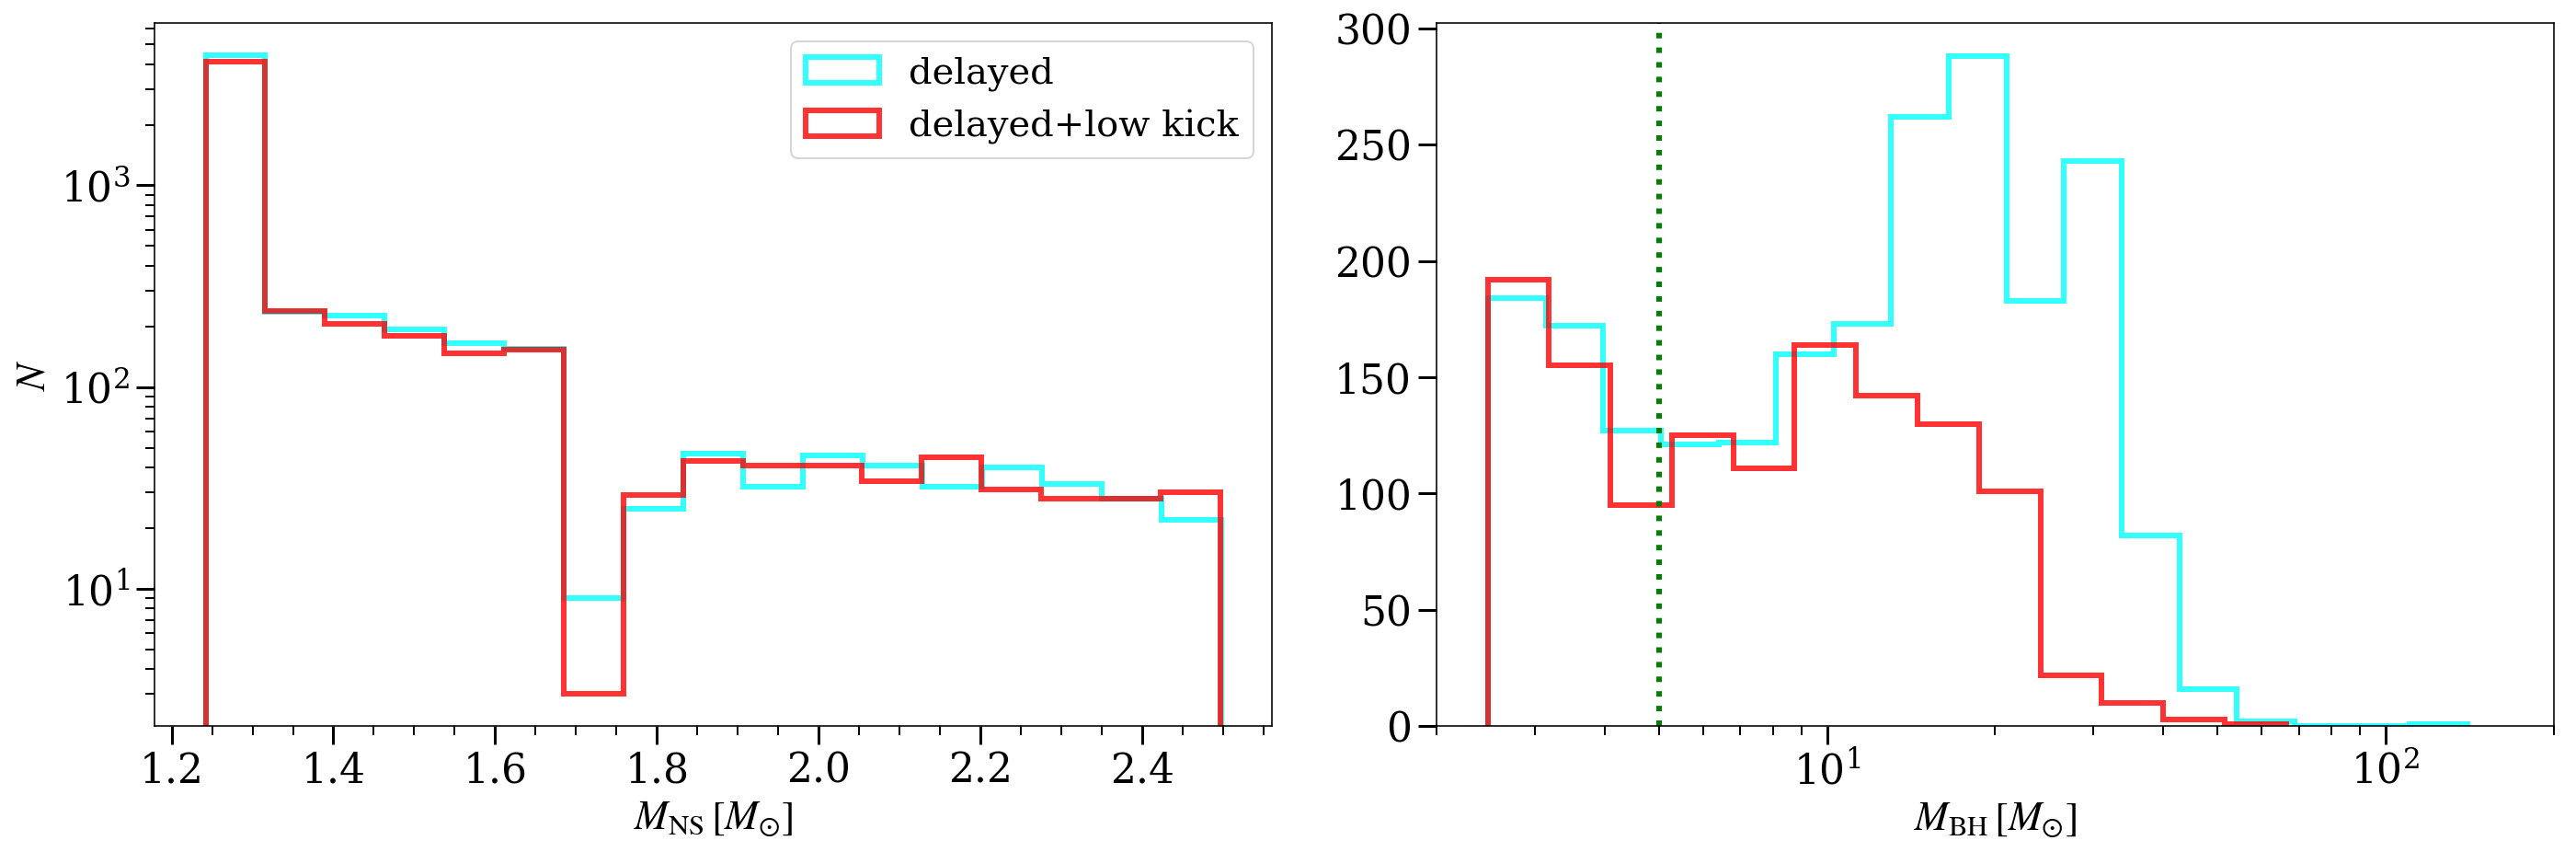

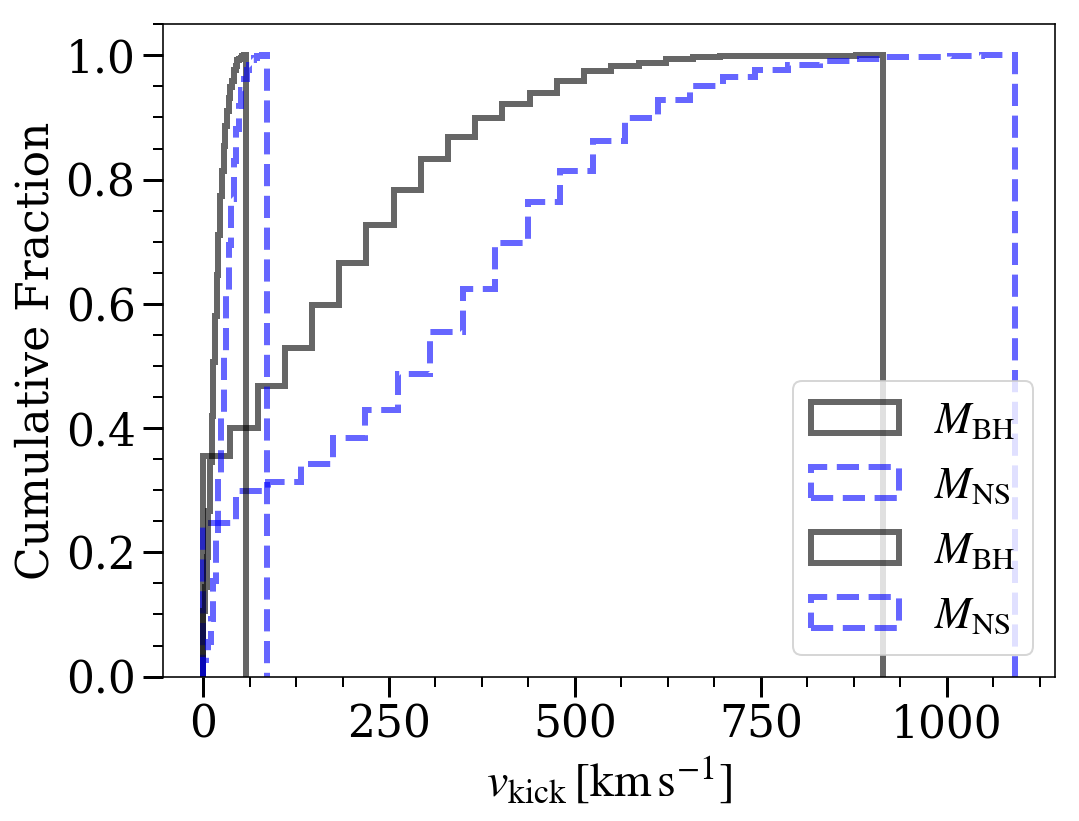

In [19]:
##The masses of all BHs and NSs ever formed in the models
##Comparing the low kick model
paths_lowkick = ['/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_nstde0.2_wdtc_wdmass_qcrit4_delay/', 
                 '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_nstde0.2_wdtc_wdmass_qcrit4_delay_lowkick_nobh/']
model_type_lowkick = ['5', '6']
all_mbh = [[],[]]; all_mns = [[],[]]
bh_kicks = [[],[]]; ns_kicks = [[],[]]
N_mg_tot = []
for xx in range(len(paths_lowkick)):
    bhformation = np.genfromtxt(paths_lowkick[xx]+'initial.bhformation.dat', usecols = (0,3,5,6,8))
    nsformation = np.genfromtxt(paths_lowkick[xx]+'initial.nsformation.dat', usecols = (0,3,6,7,9))
    mbh = bhformation[:,3]; kickbh = bhformation[:,4]; idbh = bhformation[:,1]; tbh = bhformation[:,0]
    mns = nsformation[:,3]; kickns = nsformation[:,4]; idns = nsformation[:,1]; tns = nsformation[:,0]
    
    bh_kicks[int(model_type_lowkick[xx])-5] = bh_kicks[int(model_type_lowkick[xx])-5] + list(kickbh)
    ns_kicks[int(model_type_lowkick[xx])-5] = ns_kicks[int(model_type_lowkick[xx])-5] + list(kickns)
    
    all_mbh[int(model_type_lowkick[xx])-5] = all_mbh[int(model_type_lowkick[xx])-5]+list(mbh)
    all_mns[int(model_type_lowkick[xx])-5] = all_mns[int(model_type_lowkick[xx])-5]+list(mns)
    
    if model_type_lowkick[xx]=='5':
        #print(paths_lowkick[xx], '\n bh', tbh[mbh<5.], idbh[mbh<5], mbh[mbh<5.])
        print('n_mass_gap', len(mbh[mbh<5.0]), len(mns[mns>2.]))
    if model_type_lowkick[xx]=='6':
        print('n_mass_gap', len(mbh[mbh<5.0]), len(mns[mns>2.]))
        
    N_mg_tot.append(len(mbh[(mbh<5.0) & (mbh>2.5)]))
    
print(N_mg_tot)
    
fig, axs = plt.subplots(ncols = 2, figsize=(20,7), sharey=False)
##['fiducial', 'wdmass', 'delay', 'delay+wdmass']
lss = ['-', '-', '--', '--']
cs = ['cyan', 'red', 'navy', 'lime']
labels = ['delayed', 'delayed+low kick']
bin_size = [17, 17]
bin_size_bh = [18, 14]
axs[1].axvline(x=5, ls = 'dotted', color='green', lw=3)
for yy in range(2):
    print(np.array(all_mbh[yy])[np.array(all_mbh[yy])>=100], np.max(all_mbh[yy]))
    axs[1].hist(all_mbh[yy], 
            bins=np.logspace(np.log10(np.min(all_mbh[yy])), np.log10(np.max(all_mbh[yy])+10), bin_size_bh[yy]), 
            histtype='step', ls = lss[yy], lw=3, color = cs[yy], alpha=0.8,
            label = labels[yy])
axs[1].set_xlim(xmin=2, xmax=200)
#axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r'$M_{\rm{BH}}\,[M_{\odot}]$')


for yy in range(2):
    axs[0].hist(all_mns[yy], 
                bins = bin_size[yy],
            #bins=np.logspace(np.log10(np.min(all_mns[yy])), np.log10(np.max(all_mns[yy])), 40), 
            histtype='step', ls = lss[yy], lw=3, color = cs[yy], alpha=0.8,
            label = labels[yy])
axs[0].set_yscale('log')
#axs[0].set_xscale('log')
axs[0].legend(loc='best', fontsize=20)
axs[0].set_xlabel(r'$M_{\rm{NS}}\,[M_{\odot}]$')
axs[0].set_ylabel(r'$N$')

#axs[0].tick_params('both',length=4,width=0.7,which='both',direction = 'out')
#axs[1].tick_params('both',length=4,width=0.7,which='both',direction = 'out')
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params('both', length=10, width=1.5, which='major')
axs[0].tick_params('both', length=5, width=1, which='minor')
#axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params('both', length=10, width=1.5, which='major')
axs[1].tick_params('both', length=5, width=1, which='minor')
fig.tight_layout()

fig, ax = plt.subplots(figsize=(8,6))
for zz in range(2):
    ax.hist(bh_kicks[zz], bins=25,
            cumulative=True, density=True,
            lw=3, histtype='step', color = 'k', alpha=0.6, label=r'$M_{\rm BH}$')
    ax.hist(ns_kicks[zz], bins=25, 
            cumulative=True, density=True,
            lw=3, histtype='step', color = 'blue', ls='--', alpha=0.6, label=r'$M_{\rm NS}$')
#axs[0].set_xlim(xmax = np.max(ns_kicks_all))
ax.set_xlabel(r'$v_{\rm{kick}}\,[\rm{km\,s^{-1}}]$', fontsize=24)
ax.set_ylabel('Cumulative Fraction')
ax.legend(loc='lower right')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params('both', length=10, width=1.5, which='major')
ax.tick_params('both', length=5, width=1, which='minor')

bh 12.12367808292
ns 11968.81242552
bh 12.02176239644
ns 11952.969881680001
bh 12.00868534692
ns 11958.04197912
bh 12.02849932416
ns 11951.840874360001
bh 12.0382750564
ns 11966.56858252
bh 11.9913264376
ns 11953.89711184
bh 11.951894861560001
ns 11951.894861560002
bh 11.95315951172
ns 11953.15951172
bh 11.987143104440001
ns 11987.143104440001
bh 11.95966024544
ns 11955.38513404
bh 11.9818078194
ns 11953.8222046
bh 12.11544773428
ns 11967.34127432
2843 15 2858
0 []
2834 39 2873
1 [6.55935005 5.95760084]
3002 7 3009
2 [15.44198034]
2815 21 2836
3 [7.04868477 7.00148995]


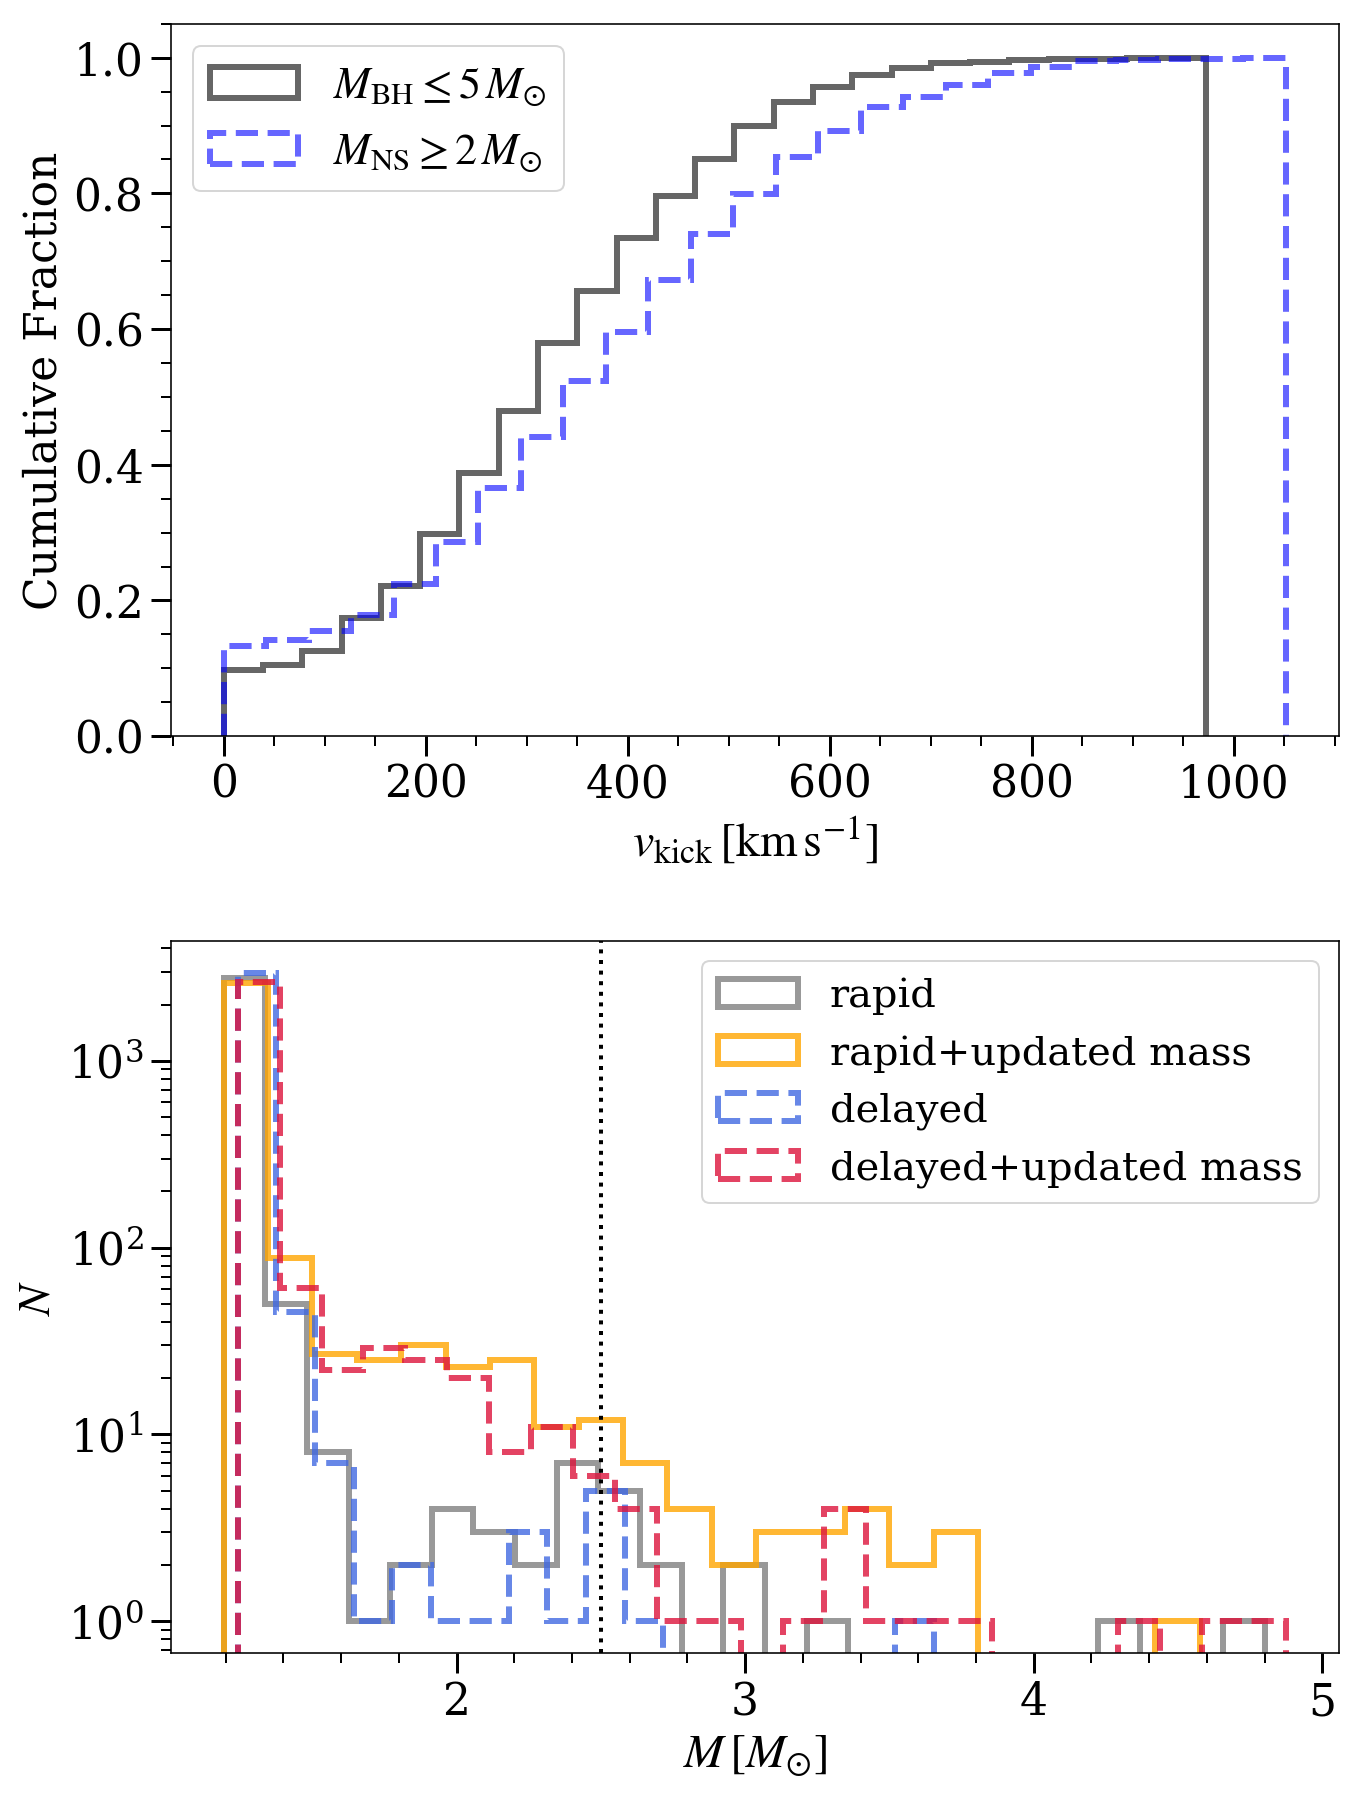

In [20]:
##Black hole and neutron star mass at late times (13 Gyr here)
M_bh = [[],[],[],[]]; M_ns = [[],[],[],[]]
for xx in range(len(paths)-4):
    snapt_float, snaptime_sort = bh_snaps(paths[xx])
    
    t_conv = dyn.conv('t', paths[xx]+'initial.conv.sh')
    
    for yy in range(len(snaptime_sort)):
        if float(snaptime_sort[yy])*t_conv>=11950.:
            bh_h5 = cmct.Snapshot(fname=paths[xx]+'initial.blackhole.snapshots.h5', 
                                    snapshot_name='/t='+snaptime_sort[yy], 
                                    conv=paths[xx]+'initial.conv.sh', 
                                    dist=4.125, # distance to cluster in kpc
                                    z=0.0002)
            print('bh', bh_h5.age)
            binflag = np.array(bh_h5.data['binflag'])
            m = np.array(bh_h5.data['m_MSUN'])[binflag!=1]
            k0 = np.array(bh_h5.data['bin_startype0'])[binflag==1]; k1 = np.array(bh_h5.data['bin_startype1'])[binflag==1]
            m0 = np.array(bh_h5.data['m0_MSUN'])[binflag==1]; m1 = np.array(bh_h5.data['m1_MSUN'])[binflag==1]
            
            M_bh[int(model_type[xx])-1] = M_bh[int(model_type[xx])-1]+list(m)
            for zz in range(len(k0)):
                if k0[zz]==14:
                    M_bh[int(model_type[xx])-1].append(m0[zz])
                if k1[zz]==14:
                    M_bh[int(model_type[xx])-1].append(m1[zz])
                        
            break

    t_old = 14000.
    with open(paths[xx]+'initial.morepulsars.dat', 'r') as fpsr:
        next(fpsr)
        for line in fpsr:
            datapsr = line.split()
            if float(datapsr[1])*t_conv > t_old:
                break
            if float(datapsr[1])*t_conv>=11950.:
                
                if int(datapsr[2])!=1:
                    M_ns[int(model_type[xx])-1].append(float(datapsr[5]))
                else:
                    if int(datapsr[11])==13:
                        M_ns[int(model_type[xx])-1].append(float(datapsr[5]))
                    if int(datapsr[12])==13:
                        M_ns[int(model_type[xx])-1].append(float(datapsr[6]))
                
                t_old = float(datapsr[1])*t_conv
    print('ns', t_old)

#print(M_bh)
#print(M_ns)               

fig, axs = plt.subplots(nrows=2, figsize=(10,13))
lss = ['-', '-', '--', '--']
cs = ['gray', 'orange', 'royalblue', 'crimson']
labels = ['rapid', 'rapid+updated mass', 'delayed', 'delayed+updated mass']
bin_no = [25,22,18,25]

#axs.axvline(x=5, ls = 'dotted', color='green', lw=2)
axs[1].axvline(x=2.5, ls = 'dotted', color='k', lw=2)
for ii in range(4):
    print(len(M_ns[ii]), len(M_bh[ii]), len(M_ns[ii]+M_bh[ii]))
    print(ii, np.array(M_ns[ii]+M_bh[ii])[np.array(M_ns[ii]+M_bh[ii])>5])
    axs[1].hist(np.array(M_ns[ii]+M_bh[ii])[np.array(M_ns[ii]+M_bh[ii])<=5.],
             bins=bin_no[ii],
            #bins=np.logspace(np.log10(np.min(M_ns[ii]+M_bh[ii])), np.log10(np.max(M_ns[ii]+M_bh[ii])), 20), 
            histtype='step', ls = lss[ii], lw=3, color = cs[ii], alpha=0.8,
            label = labels[ii])
    
    #axs.hist(M_bh[ii], 
    #            bins=10,
    #        #bins=np.logspace(np.log10(np.min(M_bh[ii])), np.log10(np.max(M_bh[ii])+10), 20), 
    #        histtype='step', ls = lss[ii], lw=3, color = cs[ii], alpha=0.8,
    #        label = labels[ii])

#axs.set_xscale('log')
axs[1].set_yscale('log')
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params('both', length=10, width=1.5, which='major')
axs[1].tick_params('both', length=5, width=1, which='minor')
axs[1].set_xlabel(r'$M\,[M_{\odot}]$', fontsize=24)
axs[1].set_ylabel(r'$N$', fontsize=23)
axs[1].legend(loc='upper right', fontsize=20)
#plt.savefig(savepath+'Mbh_ns_all_12Gyr.pdf', dpi=300)


axs[0].hist(bh_kicks_all, bins=25,
        cumulative=True, density=True,
        lw=3, histtype='step', color = 'k', alpha=0.6, label=r'$M_{\rm BH} \leq 5\,M_{\odot}$')
axs[0].hist(ns_kicks_all, bins=25, 
        cumulative=True, density=True,
        lw=3, histtype='step', color = 'blue', ls='--', alpha=0.6, label=r'$M_{\rm NS} \geq 2\,M_{\odot}$')
#axs[0].set_xlim(xmax = np.max(ns_kicks_all))
axs[0].set_xlabel(r'$v_{\rm{kick}}\,[\rm{km\,s^{-1}}]$', fontsize=24)
axs[0].set_ylabel('Cumulative Fraction')
axs[0].legend(loc='upper left')
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params('both', length=10, width=1.5, which='major')
axs[0].tick_params('both', length=5, width=1, which='minor')
    
fig.tight_layout()

#plt.savefig(savepath+'mass_gap_kicks_Mbhns_12Gyr.pdf', dpi=300)


In [25]:
###Present-day DNS and NSBH binaries
###Including the ones that merge within a Hubble time

co_type = ['DNS', 'NSBH', 'NSWD']

M0 = []; M1 = []
sma = []; ecc = []
B0 = []; B1 = []
spin0 = []; spin1 = []
btype = []; types_model = []
id_bin1 = []; id_bin2 = []
msp_flag1 = []; msp_flag2 = []

tll = [11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 10000, 10000]
tul = [14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 13000, 13000]

for xx in range(len(paths)-3):
    n_step = 0
    n1313 = 0
    n1314 = 0
    
    t_conv = dyn.conv('t', paths[xx]+'initial.conv.sh')
    
    t_old = 14000.
    with open(paths[xx]+'initial.morepulsars.dat', 'r') as fpsr:
        next(fpsr)
        for line in fpsr:
            datapsr = line.split()
            if float(datapsr[1])*t_conv > tul[xx]:
                break
            if float(datapsr[1])*t_conv < tll[xx]:
                continue
            
            if float(datapsr[1])*t_conv > t_old:
                n_step+=1
                
            if int(datapsr[2])==1:
                ##########DNS##########
                if int(datapsr[11])==13 and int(datapsr[12])==13:
                    n1313+=1
                    
                    ###This exclude the ones that merge in a Hubble time###
                    #if int(datapsr[3]) in id_all0[0][xx] and id_all1[0][xx][id_all0[0][xx].index(int(datapsr[3]))]==int(datapsr[4]):
                    ###id_all1 and id_all2 are the IDs of the compact object mergers
                    #    continue
                       
                    #if int(datapsr[4]) in id_all0[0][xx] and id_all1[0][xx][id_all0[0][xx].index(int(datapsr[4]))]==int(datapsr[3]):
                    #    continue
                    
                    if float(datapsr[5]) > float(datapsr[6]):
                        M0.append(float(datapsr[5])); M1.append(float(datapsr[6]))
                        btype.append(co_type[0]); types_model.append(model_type[xx])
                        sma.append(float(datapsr[13])); ecc.append(float(datapsr[14]))
                        B0.append(float(datapsr[7])); B1.append(float(datapsr[8]))
                        spin0.append(float(datapsr[9])); spin1.append(float(datapsr[10]))
                        id_bin1.append(int(datapsr[3])); id_bin2.append(int(datapsr[4]))
                        
                        if float(datapsr[7])>=(float(datapsr[9])**2)*(0.17*10**12) and float(datapsr[9])<=0.03:
                            msp_flag1.append(1)
                        else:
                            msp_flag1.append(0)
                            
                        if float(datapsr[8])>=(float(datapsr[10])**2)*(0.17*10**12) and float(datapsr[10])<=0.03:
                            msp_flag2.append(1)
                        else:
                            msp_flag2.append(0)

                        
                    else:
                        M0.append(float(datapsr[6])); M1.append(float(datapsr[5]))
                        btype.append(co_type[0]); types_model.append(model_type[xx])
                        sma.append(float(datapsr[13])); ecc.append(float(datapsr[14]))
                        B0.append(float(datapsr[8])); B1.append(float(datapsr[7]))
                        spin0.append(float(datapsr[10])); spin1.append(float(datapsr[9]))
                        id_bin1.append(int(datapsr[4])); id_bin2.append(int(datapsr[3]))
                        
                        if float(datapsr[8])>=(float(datapsr[10])**2)*(0.17*10**12) and float(datapsr[10])<=0.03:
                            msp_flag1.append(1)
                        else:
                            msp_flag1.append(0)
                            
                        if float(datapsr[7])>=(float(datapsr[9])**2)*(0.17*10**12) and float(datapsr[9])<=0.03:
                            msp_flag2.append(1)
                        else:
                            msp_flag2.append(0)
                            
                ##########NSBH##########  
                if int(datapsr[11])==14 and int(datapsr[12])==13:
                    n1314+=1
                    
                    ###This exclude the ones that merge in a Hubble time###
                    #if int(datapsr[3]) in id_all0[1][xx] and id_all1[1][xx][id_all0[1][xx].index(int(datapsr[3]))]==int(datapsr[4]):
                    #    continue
                       
                    #if int(datapsr[4]) in id_all0[1][xx] and id_all1[1][xx][id_all0[1][xx].index(int(datapsr[4]))]==int(datapsr[3]):
                    #    continue
                        
                    M0.append(float(datapsr[5])); M1.append(float(datapsr[6]))
                    btype.append(co_type[1]); types_model.append(model_type[xx])
                    sma.append(float(datapsr[13])); ecc.append(float(datapsr[14]))
                    B0.append(float(datapsr[7])); B1.append(float(datapsr[8]))
                    spin0.append(float(datapsr[9])); spin1.append(float(datapsr[10]))
                    id_bin1.append(int(datapsr[3])); id_bin2.append(int(datapsr[4]))
                    
                    if float(datapsr[8])>=(float(datapsr[10])**2)*(0.17*10**12) and float(datapsr[10])<=0.03:
                        msp_flag2.append(1)
                    else:
                        msp_flag2.append(0)
                        
                    msp_flag1.append(-100)
                        
                if int(datapsr[11])==13 and int(datapsr[12])==14:
                    #if int(datapsr[3]) in id_all0[1][xx] and id_all1[1][xx][id_all0[1][xx].index(int(datapsr[3]))]==int(datapsr[4]):
                    #    continue
                       
                    #if int(datapsr[4]) in id_all0[1][xx] and id_all1[1][xx][id_all0[1][xx].index(int(datapsr[4]))]==int(datapsr[3]):
                    #    continue
                        
                    M0.append(float(datapsr[6])); M1.append(float(datapsr[5]))
                    btype.append(co_type[1]); types_model.append(model_type[xx])
                    sma.append(float(datapsr[13])); ecc.append(float(datapsr[14]))
                    B0.append(float(datapsr[8])); B1.append(float(datapsr[7]))
                    spin0.append(float(datapsr[10])); spin1.append(float(datapsr[9]))
                    id_bin1.append(int(datapsr[4])); id_bin2.append(int(datapsr[3]))
                    
                    if float(datapsr[7])>=(float(datapsr[9])**2)*(0.17*10**12) and float(datapsr[9])<=0.03:
                        msp_flag1.append(1)
                    else:
                        msp_flag1.append(0)
                        
                    msp_flag2.append(-100)
                    
                ##########NSWD##########
                #if int(datapsr[11])==13 and 11<=int(datapsr[12])<=12:
                #    if float(datapsr[6])<1.:  ##Only take the massive WDs
                #        continue
                #    
                #    ###This exclude the ones that merge in a Hubble time###
                #    #if int(datapsr[3]) in id_all0[1][xx] and id_all1[1][xx][id_all0[1][xx].index(int(datapsr[3]))]==int(datapsr[4]):
                #    #    continue
                #       
                #    #if int(datapsr[4]) in id_all0[1][xx] and id_all1[1][xx][id_all0[1][xx].index(int(datapsr[4]))]==int(datapsr[3]):
                #    #    continue
                #        
                #    M0.append(float(datapsr[5])); M1.append(float(datapsr[6]))
                #    btype.append(co_type[2]); types_model.append(model_type[xx])
                #    sma.append(float(datapsr[13])); ecc.append(float(datapsr[14]))
                #    B0.append(float(datapsr[7])); B1.append(float(datapsr[8]))
                #    spin0.append(float(datapsr[9])); spin1.append(float(datapsr[10]))
                #    id_bin1.append(int(datapsr[3])); id_bin2.append(int(datapsr[4]))
                #    
                #    if float(datapsr[7])>=(float(datapsr[9])**2)*(0.17*10**12) and float(datapsr[9])<=0.03:
                #        msp_flag1.append(1)
                #    else:
                #        msp_flag1.append(0)
                #        
                #    msp_flag2.append(-100)
                #        
                #if 11<=int(datapsr[11])<=12 and int(datapsr[12])==13:
                #    if float(datapsr[5])<1.:
                #        continue
                #        
                #    #if int(datapsr[3]) in id_all0[1][xx] and id_all1[1][xx][id_all0[1][xx].index(int(datapsr[3]))]==int(datapsr[4]):
                #    #    continue
                #       
                #    #if int(datapsr[4]) in id_all0[1][xx] and id_all1[1][xx][id_all0[1][xx].index(int(datapsr[4]))]==int(datapsr[3]):
                #    #    continue
                #        
                #    M0.append(float(datapsr[6])); M1.append(float(datapsr[5]))
                #    btype.append(co_type[2]); types_model.append(model_type[xx])
                #    sma.append(float(datapsr[13])); ecc.append(float(datapsr[14]))
                #    B0.append(float(datapsr[8])); B1.append(float(datapsr[7]))
                #    spin0.append(float(datapsr[10])); spin1.append(float(datapsr[9]))
                #    id_bin1.append(int(datapsr[4])); id_bin2.append(int(datapsr[3]))
                #    
                #    if float(datapsr[8])>=(float(datapsr[10])**2)*(0.17*10**12) and float(datapsr[10])<=0.03:
                #        msp_flag2.append(1)
                #    else:
                #        msp_flag2.append(0)
                #        
                #    msp_flag1.append(-100)
            ##################################
            
            t_old = float(datapsr[1])*t_conv
            
    print(n_step)
    print('# of DNS', n1313/n_step, n1314/n_step)
    
    
                    
M0 = np.array(M0); M1 = np.array(M1)
types_model = np.array(types_model)
sma = np.array(sma); ecc = np.array(ecc)
msp_flag1 = np.array(msp_flag1); msp_flag2 = np.array(msp_flag2)
print(len(M0), len(M0[(types_model=='1') | (types_model=='3')]), len(M0[(types_model=='2') | (types_model=='4')]),
     len(M0[types_model=='5']))

144
# of DNS 0.6458333333333334 0.020833333333333332
381
# of DNS 1.6246719160104988 0.2545931758530184
168
# of DNS 3.380952380952381 0.30952380952380953
227
# of DNS 0.43612334801762115 0.19383259911894274
166
# of DNS 1.5240963855421688 0.024096385542168676
166
# of DNS 0.9578313253012049 0.024096385542168676
156
# of DNS 0.4807692307692308 0.11538461538461539
172
# of DNS 2.122093023255814 0.4011627906976744
113
# of DNS 1.0707964601769913 0.1592920353982301
248
# of DNS 1.2701612903225807 0.07661290322580645
180
# of DNS 1.9277777777777778 0.42777777777777776
188
# of DNS 1.622340425531915 0.18617021276595744
4214 1836 2378 0


['1' '1' '1' ... '4' '4' '4']
22.761031


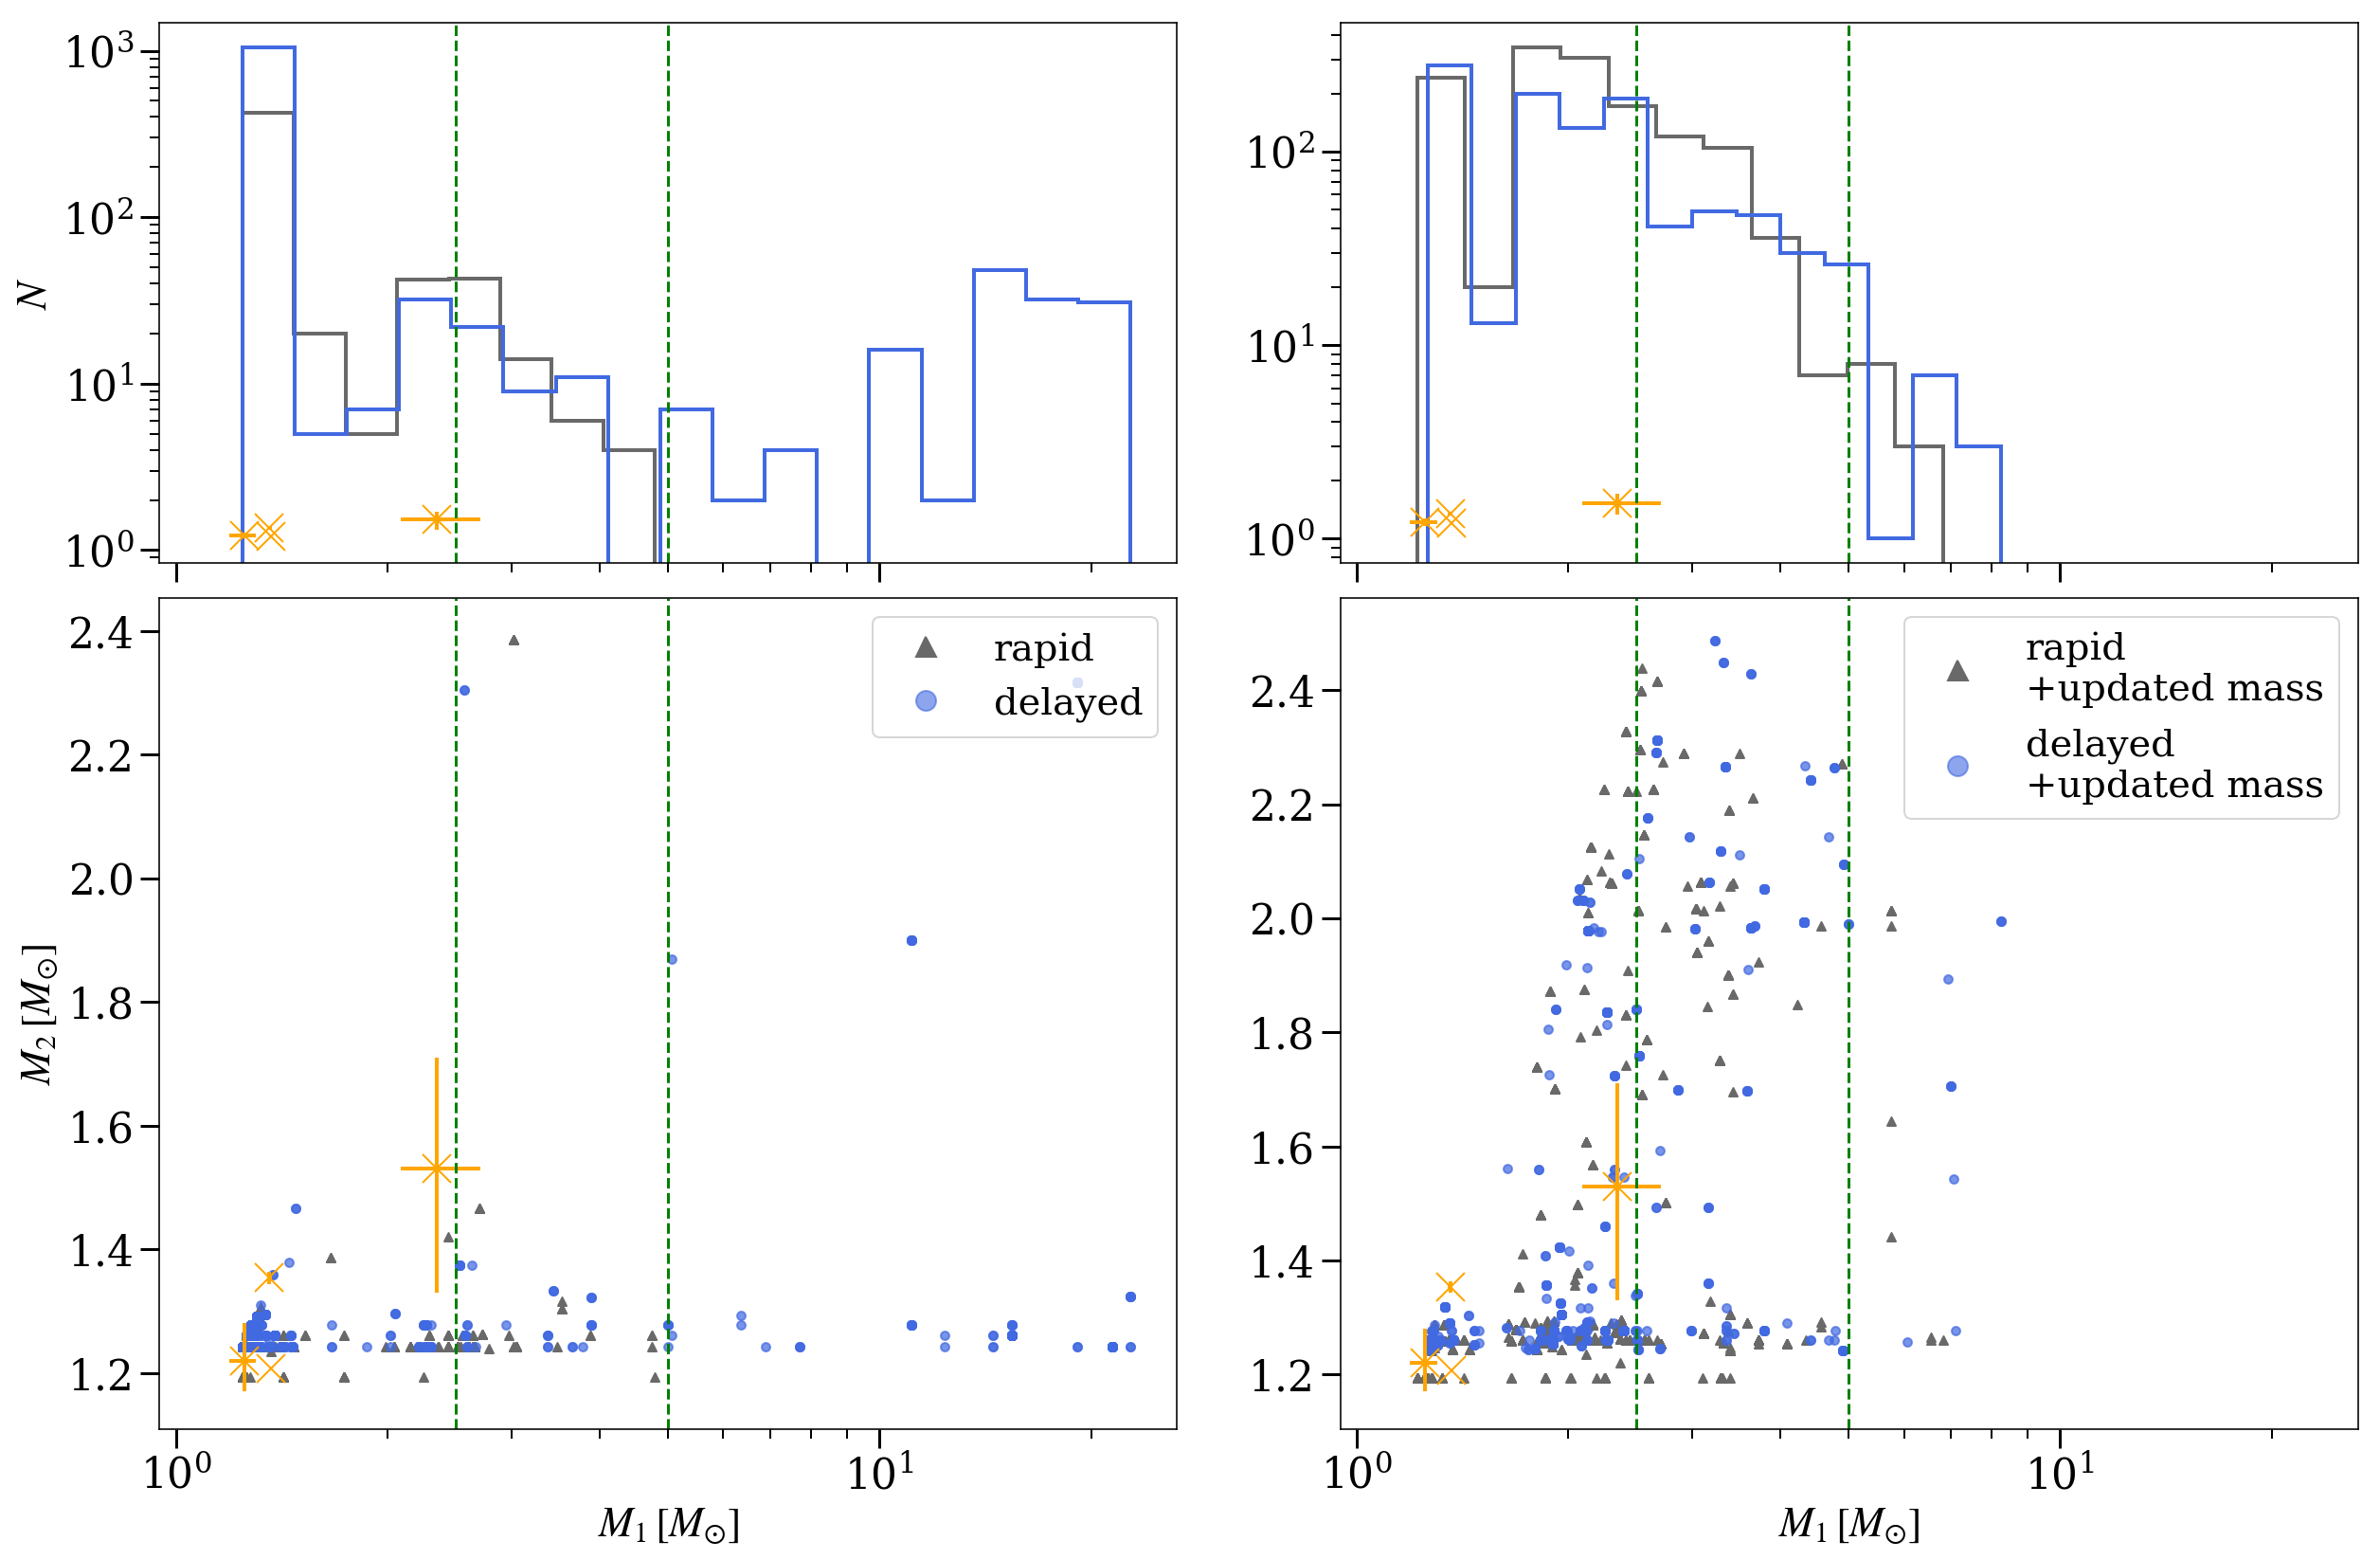

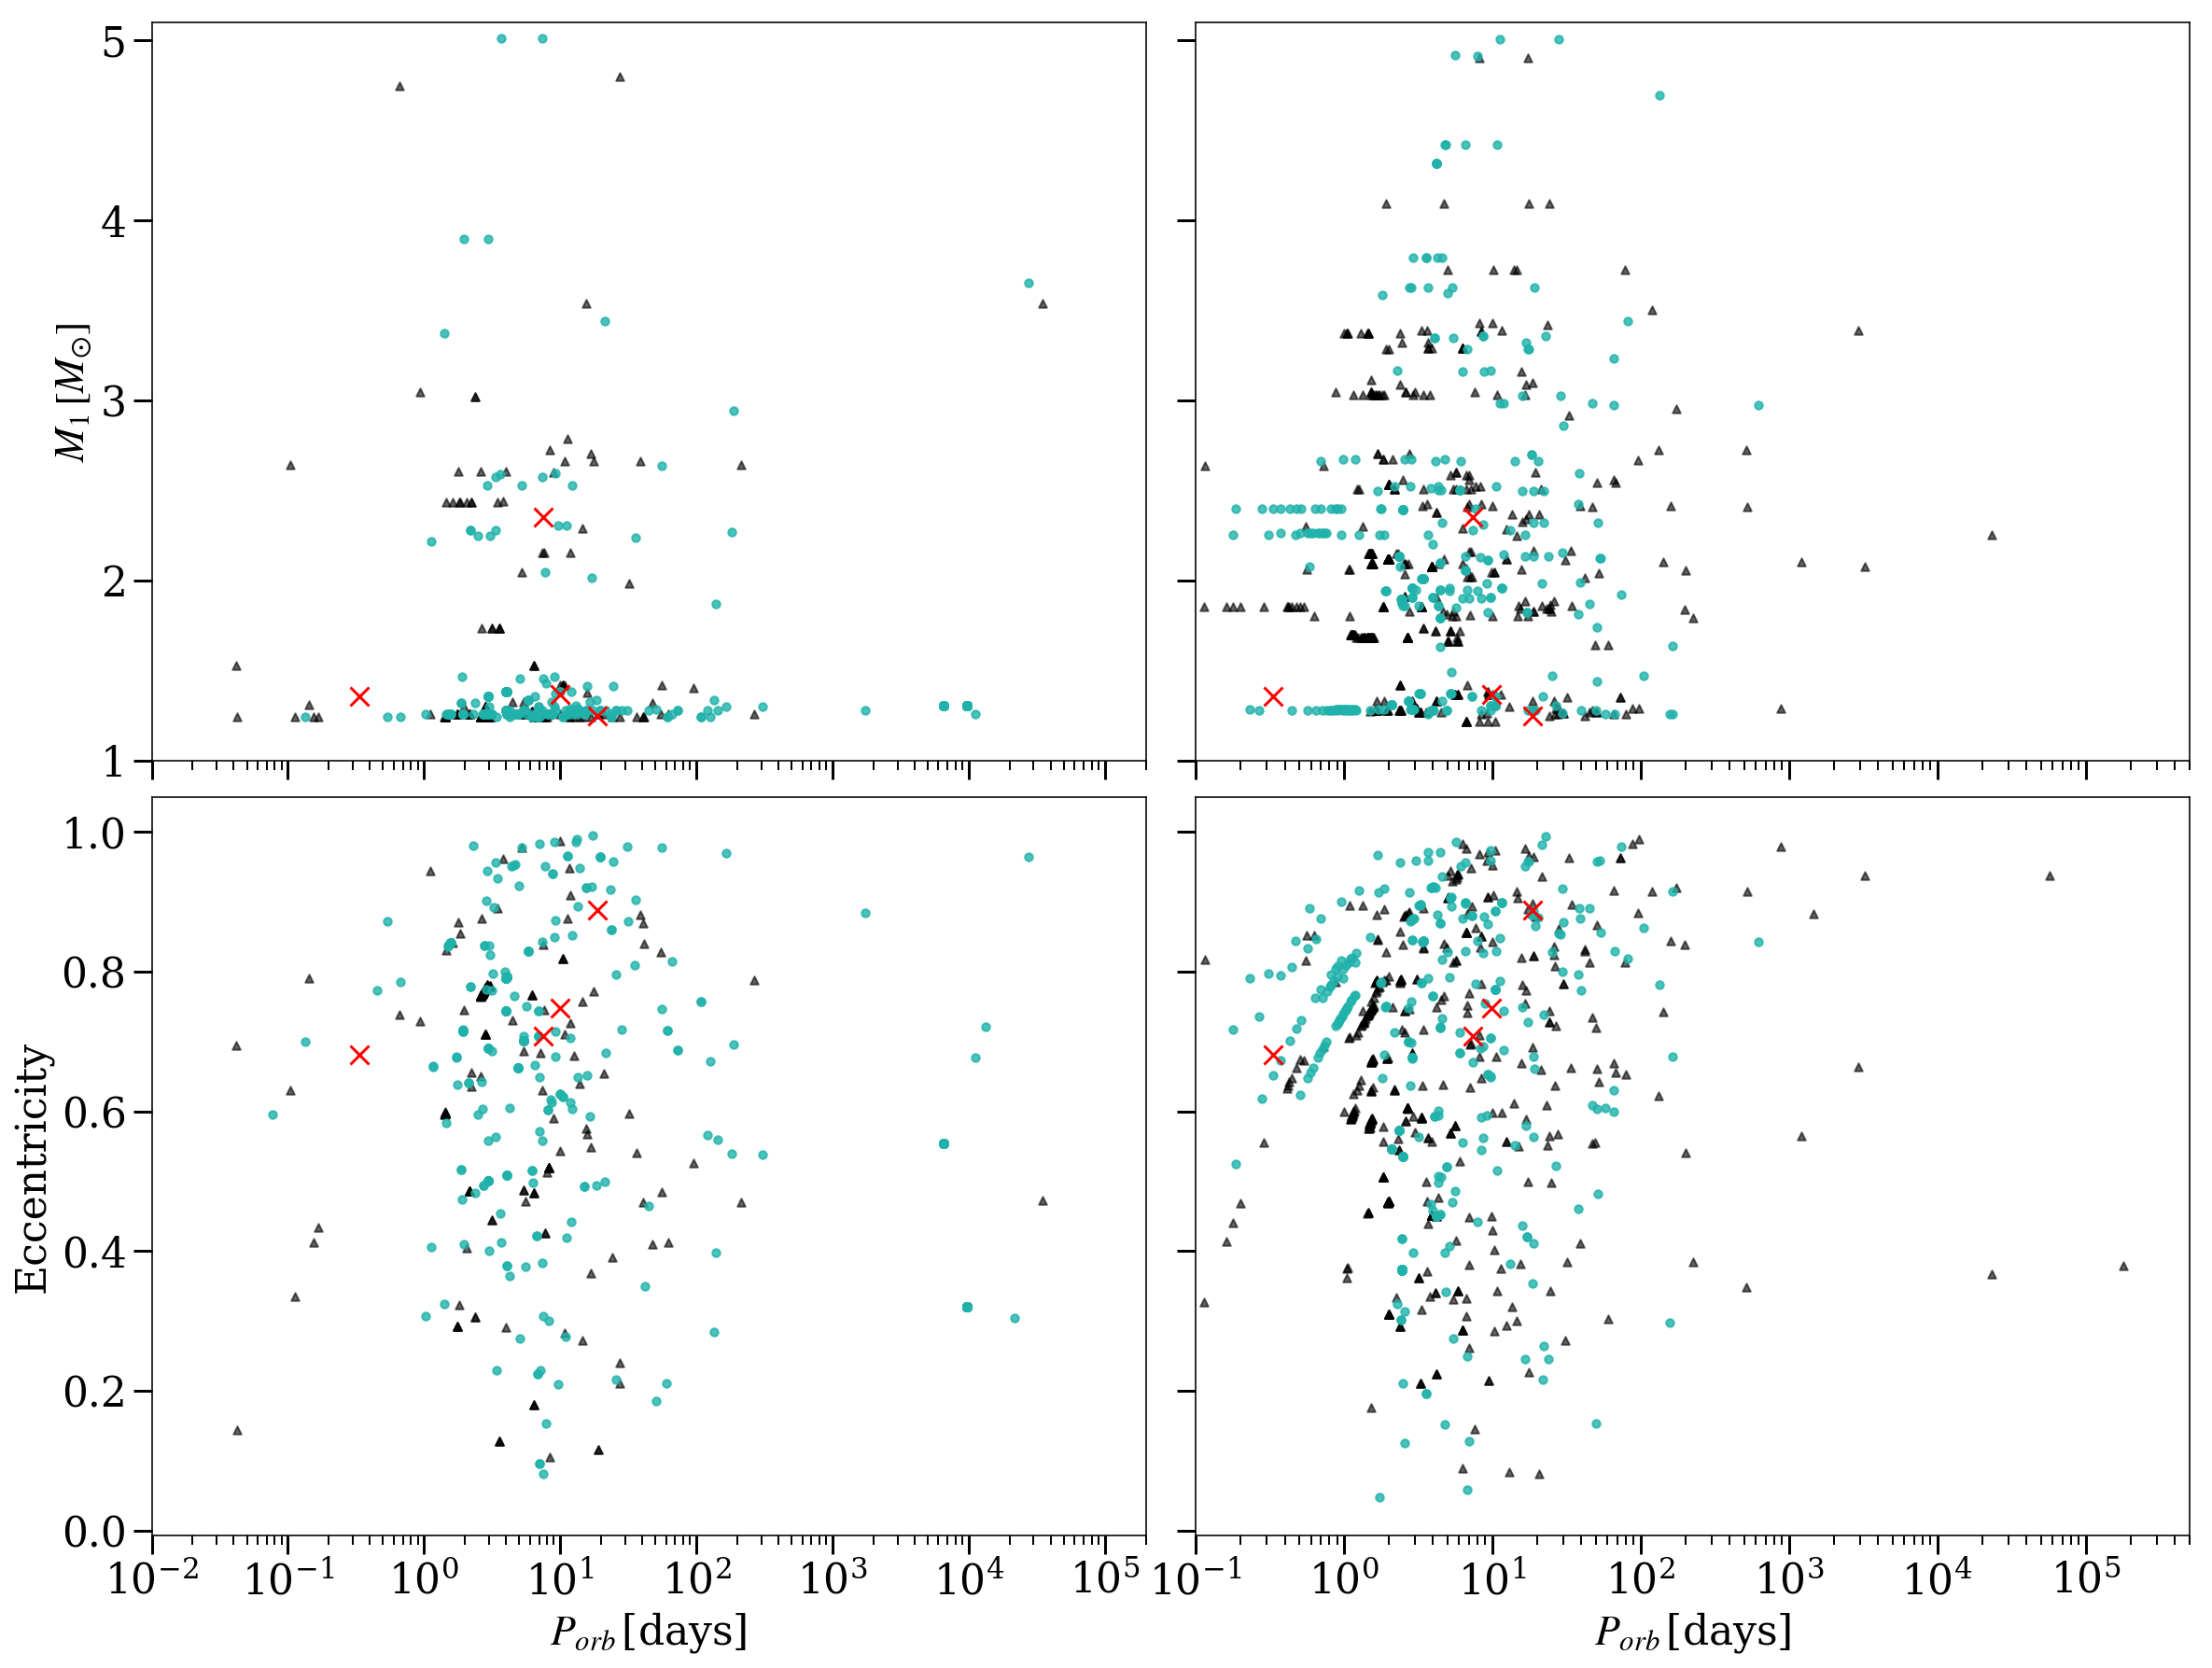

In [20]:
###Remember to only plot the first 12 models

print(types_model)
print(np.max(M0))

sma_day = uc.au_to_period(sma, M0, M1)

######Observations######
M0_obs = [2.35, 1.358, 1.25,1.3655]; M1_obs = [1.53, 1.354, 1.22,1.2064]
M0err_obs = [[0.26,0.01,0.06,0], [0.36,0.01,0.05,0]]
M1err_obs = [[0.2,0.01,0.05,0], [0.18,0.01,0.06,0]]
sma_obs = [7.448, 0.335, 18.785, 9.957]  ##days
ecc_obs = [0.708, 0.681, 0.888, 0.747]



##Plotting present-day DNS and NSBH
btri_1=mlines.Line2D([], [],  linestyle = 'None', color='dimgray', marker='^',
                  markersize=7, alpha=1., label='rapid')
odot_1=mlines.Line2D([], [],  linestyle = 'None', color='royalblue', marker='o',
                  markersize=7, alpha=0.6, label='delayed')
btri_2=mlines.Line2D([], [],  linestyle = 'None', color='dimgray', marker='^',
                  markersize=7, alpha=1., label='rapid\n+updated mass')
odot_2=mlines.Line2D([], [],  linestyle = 'None', color='royalblue', marker='o',
                  markersize=7, alpha=0.6, label='delayed\n+updated mass')

fig, axs = plt.subplots(nrows=2,  ncols=2, figsize=(18,12), sharex=True, sharey=False, 
                        gridspec_kw={'height_ratios': [1.3, 2]})                    
axs[1][0].scatter(M0[types_model=='1'], M1[types_model=='1'], marker='^',
                alpha=1., s=20, color = 'dimgray')
axs[1][0].scatter(M0[types_model=='3'], M1[types_model=='3'],
            alpha=0.7, s=20, color='royalblue')
axs[1][0].axvline(x=5, ls='--', color='green')
axs[1][0].axvline(x=2.5, ls='--', color='green')

axs[1][1].scatter(M0[types_model=='2'], M1[types_model=='2'], marker='^',
        alpha=1., s=20, color = 'dimgray')
axs[1][1].scatter(M0[types_model=='4'], M1[types_model=='4'],
            alpha=0.7, s=20, color='royalblue')
axs[1][1].axvline(x=5, ls='--', color='green')
axs[1][1].axvline(x=2.5, ls='--', color='green')

axs[0][0].hist(M0[types_model=='1'], 
               bins=np.logspace(np.log10(np.min(M0[types_model=='1'])), np.log10(np.max(M0[types_model=='1'])),9),
                alpha=1.0, color = 'dimgray', histtype='step', lw=2)
axs[0][0].hist(M0[types_model=='3'], 
               bins=np.logspace(np.log10(np.min(M0[types_model=='3'])), np.log10(np.max(M0[types_model=='3'])),18),
            alpha=1., color='royalblue', histtype='step', lw=2)
axs[0][0].axvline(x=5, ls='--', color='green')
axs[0][0].axvline(x=2.5, ls='--', color='green')

axs[0][1].hist(M0[types_model=='2'],
               bins=np.logspace(np.log10(np.min(M0[types_model=='2'])), np.log10(np.max(M0[types_model=='2'])),12),
        alpha=1., color = 'dimgray', histtype='step',lw=2)
axs[0][1].hist(M0[types_model=='4'],
               bins=np.logspace(np.log10(np.min(M0[types_model=='4'])), np.log10(np.max(M0[types_model=='4'])),14),
            alpha=1., color='royalblue', histtype='step', lw=2)
axs[0][1].axvline(x=5, ls='--', color='green')
axs[0][1].axvline(x=2.5, ls='--', color='green')

axs[1][0].errorbar(M0_obs, M1_obs, xerr = M0err_obs, yerr = M1err_obs,
                fmt='x', lw=2, markersize=15, color='orange')
axs[1][1].errorbar(M0_obs, M1_obs, xerr = M0err_obs, yerr = M1err_obs,
                fmt='x', lw=2, markersize=15, color='orange')

#axs[0][1].axvspan((np.array(M0_obs)-np.array(M0err_obs[0])), 
#                 (np.array(M0_obs)+np.array(M0err_obs[1])), color='orange', alpha=0.2,zorder=1)
#axs[1][1].axvspan(np.array(M0_obs)-np.array(M0err_obs[0]), 
#                  np.array(M0_obs)+np.array(M0err_obs[1]), color='orange', alpha=0.2,zorder=1)
axs[0][0].errorbar(M0_obs, M1_obs, xerr = M0err_obs, yerr = M1err_obs,
                fmt='x', lw=2, markersize=15, color='orange')
axs[0][1].errorbar(M0_obs, M1_obs, xerr = M0err_obs, yerr = M1err_obs,
                fmt='x', lw=2, markersize=15, color='orange')
    
axs[1][0].set_ylabel(r'$M_2\,[M_{\odot}]$')
axs[1][0].set_xscale('log')
axs[1][0].set_xlabel(r'$M_1\,[M_{\odot}]$')
axs[1][0].tick_params('both', length=10, width=1.5, which='major')
axs[1][0].tick_params('both', length=5, width=1, which='minor')
axs[1][0].legend(loc='upper right', fontsize=20, markerscale=1.5, handles=[btri_1, odot_1])

axs[1][1].set_xlabel(r'$M_1\,[M_{\odot}]$')
axs[1][1].set_xscale('log')
axs[1][1].tick_params('both', length=10, width=1.5, which='major')
axs[1][1].tick_params('both', length=5, width=1, which='minor')
axs[1][1].legend(loc='upper right', fontsize=20, markerscale=1.5, handles=[btri_2, odot_2])

axs[0][0].set_yscale('log')
axs[0][0].tick_params('both', length=10, width=1.5, which='major')
axs[0][0].tick_params('both', length=5, width=1, which='minor')
axs[0][0].set_ylabel(r'$N$')

axs[0][1].set_yscale('log')
axs[0][1].tick_params('both', length=10, width=1.5, which='major')
axs[0][1].tick_params('both', length=5, width=1, which='minor')
fig.tight_layout()
plt.subplots_adjust(hspace=0.05)
#plt.savefig(savepath+'dns_nsbh_m1_m2.pdf', dpi=300)



fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(17,13), sharex='col', sharey='row')                    
axs[1][0].scatter(sma_day[types_model=='1'][::3], ecc[types_model=='1'][::3], marker='^',
                  alpha=0.6, s=18, color = 'k')
axs[1][0].scatter(sma_day[types_model=='3'][::3], ecc[types_model=='3'][::3],
                  alpha=0.8, s=18, color='lightseagreen')
axs[1][0].scatter(sma_obs, ecc_obs, marker='x', s=100, c='red')

axs[1][1].scatter(sma_day[types_model=='2'][::3], ecc[types_model=='2'][::3], marker='^',
                  alpha=0.6, s=18, color = 'k')
axs[1][1].scatter(sma_day[types_model=='4'][::3], ecc[types_model=='4'][::3],
                  alpha=0.8, s=18, color='lightseagreen')
axs[1][1].scatter(sma_obs, ecc_obs, marker='x', s=100, c='red')

axs[0][0].scatter(sma_day[types_model=='1'][::3], M0[types_model=='1'][::3],
                  marker='^',alpha=0.6, s=18, color = 'k')
axs[0][0].scatter(sma_day[types_model=='3'][::3], M0[types_model=='3'][::3],
                  alpha=0.8, s=18, color='lightseagreen')
axs[0][0].scatter(sma_obs, M0_obs, marker='x', s=100, c='red')

axs[0][1].scatter(sma_day[types_model=='2'][::3], M0[types_model=='2'][::3], marker='^',
                  alpha=0.6, s=18, color = 'k')
axs[0][1].scatter(sma_day[types_model=='4'][::3], M0[types_model=='4'][::3],
                  alpha=0.8, s=18, color='lightseagreen')
axs[0][1].scatter(sma_obs, M0_obs, marker='x', s=100, c='red')


axs[0][0].tick_params('both', length=10, width=1.5, which='major')
axs[0][0].tick_params('both', length=5, width=1, which='minor')
axs[0][0].set_ylabel(r'$M_1\,[M_{\odot}]$')

axs[0][1].tick_params('both', length=10, width=1.5, which='major')
axs[0][1].tick_params('both', length=5, width=1, which='minor')
    
axs[1][0].set_xlabel(r'$P_{orb}\,$[days]')
axs[1][0].set_ylabel('Eccentricity')
axs[1][0].set_xscale('log')
axs[1][0].set_xlim(xmin = 0.01, xmax=200000)
axs[1][0].tick_params('both', length=10, width=1.5, which='major')
axs[1][0].tick_params('both', length=5, width=1, which='minor')
#axs[0].legend(loc='upper left', fontsize=20, markerscale=1.5, handles=[btri_1, odot_1])

axs[1][1].set_xlabel(r'$P_{orb}\,$[days]')
axs[1][1].set_xscale('log')
axs[1][1].set_xlim(xmin = 0.1, xmax=500000)
axs[1][1].tick_params('both', length=10, width=1.5, which='major')
axs[1][1].tick_params('both', length=5, width=1, which='minor')
#axs[1].legend(loc='upper left', fontsize=20, markerscale=1.5, handles=[btri_2, odot_2])

axs[0][0].set_ylim(ymin=1.,ymax=5.1)
#axs[0][1].set_yscale('log')

fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.05)

['1' '1' '1' ... '4' '4' '4']
22.761031


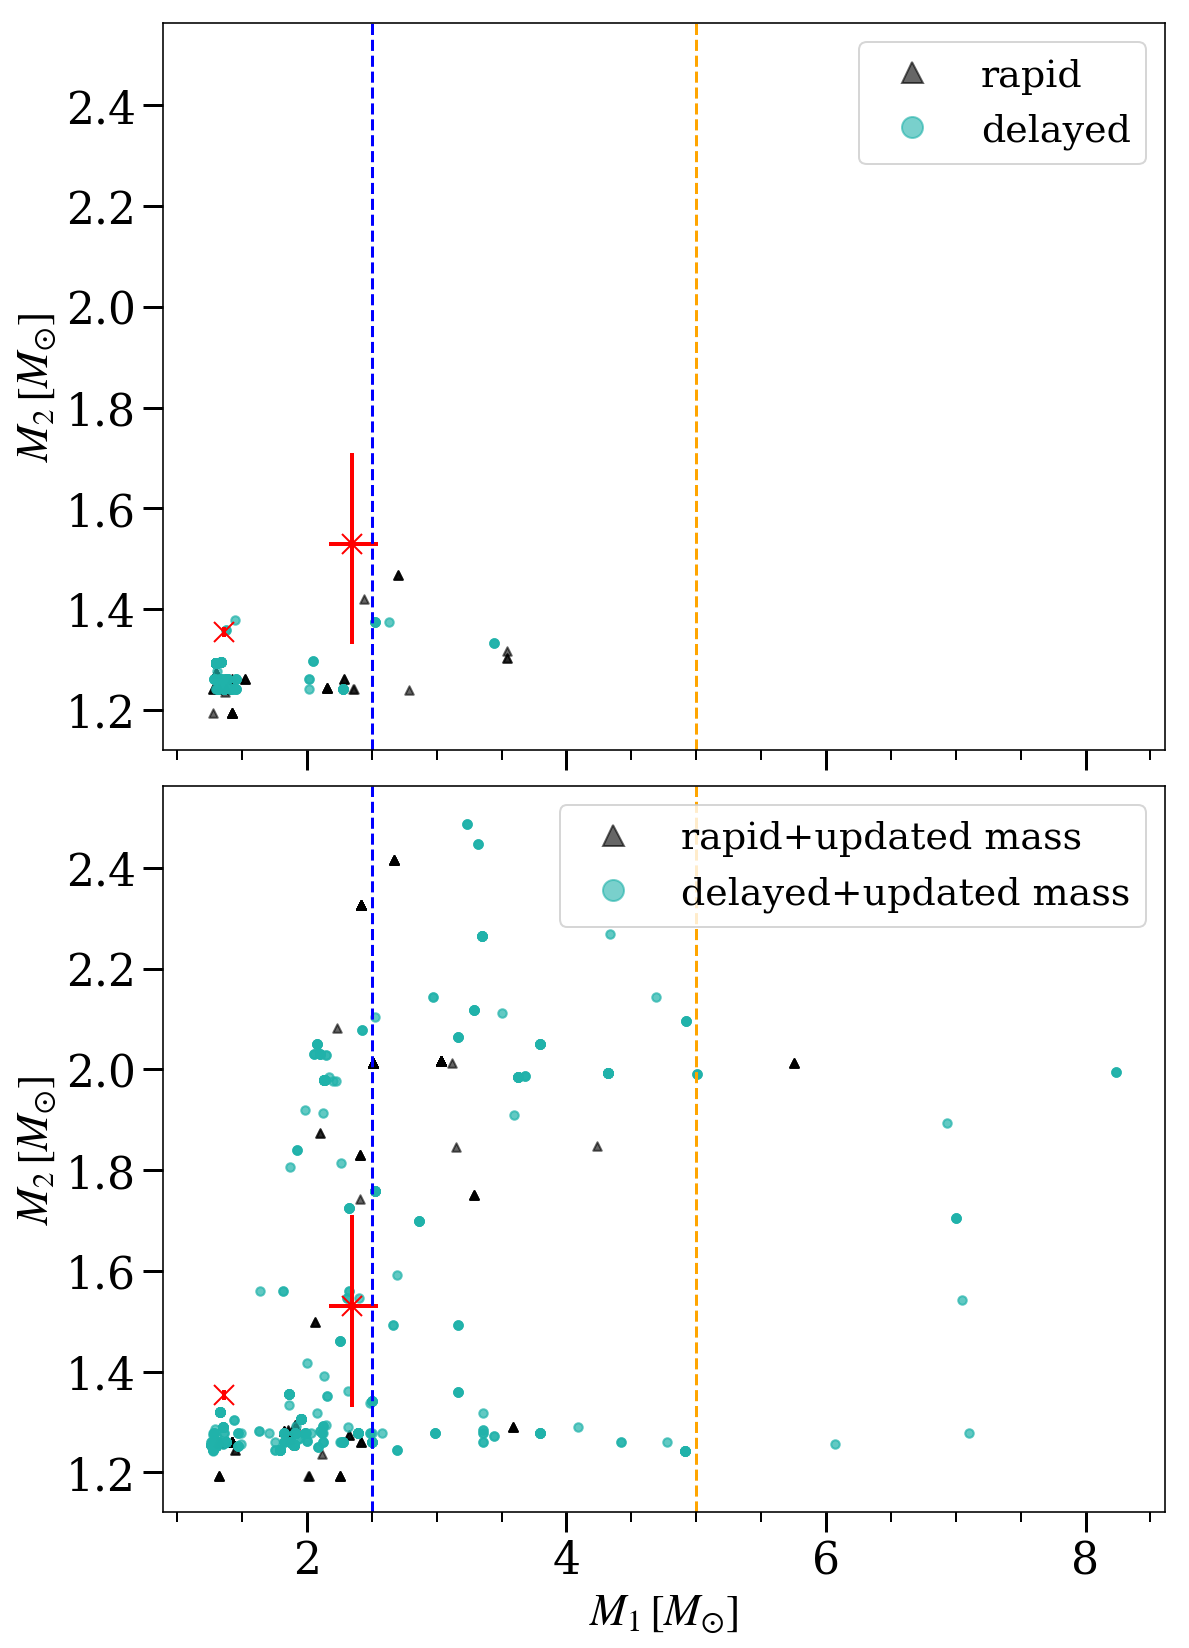

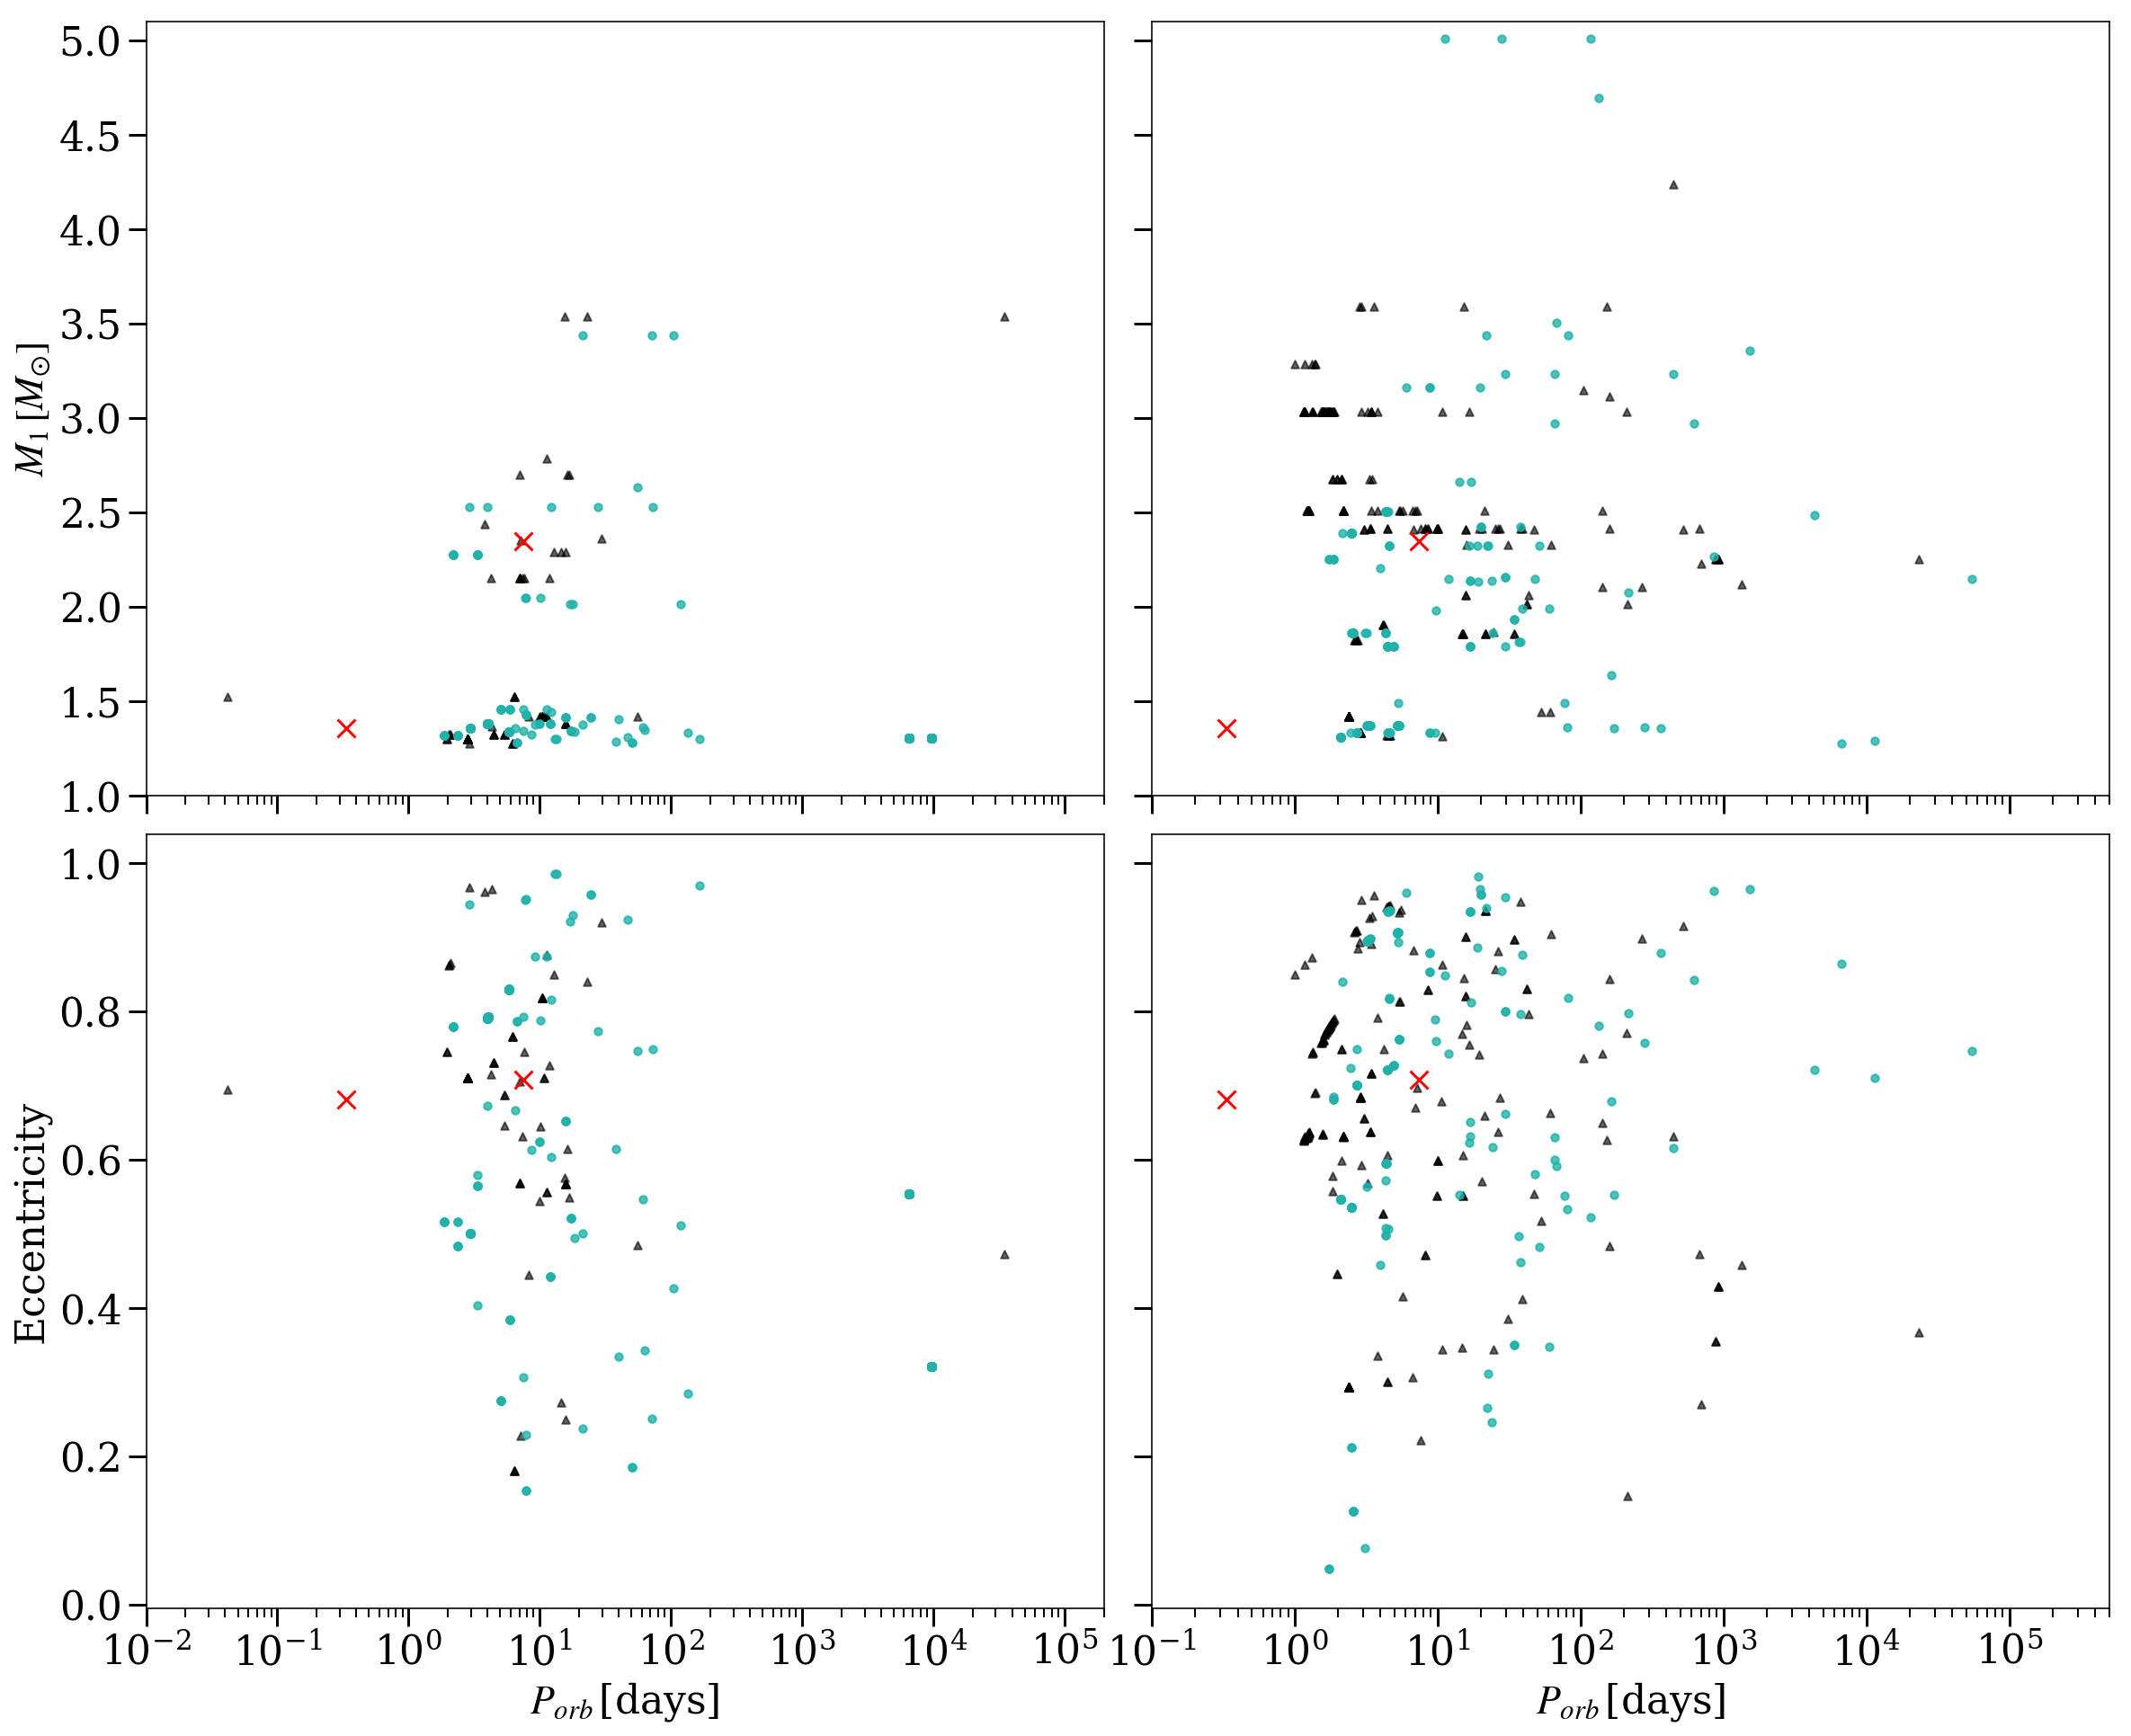

In [22]:
###Present-day DNS and NSBH with at least one MSP

print(types_model)
print(np.max(M0))

sma_day = uc.au_to_period(sma, M0, M1)

######Observations######
M0_obs = [2.35, 1.358]; M1_obs = [1.53, 1.354]
M0err_obs = [[0.18,0.01], [0.2,0.01]]
M1err_obs = [[0.2,0.01], [0.18,0.01]]
sma_obs = [7.448, 0.335]  ##days
ecc_obs = [0.708, 0.681]



##Plotting present-day DNS and NSBH
btri_1=mlines.Line2D([], [],  linestyle = 'None', color='k', marker='^',
                  markersize=7, alpha=0.6, label='rapid')
odot_1=mlines.Line2D([], [],  linestyle = 'None', color='lightseagreen', marker='o',
                  markersize=7, alpha=0.6, label='delayed')
btri_2=mlines.Line2D([], [],  linestyle = 'None', color='k', marker='^',
                  markersize=7, alpha=0.6, label='rapid+updated mass')
odot_2=mlines.Line2D([], [],  linestyle = 'None', color='lightseagreen', marker='o',
                  markersize=7, alpha=0.6, label='delayed+updated mass')

fig, axs = plt.subplots(nrows=2, figsize=(9,12), sharex=True, sharey=True)                    
axs[0].scatter(M0[(types_model=='1') & ((msp_flag1==1) | (msp_flag2==1))], 
               M1[(types_model=='1') & ((msp_flag1==1) | (msp_flag2==1))], 
               marker='^', alpha=0.6, s=18, color = 'k')
axs[0].scatter(M0[(types_model=='3') & ((msp_flag1==1) | (msp_flag2==1))], 
               M1[(types_model=='3') & ((msp_flag1==1) | (msp_flag2==1))],
            alpha=0.7, s=18, color='lightseagreen')
#axs[0].axhline(y=5, ls='--', color='limegreen')
axs[0].axvline(x=5, ls='--', color='orange')
#axs[0].axhline(y=2.5, ls='--', color='b', lw=1.5)
axs[0].axvline(x=2.5, ls='--', color='b', lw=1.5)

axs[1].scatter(M0[(types_model=='2') & ((msp_flag1==1) | (msp_flag2==1))], 
               M1[(types_model=='2') & ((msp_flag1==1) | (msp_flag2==1))], 
               marker='^', alpha=0.6, s=18, color = 'k')
axs[1].scatter(M0[types_model=='4'], M1[types_model=='4'],
            alpha=0.7, s=18, color='lightseagreen')
#axs[1].axhline(y=5, ls='--', color='limegreen')
axs[1].axvline(x=5, ls='--', color='orange')
#axs[1].axhline(y=2.5, ls='--', color='b', lw=1.5)
axs[1].axvline(x=2.5, ls='--', color='b', lw=1.5)

axs[0].errorbar(M0_obs, M1_obs, xerr = M0err_obs, yerr = M1err_obs,
                fmt='x', lw=2, markersize=10, color='red')
axs[1].errorbar(M0_obs, M1_obs, xerr = M0err_obs, yerr = M1err_obs,
                fmt='x', lw=2, markersize=10, color='red')
    
#xs[0].set_xlabel(r'$M_1\,[M_{\odot}]$')
axs[0].set_ylabel(r'$M_2\,[M_{\odot}]$')
#axs[0].set_xscale('log')
#axs[0].set_yscale('log')
axs[0].tick_params('both', length=10, width=1.5, which='major')
axs[0].tick_params('both', length=5, width=1, which='minor')
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].legend(loc='upper right', fontsize=19, markerscale=1.5, handles=[btri_1, odot_1])

axs[1].set_xlabel(r'$M_1\,[M_{\odot}]$')
axs[1].set_ylabel(r'$M_2\,[M_{\odot}]$')
#axs[1].set_xscale('log')
#axs[1].set_yscale('log')
axs[1].tick_params('both', length=10, width=1.5, which='major')
axs[1].tick_params('both', length=5, width=1, which='minor')
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].legend(loc='upper right', fontsize=19, markerscale=1.5, handles=[btri_2, odot_2])
fig.tight_layout()
plt.subplots_adjust(hspace=0.05)


fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(17,14), sharex='col', sharey='row')                    
axs[1][0].scatter(sma_day[(types_model=='1') & ((msp_flag1==1) | (msp_flag2==1))], 
                  ecc[(types_model=='1') & ((msp_flag1==1) | (msp_flag2==1))], 
                  marker='^', alpha=0.6, s=18, color = 'k')
axs[1][0].scatter(sma_day[(types_model=='3') & ((msp_flag1==1) | (msp_flag2==1))], 
                  ecc[(types_model=='3') & ((msp_flag1==1) | (msp_flag2==1))],
                  alpha=0.8, s=18, color='lightseagreen')
axs[1][0].scatter(sma_obs, ecc_obs, marker='x', s=100, c='red')

axs[1][1].scatter(sma_day[(types_model=='2') & ((msp_flag1==1) | (msp_flag2==1))], 
                  ecc[(types_model=='2') & ((msp_flag1==1) | (msp_flag2==1))],
                  marker='^', alpha=0.6, s=18, color = 'k')
axs[1][1].scatter(sma_day[(types_model=='4') & ((msp_flag1==1) | (msp_flag2==1))], 
                  ecc[(types_model=='4') & ((msp_flag1==1) | (msp_flag2==1))],
                  alpha=0.8, s=18, color='lightseagreen')
axs[1][1].scatter(sma_obs, ecc_obs, marker='x', s=100, c='red')

axs[0][0].scatter(sma_day[(types_model=='1') & ((msp_flag1==1) | (msp_flag2==1))], 
                  M0[(types_model=='1') & ((msp_flag1==1) | (msp_flag2==1))],
                  marker='^',alpha=0.6, s=18, color = 'k')
axs[0][0].scatter(sma_day[(types_model=='3') & ((msp_flag1==1) | (msp_flag2==1))], 
                  M0[(types_model=='3') & ((msp_flag1==1) | (msp_flag2==1))],
                  alpha=0.8, s=18, color='lightseagreen')
axs[0][0].scatter(sma_obs, M0_obs, marker='x', s=100, c='red')

axs[0][1].scatter(sma_day[(types_model=='2') & ((msp_flag1==1) | (msp_flag2==1))], 
                  M0[(types_model=='2') & ((msp_flag1==1) | (msp_flag2==1))], 
                  marker='^', alpha=0.6, s=18, color = 'k')
axs[0][1].scatter(sma_day[(types_model=='4') & ((msp_flag1==1) | (msp_flag2==1))], 
                  M0[(types_model=='4') & ((msp_flag1==1) | (msp_flag2==1))],
                  alpha=0.8, s=18, color='lightseagreen')
axs[0][1].scatter(sma_obs, M0_obs, marker='x', s=100, c='red')


axs[0][0].tick_params('both', length=10, width=1.5, which='major')
axs[0][0].tick_params('both', length=5, width=1, which='minor')
axs[0][0].set_ylabel(r'$M_1\,[M_{\odot}]$')

axs[0][1].tick_params('both', length=10, width=1.5, which='major')
axs[0][1].tick_params('both', length=5, width=1, which='minor')
    
axs[1][0].set_xlabel(r'$P_{orb}\,$[days]')
axs[1][0].set_ylabel('Eccentricity')
axs[1][0].set_xscale('log')
axs[1][0].set_xlim(xmin = 0.01, xmax=200000)
axs[1][0].tick_params('both', length=10, width=1.5, which='major')
axs[1][0].tick_params('both', length=5, width=1, which='minor')
#axs[0].legend(loc='upper left', fontsize=20, markerscale=1.5, handles=[btri_1, odot_1])

axs[1][1].set_xlabel(r'$P_{orb}\,$[days]')
axs[1][1].set_xscale('log')
axs[1][1].set_xlim(xmin = 0.1, xmax=500000)
axs[1][1].tick_params('both', length=10, width=1.5, which='major')
axs[1][1].tick_params('both', length=5, width=1, which='minor')
#axs[1].legend(loc='upper left', fontsize=20, markerscale=1.5, handles=[btri_2, odot_2])

axs[0][0].set_ylim(ymin=1.,ymax=5.1)
#axs[0][1].set_yscale('log')

fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [23]:
###Present-day DNS and NSBH binaries
##Fraction of NSBH binaries containing mass gaps

co_type = ['DNS', 'NSBH']

F_mg_nsbh = []

tll = [11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 10000, 10000]
tul = [14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 13000, 13000]

for xx in range(len(paths)):
    M0 = []; M1 = []
    sma = []; ecc = []
    B0 = []; B1 = []
    spin0 = []; spin1 = []
    btype = []; types_model = []
    id_bin1 = []; id_bin2 = []
    msp_flag1 = []; msp_flag2 = []
    path_no = []; time_code = []
    
    Frac_mg_nsbh_model = []

    
    t_conv = dyn.conv('t', paths[xx]+'initial.conv.sh')
    
    t_old = 14000.
    with open(paths[xx]+'initial.morepulsars.dat', 'r') as fpsr:
        next(fpsr)
        for line in fpsr:
            datapsr = line.split()
            if float(datapsr[1])*t_conv > tul[xx]:
                break
            if float(datapsr[1])*t_conv < tll[xx]:
                continue
            
            #if float(datapsr[1])*t_conv > t_old:
            #    
            #    M0 = np.array(M0); M1 = np.array(M1)
            #    btype = np.array(btype)
            #    
            #    if len(M1) >0:
            #        Frac_mg_nsbh_model.append(len(M1[(M0>2.5) & (M0<5.)])/len(M1))
            #    
            #    M0 = []; M1 = []
            #    sma = []; ecc = []
            #    B0 = []; B1 = []
            #    spin0 = []; spin1 = []
            #    btype = []; types_model = []
            #    id_bin1 = []; id_bin2 = []
            #    msp_flag1 = []; msp_flag2 = []
            
            if int(datapsr[2])==1:
                if int(datapsr[11])==13 and int(datapsr[12])==13:
                    
                    ###This exclude the ones that merge in a Hubble time###
                    #if int(datapsr[3]) in id_all0[0][xx] and id_all1[0][xx][id_all0[0][xx].index(int(datapsr[3]))]==int(datapsr[4]):
                    ###id_all1 and id_all2 are the IDs of the compact object mergers
                    #    continue
                       
                    #if int(datapsr[4]) in id_all0[0][xx] and id_all1[0][xx][id_all0[0][xx].index(int(datapsr[4]))]==int(datapsr[3]):
                    #    continue
                    
                    if float(datapsr[5]) > float(datapsr[6]):
                        M0.append(float(datapsr[5])); M1.append(float(datapsr[6]))
                        btype.append(co_type[0]); types_model.append(model_type[xx])
                        sma.append(float(datapsr[13])); ecc.append(float(datapsr[14]))
                        B0.append(float(datapsr[7])); B1.append(float(datapsr[8]))
                        spin0.append(float(datapsr[9])); spin1.append(float(datapsr[10]))
                        id_bin1.append(int(datapsr[3])); id_bin2.append(int(datapsr[4]))
                        path_no.append(xx); time_code.append(float(datapsr[1]))
                        
                        if float(datapsr[7])>=(float(datapsr[9])**2)*(0.17*10**12) and float(datapsr[9])<=0.03:
                            msp_flag1.append(1)
                        else:
                            msp_flag1.append(0)
                            
                        if float(datapsr[8])>=(float(datapsr[10])**2)*(0.17*10**12) and float(datapsr[10])<=0.03:
                            msp_flag2.append(1)
                        else:
                            msp_flag2.append(0)

                        
                    else:
                        M0.append(float(datapsr[6])); M1.append(float(datapsr[5]))
                        btype.append(co_type[0]); types_model.append(model_type[xx])
                        sma.append(float(datapsr[13])); ecc.append(float(datapsr[14]))
                        B0.append(float(datapsr[8])); B1.append(float(datapsr[7]))
                        spin0.append(float(datapsr[10])); spin1.append(float(datapsr[9]))
                        id_bin1.append(int(datapsr[4])); id_bin2.append(int(datapsr[3]))
                        path_no.append(xx); time_code.append(float(datapsr[1]))
                        
                        if float(datapsr[8])>=(float(datapsr[10])**2)*(0.17*10**12) and float(datapsr[10])<=0.03:
                            msp_flag1.append(1)
                        else:
                            msp_flag1.append(0)
                            
                        if float(datapsr[7])>=(float(datapsr[9])**2)*(0.17*10**12) and float(datapsr[9])<=0.03:
                            msp_flag2.append(1)
                        else:
                            msp_flag2.append(0)
                    
                if int(datapsr[11])==14 and int(datapsr[12])==13:
                    
                    ###This exclude the ones that merge in a Hubble time###
                    #if int(datapsr[3]) in id_all0[1][xx] and id_all1[1][xx][id_all0[1][xx].index(int(datapsr[3]))]==int(datapsr[4]):
                    #    continue
                       
                    #if int(datapsr[4]) in id_all0[1][xx] and id_all1[1][xx][id_all0[1][xx].index(int(datapsr[4]))]==int(datapsr[3]):
                    #    continue
                        
                    M0.append(float(datapsr[5])); M1.append(float(datapsr[6]))
                    btype.append(co_type[1]); types_model.append(model_type[xx])
                    sma.append(float(datapsr[13])); ecc.append(float(datapsr[14]))
                    B0.append(float(datapsr[7])); B1.append(float(datapsr[8]))
                    spin0.append(float(datapsr[9])); spin1.append(float(datapsr[10]))
                    id_bin1.append(int(datapsr[3])); id_bin2.append(int(datapsr[4]))
                    path_no.append(xx); time_code.append(float(datapsr[1]))
                    
                    if float(datapsr[8])>=(float(datapsr[10])**2)*(0.17*10**12) and float(datapsr[10])<=0.03:
                        msp_flag2.append(1)
                    else:
                        msp_flag2.append(0)
                        
                    msp_flag1.append(-100)
                        
                if int(datapsr[11])==13 and int(datapsr[12])==14:
                    #if int(datapsr[3]) in id_all0[1][xx] and id_all1[1][xx][id_all0[1][xx].index(int(datapsr[3]))]==int(datapsr[4]):
                    #    continue
                       
                    #if int(datapsr[4]) in id_all0[1][xx] and id_all1[1][xx][id_all0[1][xx].index(int(datapsr[4]))]==int(datapsr[3]):
                    #    continue
                        
                    M0.append(float(datapsr[6])); M1.append(float(datapsr[5]))
                    btype.append(co_type[1]); types_model.append(model_type[xx])
                    sma.append(float(datapsr[13])); ecc.append(float(datapsr[14]))
                    B0.append(float(datapsr[8])); B1.append(float(datapsr[7]))
                    spin0.append(float(datapsr[10])); spin1.append(float(datapsr[9]))
                    id_bin1.append(int(datapsr[4])); id_bin2.append(int(datapsr[3]))
                    path_no.append(xx); time_code.append(float(datapsr[1]))
                    
                    if float(datapsr[7])>=(float(datapsr[9])**2)*(0.17*10**12) and float(datapsr[9])<=0.03:
                        msp_flag2.append(1)
                    else:
                        msp_flag2.append(0)
                        
                    msp_flag1.append(-100)
            
            t_old = float(datapsr[1])*t_conv
            
        #M0 = np.array(M0); M1 = np.array(M1)
        #btype = np.array(btype)
        #    
        #if len(M1) >0:
        #    Frac_mg_nsbh_model.append(len(M1[(M0>2.5) & (M0<5.)])/len(M1))
        
    #print(xx, paths[xx])
    #print(np.mean(Frac_mg_nsbh_model))
    #F_mg_nsbh.append(np.mean(Frac_mg_nsbh_model))
    
    M0 = np.array(M0); M1 = np.array(M1)
    types_model = np.array(types_model)
    btype = np.array(btype)
    sma = np.array(sma); ecc = np.array(ecc)
    msp_flag1 = np.array(msp_flag1); msp_flag2 = np.array(msp_flag2)
    path_no = np.array(path_no); time_code = np.array(time_code)
    id_bin1 = np.array(id_bin1); id_bin2 = np.array(id_bin2)
    
    #print(M0[btype=='NSBH'], M1[btype=='NSBH'])

    print(xx, paths[xx], '\n', len(M1[(M0>2.5) & (M0<5.)])/len(M1), len(M1))
    F_mg_nsbh.append(len(M1[(M0>2.5) & (M0<5.)])/len(M1))

0 /projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun/ 
 0.23140495867768596 121
1 /projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun_delay/ 
 0.0 748


KeyboardInterrupt: 

In [7]:
###Check how the mass gap objects form in present-day DNS and NSBH binaries

###Present-day DNS and NSBH binaries
co_type = ['DNS', 'NSBH']

tll = [11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 10000, 10000]
tul = [14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 13000, 13000]

M0 = []; M1 = []
sma = []; ecc = []
B0 = []; B1 = []
spin0 = []; spin1 = []
btype = []; types_model = []
id_bin1 = []; id_bin2 = []
msp_flag1 = []; msp_flag2 = []
path_no = []; time_code = []

for xx in range(len(paths)):
    t_conv = dyn.conv('t', paths[xx]+'initial.conv.sh')
    
    id_nonrepeat = []
    
    t_old = 14000.
    with open(paths[xx]+'initial.morepulsars.dat', 'r') as fpsr:
        next(fpsr)
        for line in fpsr:
            datapsr = line.split()
            if float(datapsr[1])*t_conv > tul[xx]:
                break
            if float(datapsr[1])*t_conv < tll[xx]:
                continue
            
            if int(datapsr[2])==1:
                if str(int(datapsr[3]))+'-'+str(int(datapsr[4])) in id_nonrepeat or str(int(datapsr[4]))+'-'+str(int(datapsr[3])) in id_nonrepeat:
                    continue
                    
                if int(datapsr[11])==13 and int(datapsr[12])==13:
                    
                    ###This exclude the ones that merge in a Hubble time###
                    #if int(datapsr[3]) in id_all0[0][xx] and id_all1[0][xx][id_all0[0][xx].index(int(datapsr[3]))]==int(datapsr[4]):
                    ###id_all1 and id_all2 are the IDs of the compact object mergers
                    #    continue
                       
                    #if int(datapsr[4]) in id_all0[0][xx] and id_all1[0][xx][id_all0[0][xx].index(int(datapsr[4]))]==int(datapsr[3]):
                    #    continue
                    
                    
                    if float(datapsr[5]) > float(datapsr[6]):
                        M0.append(float(datapsr[5])); M1.append(float(datapsr[6]))
                        btype.append(co_type[0]); types_model.append(model_type[xx])
                        sma.append(float(datapsr[13])); ecc.append(float(datapsr[14]))
                        B0.append(float(datapsr[7])); B1.append(float(datapsr[8]))
                        spin0.append(float(datapsr[9])); spin1.append(float(datapsr[10]))
                        id_bin1.append(int(datapsr[3])); id_bin2.append(int(datapsr[4]))
                        path_no.append(xx); time_code.append(float(datapsr[1]))
                        id_nonrepeat.append(str(int(datapsr[3]))+'-'+str(int(datapsr[4])))
                        
                        if float(datapsr[7])>=(float(datapsr[9])**2)*(0.17*10**12) and float(datapsr[9])<=0.03:
                            msp_flag1.append(1)
                        else:
                            msp_flag1.append(0)
                            
                        if float(datapsr[8])>=(float(datapsr[10])**2)*(0.17*10**12) and float(datapsr[10])<=0.03:
                            msp_flag2.append(1)
                        else:
                            msp_flag2.append(0)

                        
                    else:
                        M0.append(float(datapsr[6])); M1.append(float(datapsr[5]))
                        btype.append(co_type[0]); types_model.append(model_type[xx])
                        sma.append(float(datapsr[13])); ecc.append(float(datapsr[14]))
                        B0.append(float(datapsr[8])); B1.append(float(datapsr[7]))
                        spin0.append(float(datapsr[10])); spin1.append(float(datapsr[9]))
                        id_bin1.append(int(datapsr[4])); id_bin2.append(int(datapsr[3]))
                        path_no.append(xx); time_code.append(float(datapsr[1]))
                        id_nonrepeat.append(str(int(datapsr[3]))+'-'+str(int(datapsr[4])))

                        
                        if float(datapsr[8])>=(float(datapsr[10])**2)*(0.17*10**12) and float(datapsr[10])<=0.03:
                            msp_flag1.append(1)
                        else:
                            msp_flag1.append(0)
                            
                        if float(datapsr[7])>=(float(datapsr[9])**2)*(0.17*10**12) and float(datapsr[9])<=0.03:
                            msp_flag2.append(1)
                        else:
                            msp_flag2.append(0)
                    
                if int(datapsr[11])==14 and int(datapsr[12])==13:
                    
                    ###This exclude the ones that merge in a Hubble time###
                    #if int(datapsr[3]) in id_all0[1][xx] and id_all1[1][xx][id_all0[1][xx].index(int(datapsr[3]))]==int(datapsr[4]):
                    #    continue
                       
                    #if int(datapsr[4]) in id_all0[1][xx] and id_all1[1][xx][id_all0[1][xx].index(int(datapsr[4]))]==int(datapsr[3]):
                    #    continue
                        
                    M0.append(float(datapsr[5])); M1.append(float(datapsr[6]))
                    btype.append(co_type[1]); types_model.append(model_type[xx])
                    sma.append(float(datapsr[13])); ecc.append(float(datapsr[14]))
                    B0.append(float(datapsr[7])); B1.append(float(datapsr[8]))
                    spin0.append(float(datapsr[9])); spin1.append(float(datapsr[10]))
                    id_bin1.append(int(datapsr[3])); id_bin2.append(int(datapsr[4]))
                    path_no.append(xx); time_code.append(float(datapsr[1]))
                    id_nonrepeat.append(str(int(datapsr[3]))+'-'+str(int(datapsr[4])))

                    
                    if float(datapsr[8])>=(float(datapsr[10])**2)*(0.17*10**12) and float(datapsr[10])<=0.03:
                        msp_flag2.append(1)
                    else:
                        msp_flag2.append(0)
                        
                    msp_flag1.append(-100)
                        
                if int(datapsr[11])==13 and int(datapsr[12])==14:
                    #if int(datapsr[3]) in id_all0[1][xx] and id_all1[1][xx][id_all0[1][xx].index(int(datapsr[3]))]==int(datapsr[4]):
                    #    continue
                       
                    #if int(datapsr[4]) in id_all0[1][xx] and id_all1[1][xx][id_all0[1][xx].index(int(datapsr[4]))]==int(datapsr[3]):
                    #    continue
                        
                    M0.append(float(datapsr[6])); M1.append(float(datapsr[5]))
                    btype.append(co_type[1]); types_model.append(model_type[xx])
                    sma.append(float(datapsr[13])); ecc.append(float(datapsr[14]))
                    B0.append(float(datapsr[8])); B1.append(float(datapsr[7]))
                    spin0.append(float(datapsr[10])); spin1.append(float(datapsr[9]))
                    id_bin1.append(int(datapsr[4])); id_bin2.append(int(datapsr[3]))
                    path_no.append(xx); time_code.append(float(datapsr[1]))
                    id_nonrepeat.append(str(int(datapsr[3]))+'-'+str(int(datapsr[4])))
                    
                    if float(datapsr[7])>=(float(datapsr[9])**2)*(0.17*10**12) and float(datapsr[9])<=0.03:
                        msp_flag2.append(1)
                    else:
                        msp_flag2.append(0)
                        
                    msp_flag1.append(-100)
            
            t_old = float(datapsr[1])*t_conv
            

M0 = np.array(M0); M1 = np.array(M1)
types_model = np.array(types_model)
btype = np.array(btype)
sma = np.array(sma); ecc = np.array(ecc)
msp_flag1 = np.array(msp_flag1); msp_flag2 = np.array(msp_flag2)
path_no = np.array(path_no); time_code = np.array(time_code)
id_bin1 = np.array(id_bin1); id_bin2 = np.array(id_bin2)
    
print('extract data done')

extract data done


In [8]:
####Check formation pathway
flag0 = []; flag1 = []
flag_mg0 = []; flag_mg1 = []
interact_gap = [[],[]]; interact_first = [[],[]]; interact_no = [[],[]]

#print(path_no, btype)

for xx in range(len(paths)):
    print(paths[xx])
    
    id_co1 = id_bin1[(path_no==xx) & (M0>=2.1) & (M0<=5.)]; 
    id_co2 = id_bin2[(path_no==xx) & (M0>=2.1) & (M0<=5.)]
    m_co1 = M0[(path_no==xx) & (M0>=2.1) & (M0<=5.)]
    m_co2 = M1[(path_no==xx) & (M0>=2.1) & (M0<=5.)]
    path_co = path_no[(path_no==xx) & (M0>=2.1) & (M0<=5.)]
    t_co = time_code[(path_no==xx) & (M0>=2.1) & (M0<=5.)]
    #print(len(id_co1))
    
    dict_hist0 = ecm.coll_merger_hist_previous(paths[xx], id_co1, t_co, [13,14])
    dict_hist1 = ecm.coll_merger_hist_previous(paths[xx], id_co2, t_co, [13,14])
    
    for ii in range(len(id_co1)):
        flag0.append(0); flag1.append(0)
        flag_mg0.append(0); flag_mg1.append(0)
        
        ##checking the interaction that push the object into the mass gap##
        if id_co1[ii]==0 or id_co2[ii]==0: 
            interact_first[0].append([-100])
            interact_gap[0].append([-100])
            interact_no[0].append(-100)
            interact_first[1].append([-100])
            interact_gap[1].append([-100])
            interact_no[1].append(-100)
            continue
            
        #print(dict_hist0[str(int(id_co1[ii]))])
        dict_time0 = np.array(dict_hist0[str(int(id_co1[ii]))]['time'])
        dict_m0 = np.array(dict_hist0[str(int(id_co1[ii]))]['ms'])
        dict_k0 = np.array(dict_hist0[str(int(id_co1[ii]))]['ks'])
        if len(dict_k0[dict_m0<2.5])>=1:
            theinteract0 = list(dict_k0[dict_m0<2.5][0])
        else:
            theinteract0 = [0]
            
        if len(dict_k0)<1: 
            theinteract0=[-200]
            interact_first[0].append([-200])
            interact_gap[0].append([-200])
            interact_no[0].append(-200)
            
            if m_co1[ii]>2.5 and m_co1[ii]<=5:
                flag_mg0[-1]=4
        else:
            interact_first[0].append(list(dict_k0[-1]))
            interact_gap[0].append(theinteract0)
            interact_no[0].append(len(dict_m0))
          
        ########
        dict_time1 = np.array(dict_hist1[str(int(id_co2[ii]))]['time'])
        dict_m1 = np.array(dict_hist1[str(int(id_co2[ii]))]['ms'])
        dict_k1 = np.array(dict_hist1[str(int(id_co2[ii]))]['ks'])
        if len(dict_k1[dict_m1<2.5])>=1:
            theinteract1 = list(dict_k1[dict_m1<2.5][0])
        else:
            theinteract1 = [0]
        
        if len(dict_k1)<1: 
            theinteract1=[-200]
            interact_first[1].append([-200])
            interact_gap[1].append([-200])
            interact_no[1].append(-200)
            
            if m_co2[ii]>2.5 and m_co2[ii]<=5:
                flag_mg1[-1]=4
        else:    
            interact_first[1].append(list(dict_k1[-1]))
            interact_gap[1].append(theinteract1)
            interact_no[1].append(len(dict_m1))
        
        
        ##checking if the mass-gap objects went through TDEs or WD-WD coll/mers##
        starnum_0=Counter(interact_first[0][-1])
        starnum_1=Counter(interact_first[1][-1])
        
        starnum_mg0=Counter(theinteract0)
        starnum_mg1=Counter(theinteract1)
        
        ##First interaction
        if id_co1[ii] in id_wdwdcol_all[xx] or id_co1[ii] in id_wdwdmer_all[xx]:
            flag0[-1]=1
            
            if id_co1[ii] in idtde_all[xx] or id_co1[ii] in idtde_latercoll_all[xx]:
                flag0[-1]=2
                
        elif (starnum_0[11]>=1 or starnum_0[12]>=1) and starnum_0[13]<1 and starnum_0[14]<1:
            flag0[-1]=1
            
            if id_co1[ii] in idtde_all[xx] or id_co1[ii] in idtde_latercoll_all[xx]:
                flag0[-1]=2
        
            #if id_mg0[zz][xx][ii] in id_wdwdcol_all[xx] or id_mg0[zz][xx][ii] in id_wdwdmer_all[xx]:
            #    flag0[-1]=3
        
        elif (starnum_0[10]>=1 or starnum_0[11]>=1 or starnum_0[12]>=1) and starnum_0[13]==1 and starnum_0[14]<1:
            flag0[-1]=3 
        
        elif starnum_0[13]>=2 and starnum_0[14]<1:
            flag0[-1]=4
            
            
        if id_co2[ii] in id_wdwdcol_all[xx] or id_co2[ii] in id_wdwdmer_all[xx]:
            flag1[-1]=1
            
            if id_co2[ii] in idtde_all[xx] or id_co2[ii] in idtde_latercoll_all[xx]:
                flag1[-1]=2
                
        elif (starnum_1[11]>=1 or starnum_1[12]>=1) and starnum_1[13]<1 and starnum_1[14]<1:
            flag1[-1]=1
            
            if id_co2[ii] in idtde_all[xx] or id_co2[ii] in idtde_latercoll_all[xx]:
                flag1[-1]=2
            
            #if id_mg1[zz][xx][ii] in id_wdwdcol_all[xx] or id_mg1[zz][xx][ii] in id_wdwdmer_all[xx]:
            #    flag1[-1]=3
            
        elif (starnum_1[10]>=1 or starnum_1[11]>=1 or starnum_1[12]>=1) and starnum_1[13]==1 and starnum_1[14]<1:
            flag1[-1]=3 
            
        elif starnum_1[13]>=2 and starnum_1[14]<1:
            flag1[-1]=4
            
            
        ##Interaction that produces the mass gap BH
        if (starnum_mg0[10]>=1 or starnum_mg0[11]>=1 or starnum_mg0[12]>=1) and starnum_mg0[13]==1 and starnum_mg0[14]<1:
            flag_mg0[-1]=1 
        
        elif starnum_mg0[13]>=2 and starnum_mg0[14]<1:
            flag_mg0[-1]=2
            
        elif (starnum_mg0[0]>=1 or starnum_mg0[1]>=1) and starnum_mg0[13]==1 and starnum_mg0[14]<1:
            flag_mg0[-1]=3
        
        elif starnum_0[14]==1:   ##Born as mass gap BH from delayed model probably
            flag_mg0[-1]=4
        
        elif (starnum_mg0[10]>=1 or starnum_mg0[11]>=1 or starnum_mg0[12]>=1) and starnum_mg0[13]<1 and starnum_mg0[14]<1:
            flag_mg0[-1]=5
            
        if (starnum_mg1[10]>=1 or starnum_mg1[11]>=1 or starnum_mg1[12]>=1) and starnum_mg1[13]==1 and starnum_mg1[14]<1:
            flag_mg1[-1]=1 
        
        elif starnum_mg1[13]>=2 and starnum_mg1[14]<1:
            flag_mg1[-1]=2
            
        elif (starnum_mg1[0]>=1 or starnum_mg1[1]>=1) and starnum_mg1[13]==1 and starnum_mg1[14]<1:
            flag_mg1[-1]=3
        
        elif starnum_1[14]==1:   ##Born as mass gap BH from delayed model probably
            flag_mg1[-1]=4
            
        elif (starnum_mg1[10]>=1 or starnum_mg1[11]>=1 or starnum_mg1[12]>=1) and starnum_mg1[13]<1 and starnum_mg1[14]<1:
            flag_mg1[-1]=5


                
flag0 = np.array(flag0); flag1 = np.array(flag1)
flag_mg0 = np.array(flag_mg0); flag_mg1 = np.array(flag_mg1)
type_co = btype[(M0>=2.1) & (M0<=5.)]
model_co = path_no[(M0>=2.1) & (M0<=5.)]
id_co1 = id_bin1[(M0>=2.1) & (M0<=5.)]
id_co2 = id_bin2[(M0>=2.1) & (M0<=5.)]
m_co1 = M0[(M0>=2.1) & (M0<=5.)]
m_co2 = M1[(M0>=2.1) & (M0<=5.)]
t_co = time_code[(M0>=2.1) & (M0<=5.)]
period_co = uc.au_to_period(sma[(M0>=2.1) & (M0<=5.)], m_co1, m_co2); ecc_co = ecc[(M0>=2.1) & (M0<=5.)]

###Hand adding some of the flags especially for id=0
flag_mg0[(type_co=='NSBH') & (model_co==4) & (id_co1==1308026)] = 2
flag_mg0[(type_co=='NSBH') & (model_co==5) & (id_co1==839961)] = 3
flag_mg0[(type_co=='NSBH') & (model_co==5) & (id_co1==839962)] = 3
flag_mg0[(type_co=='NSBH') & (model_co==11) & (id_co1==839963)] = 3
flag_mg0[(type_co=='NSBH') & (model_co==11) & (id_co1==60088)] = 3
flag_mg0[(type_co=='DNS') & (model_co==14) & (id_co1==1481028)] = 5 
#flag_mg1[(type_co=='BBH') & (model_co==3) & (id_co2==651412)] = 4
#flag_mg1[(type_co=='BBH') & (model_co==12) & (id_co2==983953)] = 6 ##6 is from star mergers that collapse to BHs
#flag_mg1[(type_co=='BBH') & (model_co==12) & (id_co2==862682)] = 3
#flag_mg0[(type_co=='BBH') & (model_co==12) & (id_co2==862682)] = 3
##Only three 6 in total


for zz in range(1,2):  ##because by definition DNS doesn't have mass gap objects
    for xx in range(len(paths)):
        n_mg = len(flag_mg0[(model_co==xx) & (type_co==co_type[zz])])

        n_nswd2bh = len(flag_mg0[(model_co==xx) & (type_co==co_type[zz]) & (flag_mg0==1)])
        n_dns2bh = len(flag_mg0[(model_co==xx) & (type_co==co_type[zz]) & (flag_mg0==2)])
        n_nsms2bh = len(flag_mg0[(model_co==xx) & (type_co==co_type[zz]) & (flag_mg0==3)])
        n_bh2bh = len(flag_mg0[(model_co==xx) & (type_co==co_type[zz]) & (flag_mg0==4)])
        n_dwd2bh = len(flag_mg0[(model_co==xx) & (type_co==co_type[zz]) & (flag_mg0==5)])
        
        if n_mg>0: 
            print(co_type[zz], n_nswd2bh/n_mg, n_dns2bh/n_mg, n_nsms2bh/n_mg, n_bh2bh/n_mg, n_dwd2bh/n_mg,
                  n_nswd2bh, n_dns2bh, n_nsms2bh, n_bh2bh, n_dwd2bh, n_mg)
        else:
            print(co_type[zz], n_nswd2bh, n_dns2bh, n_nsms2bh, n_bh2bh, n_dwd2bh, n_mg)
        
        
####Total numbers
for zz in range(1,2):  ##because by definition DNS doesn't have mass gap objects
    n_mg = len(flag_mg0[type_co==co_type[zz]])
    n_nswd2bh = len(flag_mg0[(type_co==co_type[zz]) & (flag_mg0==1)])
    n_dns2bh = len(flag_mg0[(type_co==co_type[zz]) & (flag_mg0==2)])
    n_nsms2bh = len(flag_mg0[(type_co==co_type[zz]) & (flag_mg0==3)])
    n_bh2bh = len(flag_mg0[(type_co==co_type[zz]) & (flag_mg0==4)])
    n_dwd2bh = len(flag_mg0[(type_co==co_type[zz]) & (flag_mg0==5)])
    

    print('Total number and fraction', co_type[zz], n_nswd2bh/n_mg, n_dns2bh/n_mg, n_nsms2bh/n_mg, n_bh2bh/n_mg, n_dwd2bh/n_mg,
          n_nswd2bh, n_dns2bh, n_nsms2bh, n_bh2bh, n_dwd2bh, n_mg)
    
print('all DNS and NSBH', len(flag_mg0), len(flag_mg0[flag_mg0==1])/len(flag_mg0), len(flag_mg0[flag_mg0==2])/len(flag_mg0), 
      len(flag_mg0[flag_mg0==3])/len(flag_mg0),
      len(flag_mg0[flag_mg0==4])/len(flag_mg0), len(flag_mg0[flag_mg0==5])/len(flag_mg0))
print(id_co1[flag_mg0==0])

###Average number of interactions
n_interact = np.array(interact_no[0])
print('n_interact', np.mean(n_interact[(n_interact!=-100) & (n_interact!=-200)]), 
      np.mean(n_interact[(n_interact!=-100) & (n_interact!=-200) & (model_co<=11)]), 
      np.mean(n_interact[(n_interact!=-100) & (n_interact!=-200) & (model_co==14)]))

    
from IPython.display import display

# creating a DataFrame
dict = {'#': model_co,
        'm0' : m_co1,
        'm1' : m_co2,
        'm-Pord[days]': period_co,
        'm-ecc': ecc_co,
        'id0': id_co1,
        'id1': id_co2,
        'types': type_co,
        'flag_mg0': flag_mg0,
        'flag_mg1': flag_mg1,
        'interact_gap0': interact_gap[0],
        'interact_gap1': interact_gap[1],
        'interact_first0': interact_first[0],
        'interact_first1': interact_first[1],
        'interact_no0': interact_no[0],
        'interact_no1': interact_no[1],
        't_code': t_co}
df = pd.DataFrame(dict)
  
# displaying the DataFrame
pd.set_option("max_rows", None)
display(df)

#df.to_csv(savepath+'mass_gap_merger_history.csv')

/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun/
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun_delay/
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass/
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass_delay/
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_nstde0.2_wdtc_rerun/
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_nstde0.2_wdtc_rerun_delay/
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-CO

#  flag_mg0  flag_mg1      id0      id1       interact_first0  \
0     0         2         5  1210802   847713     [13, 1, 13, -100]   
1     0         1         0  1247332   897919  [11, 11, -100, -100]   
2     0         1         0  1247332   674017  [11, 11, -100, -100]   
3     0         3         0   948790   229367   [1, 13, -100, -100]   
4     0         2         0    39725   469105  [11, 12, -100, -100]   
5     0         2         0    39725   263402  [11, 12, -100, -100]   
6     0         3         5   839961  1040103  [13, 11, -100, -100]   
7     0         2         0   879686   311104  [11, 12, -100, -100]   
8     0         1         0   900736   409963     [1, 12, 11, -100]   
9     0         1         0   900736   291100     [1, 12, 11, -100]   
10    0         1         5  1067490   957352     [13, 0, 12, -100]   
11    0         1         0   900736   122446     [1, 12, 11, -100]   
12    0         1         0  1080449   354432   [11, 6, -100, -100]   
13    0         1         0   900736   774454     [1, 12, 11, -100]   
14    0         1         0   900736   545733     [1, 12, 11, -100]   
15    0         2         0   883147   509999  [13, 13, -100, -100]   
16    1         3         5  1107364  1323387  [11, 13, -100, -100]   
17    1         5         5   965250  1295842    [11, 11, 11, -100]   
18    1         1         0  1461456   241222  [11, 13, -100, -100]   
19    2         5         0   353824   589063  [12, 11, -100, -100]   
20    2         1         0    30020   525581  [13, 11, -100, -100]   
21    2         1         1    30020  1083585  [13, 11, -100, -100]   
22    2         1         3   955675   849811  [12, 13, -100, -100]   
23    2         1         3  1018346  1357482  [12, 11, -100, -100]   
24    2         5         0   470580   186526  [12, 11, -100, -100]   
25    2         5         5   470580   511563  [12, 11, -100, -100]   
26    2         1         0   974134   633879  [12, 11, -100, -100]   
27    2         5         0   114519   800185  [12, 12, -100, -100]   
28    2         1         3   974136   965371  [12, 11, -100, -100]   
29    2         5         0   263053   813720  [11, 12, -100, -100]   
30    2         1         0   907200    74574  [11, 11, -100, -100]   
31    2         5         3   263053   947031  [11, 12, -100, -100]   
32    2         1         0   907201    74574  [11, 11, -100, -100]   
33    2         2         5   957623   168178   [13, 1, -100, -100]   
34    2         1         0   944529   153379  [13, 11, -100, -100]   
35    2         2         5   399687  1146004  [12, 12, -100, -100]   
36    2         2         0   399687   506740  [12, 12, -100, -100]   
37    2         3         5  1080980   391224  [12, 11, -100, -100]   
38    2         5         0  1037701   175519  [11, 12, -100, -100]   
39    2         1         1  1369344   954462  [12, 11, -100, -100]   
40    2         1         5  1187803  1122552  [11, 11, -100, -100]   
41    2         1         5  1187803   646267  [11, 11, -100, -100]   
42    2         3         5   957123   768707  [13, 12, -100, -100]   
43    2         2         3   399687   891686  [12, 12, -100, -100]   
44    2         5         0  1240065   373256  [11, 12, -100, -100]   
45    2         1         0   942229   853421  [11, 13, -100, -100]   
46    2         3         3   942230  1517511  [11, 13, -100, -100]   
47    2         0         5  1228837  1322701  [11, 12, -100, -100]   
48    3         1         1   857601  1237621  [11, 12, -100, -100]   
49    3         1         0    52091  1086173  [11, 11, -100, -100]   
50    3         0         0  1414729   199411        [12, 11, 1, 0]   
51    3         1         1    52091   904056  [11, 11, -100, -100]   
52    3         0         0   904714   466065  [12, 11, -100, -100]   
53    3         0         0   904714   498211  [12, 11, -100, -100]   
54    3         1         0   871616   805109   [6, 13, -100, -100]   
55    3         1         5   

In [11]:
####Check formation pathway of a subset of binaries
flag0 = []; flag1 = []
flag_mg0 = []; flag_mg1 = []
interact_gap = [[],[]]; interact_first = [[],[]]; interact_no = [[],[]]

#print(path_no, btype)

for xx in range(13,15):
    print(paths[xx])
    
    id_co1 = id_bin1[(path_no==xx) & (M0>=2.1) & (M0<=5.) & (M1>1.3)]; 
    id_co2 = id_bin2[(path_no==xx) & (M0>=2.1) & (M0<=5.) & (M1>1.3)]
    m_co1 = M0[(path_no==xx) & (M0>=2.1) & (M0<=5.) & (M1>1.3)]
    m_co2 = M1[(path_no==xx) & (M0>=2.1) & (M0<=5.) & (M1>1.3)]
    path_co = path_no[(path_no==xx) & (M0>=2.1) & (M0<=5.) & (M1>1.3)]
    t_co = time_code[(path_no==xx) & (M0>=2.1) & (M0<=5.) & (M1>1.3)]
    #print(len(id_co1))
    
    dict_hist0 = ecm.coll_merger_hist_previous(paths[xx], id_co1, t_co, [13,14])
    dict_hist1 = ecm.coll_merger_hist_previous(paths[xx], id_co2, t_co, [13,14])
    
    for ii in range(len(id_co1)):
        flag0.append(0); flag1.append(0)
        flag_mg0.append(0); flag_mg1.append(0)
        
        ##checking the interaction that push the object into the mass gap##
        if id_co1[ii]==0 or id_co2[ii]==0: 
            interact_first[0].append([-100])
            interact_gap[0].append([-100])
            interact_no[0].append(-100)
            interact_first[1].append([-100])
            interact_gap[1].append([-100])
            interact_no[1].append(-100)
            continue
            
        #print(dict_hist0[str(int(id_co1[ii]))])
        dict_time0 = np.array(dict_hist0[str(int(id_co1[ii]))]['time'])
        dict_m0 = np.array(dict_hist0[str(int(id_co1[ii]))]['ms'])
        dict_k0 = np.array(dict_hist0[str(int(id_co1[ii]))]['ks'])
        if len(dict_k0[dict_m0<2.5])>=1:
            theinteract0 = list(dict_k0[dict_m0<2.5][0])
        else:
            theinteract0 = [0]
            
        if len(dict_k0)<1: 
            theinteract0=[-200]
            interact_first[0].append([-200])
            interact_gap[0].append([-200])
            interact_no[0].append(-200)
            
            if m_co1[ii]>2.5 and m_co1[ii]<=5:
                flag_mg0[-1]=4
        else:
            interact_first[0].append(list(dict_k0[-1]))
            interact_gap[0].append(theinteract0)
            interact_no[0].append(len(dict_m0))
          
        ########
        dict_time1 = np.array(dict_hist1[str(int(id_co2[ii]))]['time'])
        dict_m1 = np.array(dict_hist1[str(int(id_co2[ii]))]['ms'])
        dict_k1 = np.array(dict_hist1[str(int(id_co2[ii]))]['ks'])
        if len(dict_k1[dict_m1<2.5])>=1:
            theinteract1 = list(dict_k1[dict_m1<2.5][0])
        else:
            theinteract1 = [0]
        
        if len(dict_k1)<1: 
            theinteract1=[-200]
            interact_first[1].append([-200])
            interact_gap[1].append([-200])
            interact_no[1].append(-200)
            
            if m_co2[ii]>2.5 and m_co2[ii]<=5:
                flag_mg1[-1]=4
        else:    
            interact_first[1].append(list(dict_k1[-1]))
            interact_gap[1].append(theinteract1)
            interact_no[1].append(len(dict_m1))
        
        
        ##checking if the mass-gap objects went through TDEs or WD-WD coll/mers##
        starnum_0=Counter(interact_first[0][-1])
        starnum_1=Counter(interact_first[1][-1])
        
        starnum_mg0=Counter(theinteract0)
        starnum_mg1=Counter(theinteract1)
        
        ##First interaction
        if id_co1[ii] in id_wdwdcol_all[xx] or id_co1[ii] in id_wdwdmer_all[xx]:
            flag0[-1]=1
            
            if id_co1[ii] in idtde_all[xx] or id_co1[ii] in idtde_latercoll_all[xx]:
                flag0[-1]=2
                
        elif (starnum_0[11]>=1 or starnum_0[12]>=1) and starnum_0[13]<1 and starnum_0[14]<1:
            flag0[-1]=1
            
            if id_co1[ii] in idtde_all[xx] or id_co1[ii] in idtde_latercoll_all[xx]:
                flag0[-1]=2
        
            #if id_mg0[zz][xx][ii] in id_wdwdcol_all[xx] or id_mg0[zz][xx][ii] in id_wdwdmer_all[xx]:
            #    flag0[-1]=3
        
        elif (starnum_0[10]>=1 or starnum_0[11]>=1 or starnum_0[12]>=1) and starnum_0[13]==1 and starnum_0[14]<1:
            flag0[-1]=3 
        
        elif starnum_0[13]>=2 and starnum_0[14]<1:
            flag0[-1]=4
            
            
        if id_co2[ii] in id_wdwdcol_all[xx] or id_co2[ii] in id_wdwdmer_all[xx]:
            flag1[-1]=1
            
            if id_co2[ii] in idtde_all[xx] or id_co2[ii] in idtde_latercoll_all[xx]:
                flag1[-1]=2
                
        elif (starnum_1[11]>=1 or starnum_1[12]>=1) and starnum_1[13]<1 and starnum_1[14]<1:
            flag1[-1]=1
            
            if id_co2[ii] in idtde_all[xx] or id_co2[ii] in idtde_latercoll_all[xx]:
                flag1[-1]=2
            
            #if id_mg1[zz][xx][ii] in id_wdwdcol_all[xx] or id_mg1[zz][xx][ii] in id_wdwdmer_all[xx]:
            #    flag1[-1]=3
            
        elif (starnum_1[10]>=1 or starnum_1[11]>=1 or starnum_1[12]>=1) and starnum_1[13]==1 and starnum_1[14]<1:
            flag1[-1]=3 
            
        elif starnum_1[13]>=2 and starnum_1[14]<1:
            flag1[-1]=4
            
            
        ##Interaction that produces the mass gap BH
        if (starnum_mg0[10]>=1 or starnum_mg0[11]>=1 or starnum_mg0[12]>=1) and starnum_mg0[13]==1 and starnum_mg0[14]<1:
            flag_mg0[-1]=1 
        
        elif starnum_mg0[13]>=2 and starnum_mg0[14]<1:
            flag_mg0[-1]=2
            
        elif (starnum_mg0[0]>=1 or starnum_mg0[1]>=1) and starnum_mg0[13]==1 and starnum_mg0[14]<1:
            flag_mg0[-1]=3
        
        elif starnum_0[14]==1:   ##Born as mass gap BH from delayed model probably
            flag_mg0[-1]=4
        
        elif (starnum_mg0[10]>=1 or starnum_mg0[11]>=1 or starnum_mg0[12]>=1) and starnum_mg0[13]<1 and starnum_mg0[14]<1:
            flag_mg0[-1]=5
            
        if (starnum_mg1[10]>=1 or starnum_mg1[11]>=1 or starnum_mg1[12]>=1) and starnum_mg1[13]==1 and starnum_mg1[14]<1:
            flag_mg1[-1]=1 
        
        elif starnum_mg1[13]>=2 and starnum_mg1[14]<1:
            flag_mg1[-1]=2
            
        elif (starnum_mg1[0]>=1 or starnum_mg1[1]>=1) and starnum_mg1[13]==1 and starnum_mg1[14]<1:
            flag_mg1[-1]=3
        
        elif starnum_1[14]==1:   ##Born as mass gap BH from delayed model probably
            flag_mg1[-1]=4
            
        elif (starnum_mg1[10]>=1 or starnum_mg1[11]>=1 or starnum_mg1[12]>=1) and starnum_mg1[13]<1 and starnum_mg1[14]<1:
            flag_mg1[-1]=5


                
flag0 = np.array(flag0); flag1 = np.array(flag1)
flag_mg0 = np.array(flag_mg0); flag_mg1 = np.array(flag_mg1)
type_co = btype[(M0>=2.1) & (M0<=5.) & (M1>1.3)]
model_co = path_no[(M0>=2.1) & (M0<=5.) & (M1>1.3)]
id_co1 = id_bin1[(M0>=2.1) & (M0<=5.) & (M1>1.3)]
id_co2 = id_bin2[(M0>=2.1) & (M0<=5.) & (M1>1.3)]
m_co1 = M0[(M0>=2.1) & (M0<=5.) & (M1>1.3)]
m_co2 = M1[(M0>=2.1) & (M0<=5.) & (M1>1.3)]
t_co = time_code[(M0>=2.1) & (M0<=5.) & (M1>1.3)]
period_co = uc.au_to_period(sma[(M0>=2.1) & (M0<=5.) & (M1>1.3)], m_co1, m_co2)
ecc_co = ecc[(M0>=2.1) & (M0<=5.) & (M1>1.3)]

###Hand adding some of the flags especially for id=0
flag_mg0[(type_co=='NSBH') & (model_co==4) & (id_co1==1308026)] = 2
flag_mg0[(type_co=='NSBH') & (model_co==5) & (id_co1==839961)] = 3
flag_mg0[(type_co=='NSBH') & (model_co==5) & (id_co1==839962)] = 3
flag_mg0[(type_co=='NSBH') & (model_co==11) & (id_co1==839963)] = 3
flag_mg0[(type_co=='NSBH') & (model_co==11) & (id_co1==60088)] = 3
#flag_mg0[(type_co=='BBH') & (model_co==1) & (id_co1==1062220)] = 6 ##6 is from star mergers that collapse to BHs
#flag_mg1[(type_co=='BBH') & (model_co==3) & (id_co2==651412)] = 4
#flag_mg1[(type_co=='BBH') & (model_co==12) & (id_co2==983953)] = 6
#flag_mg1[(type_co=='BBH') & (model_co==12) & (id_co2==862682)] = 3
#flag_mg0[(type_co=='BBH') & (model_co==12) & (id_co2==862682)] = 3
##Only three 6 in total

for zz in range(1,2):  ##because by definition DNS doesn't have mass gap objects
    for xx in range(len(paths)):
        n_mg = len(flag_mg0[(model_co==xx) & (type_co==co_type[zz])])

        n_nswd2bh = len(flag_mg0[(model_co==xx) & (type_co==co_type[zz]) & (flag_mg0==1)])
        n_dns2bh = len(flag_mg0[(model_co==xx) & (type_co==co_type[zz]) & (flag_mg0==2)])
        n_nsms2bh = len(flag_mg0[(model_co==xx) & (type_co==co_type[zz]) & (flag_mg0==3)])
        n_bh2bh = len(flag_mg0[(model_co==xx) & (type_co==co_type[zz]) & (flag_mg0==4)])
        n_dwd2bh = len(flag_mg0[(model_co==xx) & (type_co==co_type[zz]) & (flag_mg0==5)])
        
        if n_mg>0: 
            print(co_type[zz], n_nswd2bh/n_mg, n_dns2bh/n_mg, n_nsms2bh/n_mg, n_bh2bh/n_mg, n_dwd2bh/n_mg,
                  n_nswd2bh, n_dns2bh, n_nsms2bh, n_bh2bh, n_dwd2bh, n_mg)
        else:
            print(co_type[zz], n_nswd2bh, n_dns2bh, n_nsms2bh, n_bh2bh, n_dwd2bh, n_mg)
        
        
####Total numbers
for zz in range(1,2):  ##because by definition DNS doesn't have mass gap objects
    n_mg = len(flag_mg0[type_co==co_type[zz]])
    n_nswd2bh = len(flag_mg0[(type_co==co_type[zz]) & (flag_mg0==1)])
    n_dns2bh = len(flag_mg0[(type_co==co_type[zz]) & (flag_mg0==2)])
    n_nsms2bh = len(flag_mg0[(type_co==co_type[zz]) & (flag_mg0==3)])
    n_bh2bh = len(flag_mg0[(type_co==co_type[zz]) & (flag_mg0==4)])
    n_dwd2bh = len(flag_mg0[(type_co==co_type[zz]) & (flag_mg0==5)])
    

    print('Total number and fraction', co_type[zz], n_nswd2bh/n_mg, n_dns2bh/n_mg, n_nsms2bh/n_mg, n_bh2bh/n_mg, n_dwd2bh/n_mg,
          n_nswd2bh, n_dns2bh, n_nsms2bh, n_bh2bh, n_dwd2bh, n_mg)

print('all mg1', len(flag_mg1), len(flag_mg1[flag_mg1==1]), len(flag_mg1[flag_mg1==2]), len(flag_mg1[flag_mg1==3]),
      len(flag_mg1[flag_mg1==4]), len(flag_mg1[flag_mg1==5]))
print('all flag0', len(flag0), len(flag0[flag0==1]), len(flag0[flag0==2]), len(flag0[flag0==3]),
      len(flag0[flag0==4]), len(flag0[flag0==5]))
print('all flag1', len(flag1), len(flag1[flag1==1]), len(flag1[flag1==2]), len(flag1[flag1==3]),
      len(flag1[flag1==4]), len(flag1[flag1==5]))
print(id_co2[flag1==0])

###Average number of interactions
n_interact = np.array(interact_no[0])
print('n_interact', np.mean(n_interact[(n_interact!=-100) & (n_interact!=-200)]), 
      np.mean(n_interact[(n_interact!=-100) & (n_interact!=-200) & (model_co<=11)]), 
      np.mean(n_interact[(n_interact!=-100) & (n_interact!=-200) & (model_co==14)]))

    
from IPython.display import display

# creating a DataFrame
dict = {'#': model_co,
        'm0' : m_co1,
        'm1' : m_co2,
        #'m-Pord[days]': period_co,
        #'m-ecc': ecc_co,
        'id0': id_co1,
        'id1': id_co2,
        'types': type_co,
        'flag_mg0': flag_mg0,
        'flag_mg1': flag_mg1,
        'interact_gap0': interact_gap[0],
        'interact_gap1': interact_gap[1],
        'interact_first0': interact_first[0],
        'interact_first1': interact_first[1],
        #'interact_no0': interact_no[0],
        #'interact_no1': interact_no[1],
        't_code': t_co}
df = pd.DataFrame(dict)
  
# displaying the DataFrame
pd.set_option("max_rows", None)
display(df)

#df.to_csv(savepath+'mass_gap_merger_history.csv')

/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc1851/N1.3e6rv0.5z0.0013rg20/
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc1851/N1.3e6rv0.5z0.0013rg20_wdtc_wdmass_qcrit4_delay/
NSBH 0 0 0 0 0 0
NSBH 0 0 0 0 0 0
NSBH 0 0 0 0 0 0
NSBH 0 0 0 0 0 0
NSBH 0 0 0 0 0 0
NSBH 0 0 0 0 0 0
NSBH 0 0 0 0 0 0
NSBH 0 0 0 0 0 0
NSBH 0 0 0 0 0 0
NSBH 0 0 0 0 0 0
NSBH 0 0 0 0 0 0
NSBH 0 0 0 0 0 0
NSBH 0 0 0 0 0 0
NSBH 0 0 0 0 0 0
NSBH 0.21666666666666667 0.016666666666666666 0.0 0.7666666666666667 0.0 13 1 0 46 0 60
Total number and fraction NSBH 0.21666666666666667 0.016666666666666666 0.0 0.7666666666666667 0.0 13 1 0 46 0 60
all mg1 128 0 0 45 0 76
all flag0 128 4 66 8 0 0
all flag1 128 72 8 0 0 0
[2690600 2690600 2690600 2690600 2690600 2690600 2690600 2690600 2690600
 2690600 2690600 2690600 2690600 2690600 2690600 2690600 2690600 2690600
 2690600 2690600 2690600 2690600 1723649 1723649 1080624 2535595 2535595
 2535595 253

/software/anaconda3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/software/anaconda3.6/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


#  flag_mg0  flag_mg1      id0      id1       interact_first0  \
0    14         3         5  1551194  1869488  [11, 12, -100, -100]   
1    14         4         3   177585  2690600                [-200]   
2    14         4         3   177585  2690600                [-200]   
3    14         3         5  1551194  1869488  [11, 12, -100, -100]   
4    14         3         5  1551194  1869488  [11, 12, -100, -100]   
5    14         4         3   177585  2690600                [-200]   
6    14         3         5  1551194  1869488  [11, 12, -100, -100]   
7    14         4         3   177585  2690600                [-200]   
8    14         4         3   177585  2690600                [-200]   
9    14         3         5  1551194  1869488  [11, 12, -100, -100]   
10   14         4         3   177585  2690600                [-200]   
11   14         3         5  1551194  1869488  [11, 12, -100, -100]   
12   14         4         3   177585  2690600                [-200]   
13   14         3         5  1551194  1869488  [11, 12, -100, -100]   
14   14         4         3   177585  2690600                [-200]   
15   14         3         5  1551194  1869488  [11, 12, -100, -100]   
16   14         3         5  1551194  1869488  [11, 12, -100, -100]   
17   14         4         3   177585  2690600                [-200]   
18   14         2         5  1551195  1869488  [11, 12, -100, -100]   
19   14         4         3   177585  2690600                [-200]   
20   14         4         3   177585  2690600                [-200]   
21   14         2         5  1551195  1869488  [11, 12, -100, -100]   
22   14         4         3  1542650  2690600   [1, 14, -100, -100]   
23   14         2         5  1551195  1869488  [11, 12, -100, -100]   
24   14         2         5  1551195  1869488  [11, 12, -100, -100]   
25   14         4         3  1542650  2690600   [1, 14, -100, -100]   
26   14         2         5  1551195  1869488  [11, 12, -100, -100]   
27   14         4         3  1542650  2690600   [1, 14, -100, -100]   
28   14         4         3  1542650  2690600   [1, 14, -100, -100]   
29   14         2         5  1551195  1869488  [11, 12, -100, -100]   
30   14         4         3  1542650  2690600   [1, 14, -100, -100]   
31   14         2         5  1551195  1869488  [11, 12, -100, -100]   
32   14         2         5  1551195  1869488  [11, 12, -100, -100]   
33   14         4         3  1542650  2690600   [1, 14, -100, -100]   
34   14         4         3  1542650  2690600   [1, 14, -100, -100]   
35   14         2         5  1551195  1869488  [11, 12, -100, -100]   
36   14         4         3  1542650  2690600   [1, 14, -100, -100]   
37   14         2         5  1551195  1869488  [11, 12, -100, -100]   
38   14         4         3  1542650  2690600   [1, 14, -100, -100]   
39   14         2         5  1551195  1869488  [11, 12, -100, -100]   
40   14         4         3  1542650  2690600   [1, 14, -100, -100]   
41   14         2         5  1551195  1869488  [11, 12, -100, -100]   
42   14         2         5  1551195  1869488  [11, 12, -100, -100]   
43   14         4         3  1542650  2690600   [1, 14, -100, -100]   
44   14         2         5  1551195  1869488  [11, 12, -100, -100]   
45   14         2         5  1551195  1869488  [11, 12, -100, -100]   
46   14         2         5  1551195  1869488  [11, 12, -100, -100]   
47   14         2         5  1551195  1869488  [11, 12, -100, -100]   
48   14         2         5  1551195  1869488  [11, 12, -100, -100]   
49   14         2         5  1551195  1869488  [11, 12, -100, -100]   
50   14         2         5  1551195  1869488  [11, 12, -100, -100]   
51   14         2         5  1551195  1869488  [11, 12, -100, -100]   
52   14         4         3  1542650  1723649   [1, 14, -100, -100]   
53   14         2         5  1551195  1869488  [11, 12, -100, -100]   
54   14         4         3  1542650  1723649   [1, 14, -100, -100]   
55   14         4         3  1

In [20]:
###Number of NS-NS, NS-BH, and NS-WD at the present day
co_type = ['NSMS', 'NSWD', 'DNS', 'NSBH']

N_NSWD_pres = []; N_DNS_pres = []; N_NSBH_pres = []
N_NSMS_pres = []

tll = [11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 
       10000., 10000., 10000.]
tul = [14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 
       13000., 13000., 13000.]

for xx in range(len(paths)):
    n_nswd_pres = []; n_dns_pres = []; n_nsbh_pres = []
    n_nsms_pres = []
    t_conv = dyn.conv('t', paths[xx]+'initial.conv.sh')
    
    print(paths[xx])
    with open(paths[xx]+'initial.ns.dat', 'r') as fns:
        next(fns)
        for line in fns:
            datans = line.split()
            if float(datans[0])*t_conv > tul[xx]:
                break
            if float(datans[0])*t_conv < tll[xx]:
                continue
                                
            #print(float(datans[0]), float(datans[9]))
            n_nswd_pres.append(float(datans[9]))
            n_nsbh_pres.append(float(datans[8]))
            n_dns_pres.append(float(datans[7]))
            n_nsms_pres.append(float(datans[10]))
            
    #print(n_nswd_pres)
                
    N_NSWD_pres.append(np.mean(n_nswd_pres))
    N_NSBH_pres.append(np.mean(n_nsbh_pres))
    N_DNS_pres.append(np.mean(n_dns_pres))
    N_NSMS_pres.append(np.mean(n_nsms_pres))
    
    print('NSBH_pres+DNS_pres', xx, np.max(n_nsbh_pres+n_dns_pres), np.min(n_nsbh_pres+n_dns_pres))
    
print(N_NSWD_pres, N_DNS_pres, N_NSBH_pres, N_NSMS_pres)

/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun/
NSBH_pres+DNS_pres 0 2.0 0.0
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_rerun_delay/
NSBH_pres+DNS_pres 1 3.0 0.0
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass/
NSBH_pres+DNS_pres 2 7.0 0.0
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass_delay/
NSBH_pres+DNS_pres 3 2.0 0.0
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_nstde0.2_wdtc_rerun/
NSBH_pres+DNS_pres 4 3.0 0.0
/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified

In [14]:
###Present-day BH--MS binaries 
N_BHMS_pres = []; F_BHMS_mg = []
for xx in range(len(paths)):
    n_bhms_pres = []; n_bhms_mg = []
    
    snapt_float, snaptime_sort = bh_snaps(paths[xx])
    
    t_conv = dyn.conv('t', paths[xx]+'initial.conv.sh')
    
    for yy in range(len(snaptime_sort)):
        if float(snaptime_sort[yy])*t_conv>14000.:
            break
        if float(snaptime_sort[yy])*t_conv<11000.:
            continue
            
        bh_h5 = cmct.Snapshot(fname=paths[xx]+'initial.blackhole.snapshots.h5', 
                                snapshot_name='/t='+snaptime_sort[yy], 
                                conv=paths[xx]+'initial.conv.sh', 
                                dist=4.125, # distance to cluster in kpc
                                z=0.0002)
        print('bh', bh_h5.age)
        binflag = np.array(bh_h5.data['binflag'])
        k0 = np.array(bh_h5.data['bin_startype0'])[binflag==1]; k1 = np.array(bh_h5.data['bin_startype1'])[binflag==1]
        m0 = np.array(bh_h5.data['m0_MSUN'])[binflag==1]; m1 = np.array(bh_h5.data['m1_MSUN'])[binflag==1]
        
        n_bhms_pres.append(len(m0[(k0<=1) | (k1<=1)]))
        n_bhms_mg.append(len(m0[(k1<=1) & (m0<=5.)])+len(m1[(k0<=1) & (m1<=5.)]))
        
    N_BHMS_pres.append(np.mean(n_bhms_pres))
    print(n_bhms_pres, n_bhms_mg)
                    


bh 11.141895207000001
bh 11.32775221656
bh 11.528446258359999
bh 11.67887079372
bh 11.9499418746
bh 12.12367808292
bh 12.3292964322
bh 12.4877184964
bh 12.735290298799999
bh 13.0215236848
bh 13.16385958792
bh 13.35086112612
bh 13.61207009524
bh 13.73752082672
[0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0] [0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
bh 11.07141221804
bh 11.10083929108
bh 11.1724047234
bh 11.245175419959999
bh 11.319144632359999
bh 11.441254231
bh 11.553677176279999
bh 11.67816963496
bh 11.79249900324
bh 11.912282428400001
bh 12.02176239644
bh 12.109193317159999
bh 12.1813377622
bh 12.251328792799999
bh 12.30330564444
bh 12.3679040286
bh 12.42552119296
bh 12.49131471876
bh 12.544955050999999
bh 12.59420622388
bh 12.6492245794
bh 12.702747489479998
bh 12.75904601648
bh 12.814997675719999
bh 12.86843893016
bh 12.91856874472
bh 13.08861830212
bh 13.1245515076
bh 13.17291931492
bh 13.20832479552
bh 13.245954548759999
bh 13.3067448108
bh 13.405990155400001
bh 13.42440721384
bh 13.

[1.46   1.25   2.08   1.87   1.73   2.74   1.26   1.33   1.3655 1.4
 1.358  1.649  1.31   2.1    1.43  ] [1.46   1.25   2.08   1.87   1.73   2.74   1.26   1.3655 1.4    1.358
 1.649  1.31   2.1   ] [1.33 1.43]
sin MSP ids [[1139334, 674017, 855698, 104900, 331891, 26633, 557296], [584752, 740562, 196863, 370638], [21682, 93064, 359718, 1186768, 1215449, 829118, 803928, 68078, 1077625], [484674, 630205, 794538], [0, 850575, 952332], [581116, 582127, 626589, 371018, 0], [11525, 541374], [347719, 1034262, 449082, 11525, 1107737], [273935, 364189, 760032, 627505, 77279, 90981, 889695, 728362, 736279, 200881, 18725, 540205, 549313, 1089245, 1139258, 971710, 469714, 128577], [406642, 1250319, 536863, 891382, 330667, 960223, 589063, 136803, 336194, 40829, 692951, 1338543, 425175, 0, 504572, 1190417, 180930, 124576, 421216, 507621, 343842, 1338233], [802063, 247973, 651855, 1055564, 1109192, 613252, 358407, 141262, 341928, 826906, 550313, 421216, 724625, 82429, 564186, 242587, 302462, 417785, 

0         1          2         3         4         5         6   \
0  4.634483  2.214660   6.514793  1.934211  0.035928  3.820359  1.095541   
1  1.090278  4.385827   6.267857  4.872247  2.090361  1.765060  1.173077   
2  5.724761  6.600486  12.782650  6.806457  2.126290  5.585420  2.268618   

         7          8          9          10         11         12         13  \
0  3.346821  13.877193  18.016064  15.801105  20.539683  19.778378  12.258065   
1  4.703488   7.123894   3.927419   5.333333   4.936170   5.065217   1.248201   
2  8.050309  21.001087  21.943484  21.134438  25.475853  24.843596  13.506266   

         14         15         16  
0  2.854167  14.457286  21.384058  
1  4.000000   0.000000   3.000000  
2  6.854167  14.457286  24.384058

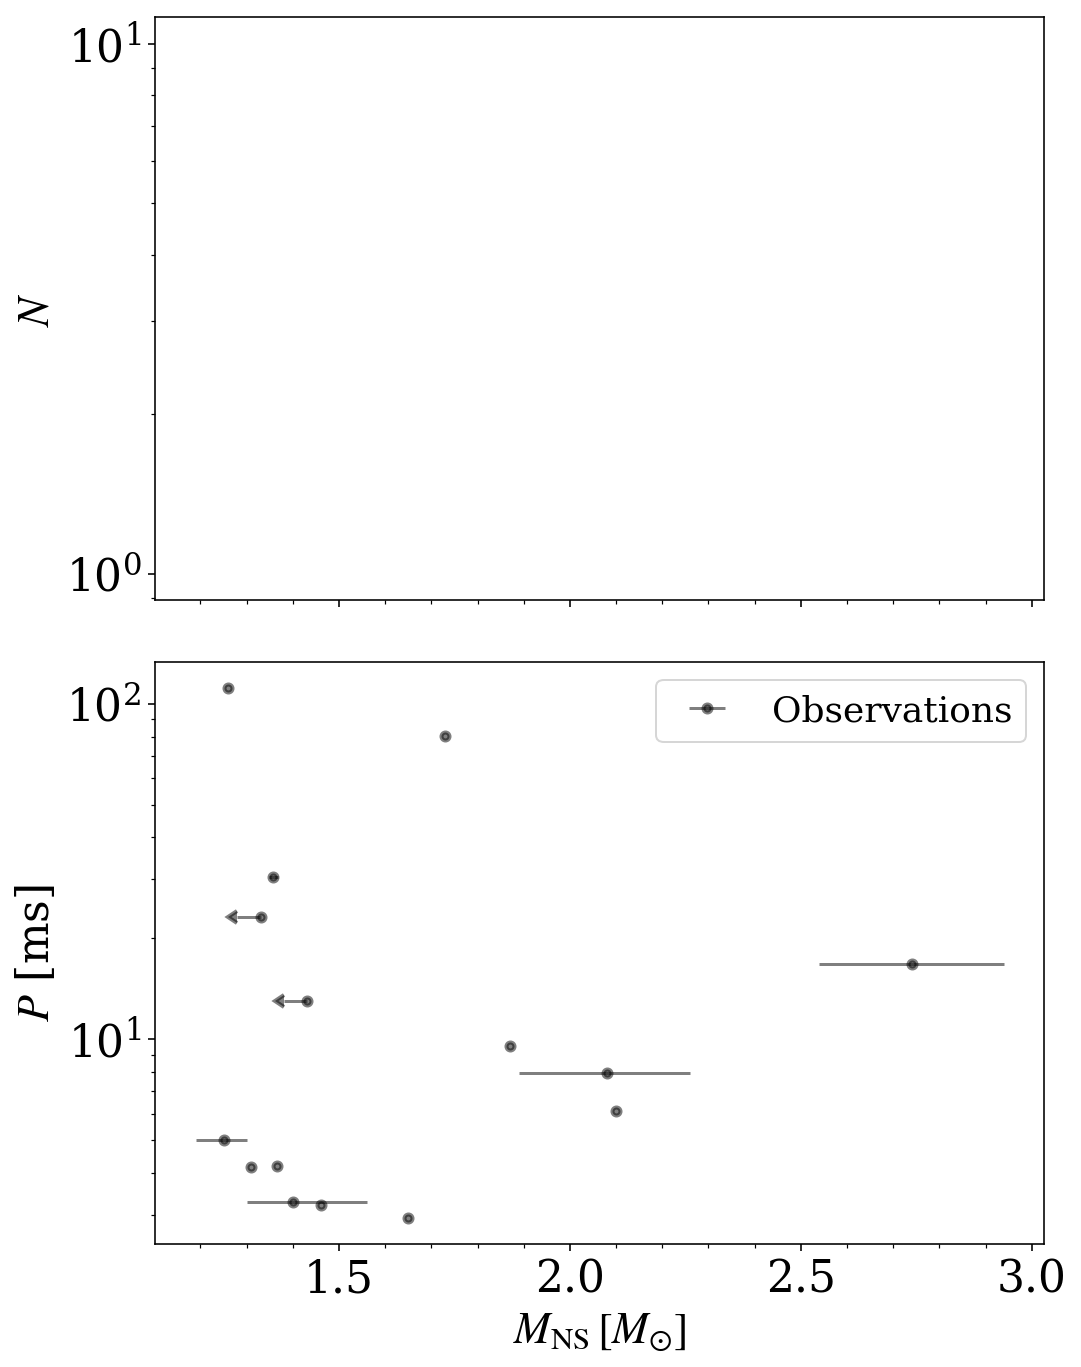

In [25]:
###Number of pulsars and their spin period and magnetic field distribution
###Separating single and binary MSPs
dpsr_mass = pd.read_excel('/projects/b1095/syr904/projects/isolated_MSP/gc_psr_mass.xlsx',
                    names = ['psr_name','mp_med','mp_lsig','mp_usig','mc','mtot', 'pspin'])
mobs = np.array(dpsr_mass['mp_med'])
mobs_lsig = np.array(dpsr_mass['mp_lsig']); mobs_usig = np.array(dpsr_mass['mp_usig'])
print(mobs, mobs[mobs_lsig!=-100], mobs[mobs_lsig==-100])
Ps = np.array(dpsr_mass['pspin'])

N_allpsr = [[],[]]; N_msp = [[],[]]; N_ns = []
N_msp_lmcom = []
Ma_12Gyr = []; Mb_12Gyr = []

id_massive_12 = []; model_massive_12 = []; m_massive_12 = []

id_sin_nontde_nonwdwd = []; n_sin_nontde_nonwdwd = []
id_sin_nontde_nonwdwd_12Gyr = []
t_sin_nontde_nonwdwd_12Gyr = []

tll = [11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000,11000, 
       10000, 10000, 10000]
tul = [14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000, 14000,14000, 
       13000, 13000, 13000]

fig, axs = plt.subplots(nrows = 2, figsize=(8,10), sharex=True)
for xx in range(len(paths)):
    t_conv = dyn.conv('t', paths[xx]+'initial.conv.sh')
    
    psrfile = paths[xx]+'initial.morepulsars.dat'
    
    mall = []
    Bsin = []; Psin = []; msin = []
    Bbin = []; Pbin = []; mbin = []; mcomp = []; kcomp = []
    thetime = [tll[xx],tul[xx]]
    timestep_old=14000.
    npsr_sin = []; npsr_bin = []
    nmsp_sin = []; nmsp_bin = []
    nns = []
    nlbh = []
    nlmcomp = []
    
    n_wdwd = [0,0]; n_psrtde_msp = [0,0]; n_nstde_msp = [0,0]
    
    id_massive = []; model_massive = []; m_massive = []
    
    id_sins = []; t_sins = []
    
    id_sin_nontde_nonwdwd.append([]); n_timestep = 0
    
    with open(psrfile, 'r') as fpsr:
        next(fpsr)
        for line in fpsr:
            data = line.split()
            if float(data[1])*t_conv > thetime[1]:
                break
            if float(data[1])*t_conv < thetime[0]:
                continue
            
            timestep = float(data[1])*t_conv
            if timestep>timestep_old:
                n_timestep+=1
                
                if timestep_old<=12000. and timestep>12000.:
                    #if xx<=ab_cut:
                    #    Ma_12Gyr = Ma_12Gyr + mall
                    #else:
                    #    Mb_12Gyr = Mb_12Gyr + mall
                    
                    model_massive_12 = model_massive_12+model_massive
                    id_massive_12 = id_massive_12+id_massive
                    m_massive_12 = m_massive_12+m_massive
                    t_sin_nontde_nonwdwd_12Gyr.append(np.array(t_sins)[np.array(id_sins)!=0])
                    id_sin_nontde_nonwdwd_12Gyr.append(np.array(id_sins)[np.array(id_sins)!=0])
                    
                        
                Psin = np.array(Psin)
                Pbin = np.array(Pbin)
                mall = np.array(mall)
                mcomp = np.array(mcomp); kcomp = np.array(kcomp)
                npsr_sin.append(len(Psin)-n_wdwd[0]+n_nstde_msp[0])
                npsr_bin.append(len(Pbin)-n_wdwd[1]+n_nstde_msp[1])
                nmsp_sin.append(len(Psin[Psin<=0.03])+n_psrtde_msp[0]+n_nstde_msp[0])
                nmsp_bin.append(len(Pbin[Pbin<=0.03])+n_psrtde_msp[1]+n_nstde_msp[1])
                nlmcomp.append(len(mcomp[(mcomp<=0.01) & (kcomp>10)]))
                nns.append(len(mall))
                nlbh.append(len(mall[mall>2.5]))
                
                        
                mall = []
                Bsin = []; Psin = []; msin = []
                Bbin = []; Pbin = []; mbin = []; mcomp = []; kcomp = []
                
                n_wdwd = [0,0]; n_psrtde_msp = [0,0]; n_nstde_msp = [0,0]
                    
                id_massive = []; model_massive = []; m_massive = []
                
                #if xx==6:
                #    print(id_sins, t_sins)
                id_sins = []; t_sins = []
     
                
            if int(data[2])!=1:
                mall.append(float(data[5]))
                if float(data[5])>1.5:
                    model_massive.append(xx); id_massive.append(float(data[3]))
                    m_massive.append(float(data[5]))
                    
                if float(data[7])>=float(data[9])**2*(0.17*10**12):
                    Bsin.append(float(data[7]))
                    Psin.append(float(data[9]))
                    msin.append(float(data[5]))
                    
                    if float(data[9])>0.03 and int(data[3]) in idtde_msp_all[xx]:
                        n_psrtde_msp[0]+=1
                        
                    if float(data[9])>0.03 and (int(data[3]) in id_wdwdcol_all[xx] or 
                                               int(data[3]) in id_wdwdmer_all[xx]):
                        n_wdwd[0]+=1
                        
                    if float(data[9])<=0.03 and (int(data[3]) not in idtde_msp_all[xx] and 
                       int(data[3]) not in id_wdwdcol_all[xx] and int(data[3]) not in id_wdwdmer_all[xx]):
                        id_sin_nontde_nonwdwd[xx].append(int(data[3]))
                        id_sins.append(int(data[3])); t_sins.append(timestep)
                else:
                    if int(data[3]) in idtde_msp_all[xx]:
                        n_nstde_msp[0]+=1
                        
            else:
                if int(data[11])==13:
                    mall.append(float(data[5]))
                    
                    if float(data[5])>1.5:
                        model_massive.append(xx); id_massive.append(float(data[3]))
                        m_massive.append(float(data[5]))
                    
                if int(data[11])==13 and float(data[7])>=float(data[9])**2*(0.17*10**12):
                    Bbin.append(float(data[7]))
                    Pbin.append(float(data[9]))
                    mbin.append(float(data[5]))
                    mcomp.append(float(data[6]))
                    kcomp.append(int(data[12]))
                    
                    
                    if float(data[9])>0.03 and int(data[3]) in idtde_msp_all[xx]:
                        n_psrtde_msp[1]+=1
                        
                    if float(data[9])>0.03 and (int(data[3]) in id_wdwdcol_all[xx] or 
                                               int(data[3]) in id_wdwdmer_all[xx]):
                        n_wdwd[1]+=1
                elif int(data[11])==13 and float(data[7])<float(data[9])**2*(0.17*10**12):
                    if int(data[3]) in idtde_msp_all[xx]:
                        n_nstde_msp[1]+=1
                        mcomp.append(float(data[6]))
                        kcomp.append(int(data[12]))
                
                if int(data[12])==13:
                    mall.append(float(data[6]))
                    
                    if float(data[6])>1.5:
                        model_massive.append(xx); id_massive.append(float(data[4]))
                        m_massive.append(float(data[6]))
                        
                if int(data[12])==13 and float(data[8])>=float(data[10])**2*(0.17*10**12):
                    Bbin.append(float(data[8]))
                    Pbin.append(float(data[10]))
                    mbin.append(float(data[6]))
                    mcomp.append(float(data[5]))
                    kcomp.append(int(data[11]))
                    
                    if float(data[10])>0.03 and int(data[4]) in idtde_msp_all[xx]:
                        n_psrtde_msp[1]+=1
                        
                    if float(data[10])>0.03 and (int(data[4]) in id_wdwdcol_all[xx] or 
                                               int(data[4]) in id_wdwdmer_all[xx]):
                        n_wdwd[1]+=1
                elif int(data[12])==13 and float(data[8])<float(data[10])**2*(0.17*10**12):
                    if int(data[4]) in idtde_msp_all[xx]:
                        n_nstde_msp[1]+=1
                        mcomp.append(float(data[5]))
                        kcomp.append(int(data[11]))
            
            timestep_old = timestep
    
    #print('allpsr:', model_label[xx], np.mean(npsr_sin), np.mean(npsr_bin))
    #print('msp:', model_label[xx], np.mean(nmsp_sin), np.mean(nmsp_bin))
    
    #print('Nns:', model_label[xx], np.mean(nns))
    #print('low-mass bh?', model_label[xx], np.mean(nlbh))
    #print('low-mass companion', model_label[xx], np.mean(nlmcomp))
        
    N_allpsr[0].append(np.mean(npsr_sin)); N_allpsr[1].append(np.mean(npsr_bin))
    N_msp[0].append(np.mean(nmsp_sin)); N_msp[1].append(np.mean(nmsp_bin))
    N_ns.append(np.mean(nns))
    N_msp_lmcom.append(np.mean(nlmcomp))
    
    n_sin_nontde_nonwdwd.append(len(np.array(id_sin_nontde_nonwdwd[xx])[np.array(id_sin_nontde_nonwdwd[xx])!=0])/
                                float(n_timestep+1))
    id_sin_nontde_nonwdwd[xx] = list(Counter(id_sin_nontde_nonwdwd[xx]).keys())
    
print('sin MSP ids', id_sin_nontde_nonwdwd)
#print('sin MSP 13 Gyr ids', id_sin_nontde_nonwdwd_13Gyr, t_sin_nontde_nonwdwd_13Gyr)
#np.savetxt('/projects/b1095/syr904/projects/isolated_MSP/massive_NS.dat', 
#           np.c_[model_massive_12,id_massive_12,m_massive_12],
#          fmt = '%d %d %f', header = '1.model 2.id 3.NS_mass[MSUN]', comments = '#', delimiter = '')

#print(len(Ma_12Gyr), len(np.array(Ma_12Gyr)[np.array(Ma_12Gyr)>1.5])) 
#print(len(Mb_12Gyr), len(np.array(Mb_12Gyr)[np.array(Mb_12Gyr)>1.5]))    
#axs[0].hist(Ma_12Gyr, bins=15,
#         histtype='step', alpha=0.6, color = 'b', lw=3)
#axs[0].hist(Mb_12Gyr, bins=15,
#         histtype='step', alpha=0.6, color = 'orange', lw=3)
axs[1].errorbar(mobs[mobs_lsig!=-100], 
             Ps[mobs_lsig!=-100], 
             xerr = [mobs_lsig[mobs_lsig!=-100], mobs_usig[mobs_lsig!=-100]], 
             marker='o', markersize=4, linestyle='none',markeredgewidth=2,
             capsize=0, color = 'k', alpha=0.5, label = 'Observations')
axs[1].errorbar(mobs[mobs_lsig==-100], 
             Ps[mobs_lsig==-100], 
             xuplims = True, xerr=0.05,
             marker='o', markersize=4, linestyle='none',markeredgewidth=2,
             color = 'k', alpha=0.5)


axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].set_ylabel(r'$N$')
axs[0].set_yscale('log')
axs[1].set_ylabel(r'$P$ [ms]')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$M_{\rm{NS}}\,[M_{\odot}]$')
axs[1].legend(loc='upper right', fontsize=18)
fig.tight_layout()

#plt.savefig(savepath+'ns_mass_all_12Gyr.pdf', dpi=300)

data_sin_msp = [n_sin_nontde_nonwdwd, N_msp_lmcom, list(np.array(N_msp_lmcom)+np.array(n_sin_nontde_nonwdwd))]
pd.DataFrame(data_sin_msp)
#print('number of single MSPs', N_msp_lmcom, n_sin_nontde_nonwdwd, np.array(N_msp_lmcom)+np.array(n_sin_nontde_nonwdwd))

In [14]:
###### Save the arrays into a file
print(len(Mclu), len(N_bh), len(N_ns), len(N_wdwdcoll_tot), len(N_wdwdmer_tot), len(N_tde), 
                                       len(np.array(N_allpsr[0])+np.array(N_allpsr[1])), 
                                       len(N_BBH), len(N_DNS), len(N_NSBH), len(N_BHWD), len(N_NSWD), len(N_DWD), 
                                       len(N_NSWD_pres), len(N_DNS_pres), len(N_NSBH_pres))
np.savetxt(savepath+'table_wthrg1.dat', np.c_[Mclu, N_bh, N_ns, N_wdwdcoll_tot, N_wdwdmer_tot, N_tde, 
                                       np.array(N_allpsr[0])+np.array(N_allpsr[1]), 
                                       N_BBH, N_DNS, N_NSBH, N_BHWD, N_NSWD, N_DWD, 
                                       N_NSWD_pres, N_DNS_pres, N_NSBH_pres],
          fmt = '%f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f',
          header = '1.Mclu 2.Nbh 3.Nns 4.Nwdcolltot 5.Nwdmertot 6.Ntde 7.Nallpsr 8.NBBH 9.NBNS 10.NBHNS 11.NBHWD 12.NNSWD 13.NDWD 14.NNSWD_pres 15.NDNS_pres 16.NNSBH_pres',
          delimiter = ' ')
#data_table = np.genfromtxt(savepath+'table.dat')
#np.savetxt(savepath+'table.dat', np.c_[data_table[:,0],data_table[:,1],data_table[:,2],data_table[:,3],
#              data_table[:,4],data_table[:,5],data_table[:,6],data_table[:,7],data_table[:,8],
#              data_table[:,9],data_table[:,10],N_ns_wdwdmer[0],N_ns_wdwdmer[1]],
#          fmt = '%f %f %f %f %f %f %f %f %f %f %f %f %f',
#          header = '1.Mclu 2.Nbh 3.Nns 4.Nwdcolltot 5.Ntde 6.Nallpsr_sin 7.Nallpsr_bin 8.Nmsp_sin 9.Nmsp_bin 10.Nnscoll_sin 11.Nnscoll_bin 12.Nnsmer_sin 13.Nnsmer_bin',
#          delimiter = ' ')

data_table = np.genfromtxt(savepath+'table_wthrg1.dat')
f=open(savepath+'latex_table_wthrg1.txt', 'w+')
name_label = ['', '^d', '^m', '^{dm}', '', '^d', '^m', '^{dm}', '', '^d', '^m', '^{dm}', '^{dm}', '^{dm}',
              '', '^{dm}', '^{dm}']
for ii in range(len(paths)):
    f.write('%s & %.2f & %d & %d & %d & %d & %d & %s & %s & %s & %s & %s\\\\\n'
            %(str(ii+1)+name_label[ii], 
              data_table[:,0][ii]/1.e5, np.round(data_table[:,1][ii]),
              np.round(data_table[:,2][ii]),
              np.round(data_table[:,13][ii]),np.round(data_table[:,14][ii]),np.round(data_table[:,15][ii]),
              snmodel[ii], wdmassmodel[ii], nstdeflag[ii], wdtcflag[ii], qcritflag[ii]))

f.close()

In [30]:
####Separate the collisions/mergers from the present-day values
np.savetxt(savepath+'coll_mer_table_wthrg1.dat', np.c_[N_BBH, N_DNS, N_NSBH, N_BHWD, N_NSWD, N_DWD, 
                                                F_mg_merger[0], F_mg_merger[1],
                                                N_coms[0], N_coms[1], N_coms[2], F_mg_coms,
                                                N_ns2bh, N_dns2bh, N_nswd2bh, N_delayed2bh],
          fmt = '%f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f',
          header = '1.NBBH 2.NBNS 3.NBHNS 4.NBHWD 5.NNSWD 6.NDWD 7.Fmg_NSBH 8.Fmg_BBH 9.NWDMS 10.NNSMS 11.NBHMS 12.Fmg_bhms 13.N_nstde2bh 14.N_dns2bh 15.N_nswd2bh 16.N_delayed2bh',
          delimiter = ' ')


data_table = np.genfromtxt(savepath+'coll_mer_table_wthrg1.dat')
f=open(savepath+'latex_coll_mer_table_wthrg1.txt', 'w+')
name_label = ['', '^d', '^m', '^{dm}', '', '^d', '^m', '^{dm}', '', '^d', '^m', '^{dm}', '^{dm}', '^{dm}', 
              '', '^{dm}' , '^{dm}']
for ii in range(len(paths)):
    f.write('%s & %d & %d & %d & %d & %d & %d & %d & %d & %d & %d & %.2f & %.3f & %d & %d & %d & %.2f\\\\\n'
            %(str(ii+1)+name_label[ii], np.round(data_table[:,15][ii]), np.round(data_table[:,12][ii]),
              np.round(data_table[:,13][ii]), np.round(data_table[:,14][ii]),
              np.round(data_table[:,0][ii]),
              np.round(data_table[:,1][ii]), np.round(data_table[:,2][ii]),
              np.round(data_table[:,3][ii]),np.round(data_table[:,4][ii]),
              np.round(data_table[:,5][ii]),
              data_table[:,6][ii],data_table[:,7][ii],
              np.round(data_table[:,8][ii]),np.round(data_table[:,9][ii]),np.round(data_table[:,10][ii]),
              data_table[:,11][ii]))

f.close()

In [24]:
###BH binaries at the present day
for xx in range(len(paths)):
    t_conv = dyn.conv('t', paths[xx]+'initial.conv.sh')
    
    all_bhsnaps_float, all_bhsnaps_str = bh_snaps(paths[xx])
    all_bhsnaps_float = all_bhsnaps_float*t_conv
    
    for ii in range(len(all_bhsnaps_float)):
        #i all_bhsnaps_float[ii]<11000. or all_bhsnaps_float[ii]>14000.:
        #   continue
            
        if all_bhsnaps_float[ii]<11900.:
            continue
        
        bh_h5 = cmct.Snapshot(fname=paths[xx]+'initial.blackhole.snapshots.h5', 
                                    snapshot_name='/t='+all_bhsnaps_str[ii], 
                                    conv=paths[xx]+'initial.conv.sh', 
                                    dist=4.125, # distance to cluster in kpc
                                    z=0.0002)
        print(bh_h5.age)
        binflag = np.array(bh_h5.data['binflag'])
        m = np.array(bh_h5.data['m_MSUN'])[binflag!=1]
        k0 = np.array(bh_h5.data['bin_startype0'])[binflag==1]; k1 = np.array(bh_h5.data['bin_startype1'])[binflag==1]
        m0 = np.array(bh_h5.data['m0_MSUN'])[binflag==1]; m1 = np.array(bh_h5.data['m1_MSUN'])[binflag==1]
        radrol0 = np.array(bh_h5.data['radrol0'])[binflag==1]; radrol1 = np.array(bh_h5.data['radrol1'])[binflag==1], 
        print(len(binflag[binflag==1]), k0, k1, radrol0, radrol1)
        
        break
        

11.9499418746
1 [14] [12] [1.93121775e-06] (array([0.00067175]),)
11.912282428400001
1 [14] [13] [5.32126343e-05] (array([3.46821484e-05]),)
12.00868534692
5 [14 12 11 12 12] [13 14 14 14 14] [7.02962339e-06 9.17356640e-03 2.61783611e-03 4.46757354e-03
 1.91237273e-04] (array([8.93809158e-06, 2.70724160e-05, 2.43799454e-06, 4.03429765e-05,
       7.37275703e-07]),)
11.942262870239999
1 [12] [14] [0.00088589] (array([3.62227564e-06]),)
12.0382750564
1 [11] [14] [1.03643853] (array([1.83747009e-05]),)
11.903236873039999
0 [] [] [] (array([], dtype=float64),)
11.951894861560001
4 [11 11  0 13] [14 14 14 14] [1.11895303e+00 1.03662721e+00 1.00062010e+00 3.41451468e-08] (array([1.16134413e-05, 1.85240002e-05, 1.12026439e-05, 2.15321951e-08]),)
11.95315951172
2 [14 12] [14 14] [1.00000000e-04 1.02976405e-03] (array([1.00000000e-20, 4.04918514e-06]),)
11.987143104440001
4 [14 11 14 11] [11 14 13 14] [3.50655040e-06 7.98494355e-03 1.97394404e-05 5.12057551e-03] (array([4.24340725e-03, 9.132366